<a href="https://colab.research.google.com/github/rana-balabel/toyota-innovation/blob/main/Master_Blue_Car_Toyota_Innovation_Challenge_Video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from IPython.display import display, Javascript, Image

from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

#Get Python and OpenCV Version

print('OpenCV-Python Lib Version:', cv2.__version__)
print('Python Version:',sys.version)

# Download the test image
!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198837240-9bab6b1e-d700-41ba-8da3-c6ebfd4247ba.jpeg \
    -O white_lexus_4.jpg

# Download other Sample Images
!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198837314-9bcfbc4e-55aa-4cbc-832a-a7f73e39792c.jpeg \
    -O white_lexus_1.jpg

!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198837400-68832d9e-aee5-4552-b057-7d332913100a.jpeg \
    -O white_lexus_2.jpg

!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198839644-163cc49c-c5a9-437e-91b9-4593b3ef4a11.jpeg \
    -O blue_lexus_1.jpg

!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198883832-d041c47f-56e9-47f5-a4c8-f73e852f8172.jpeg  \
    -O black_lexus_1.jpg

!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198881454-b63650e5-228c-4eaa-965e-b21fd4ff4e12.mp4 \
    -O video.mp4
!wget --no-check-certificate \
    https://user-images.githubusercontent.com/78990245/198892233-7494abe0-6d19-431c-b45f-3117ce83912b.mp4 \
   -O blue_fast_video.mp4 


OpenCV-Python Lib Version: 4.6.0
Python Version: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0]
--2022-10-30 17:34:43--  https://user-images.githubusercontent.com/78990245/198837240-9bab6b1e-d700-41ba-8da3-c6ebfd4247ba.jpeg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91369 (89K) [image/jpeg]
Saving to: ‘white_lexus_4.jpg’

white_lexus_4.jpg   100%[===================>]  89.23K  --.-KB/s    in 0.01s   

2022-10-30 17:34:43 (6.58 MB/s) - ‘white_lexus_4.jpg’ saved [91369/91369]

--2022-10-30 17:34:43--  https://user-images.githubusercontent.com/78990245/198837314-9bcfbc4e-55aa-4cbc-832a-a7f73e39792c.jpeg
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 

In [ ]:
#Splits video into frames
vidcap = cv2.VideoCapture('blue_fast_video.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("frameblue"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.1 #//it will capture image in each 0.5 second
count=0
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

print(count)

59


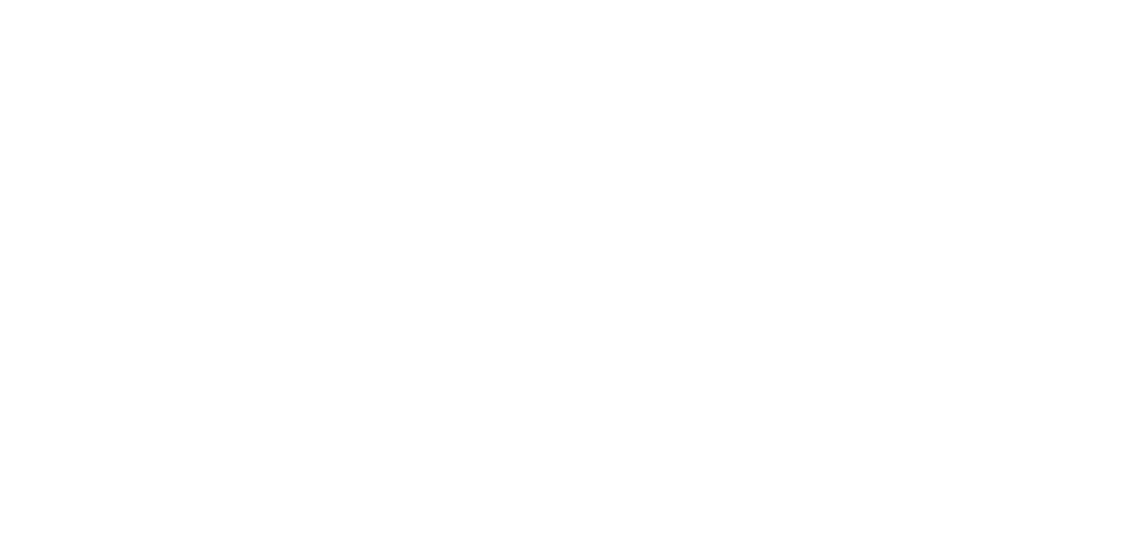

0


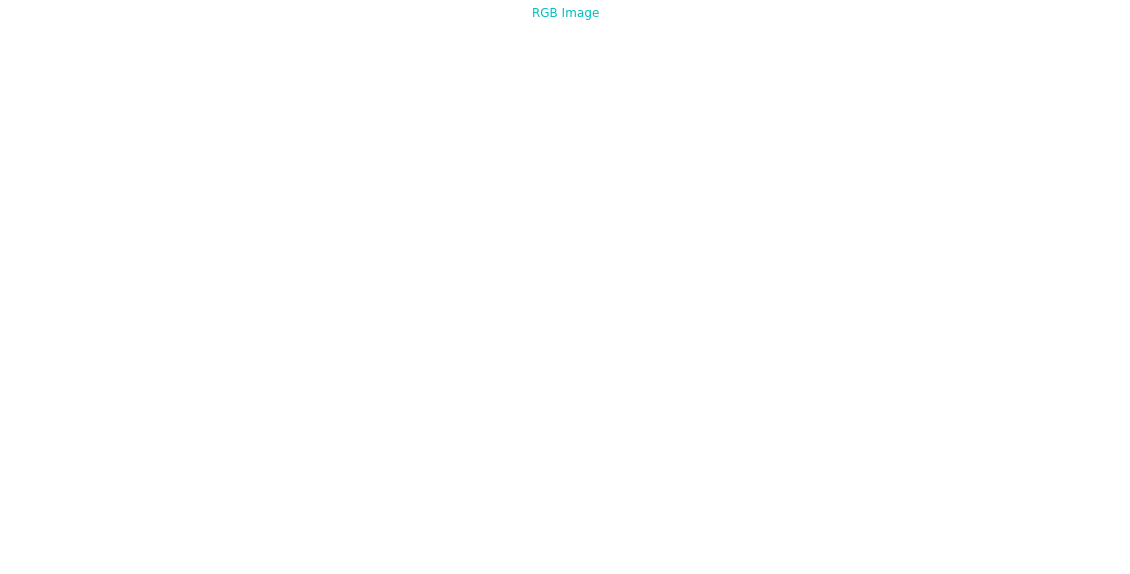

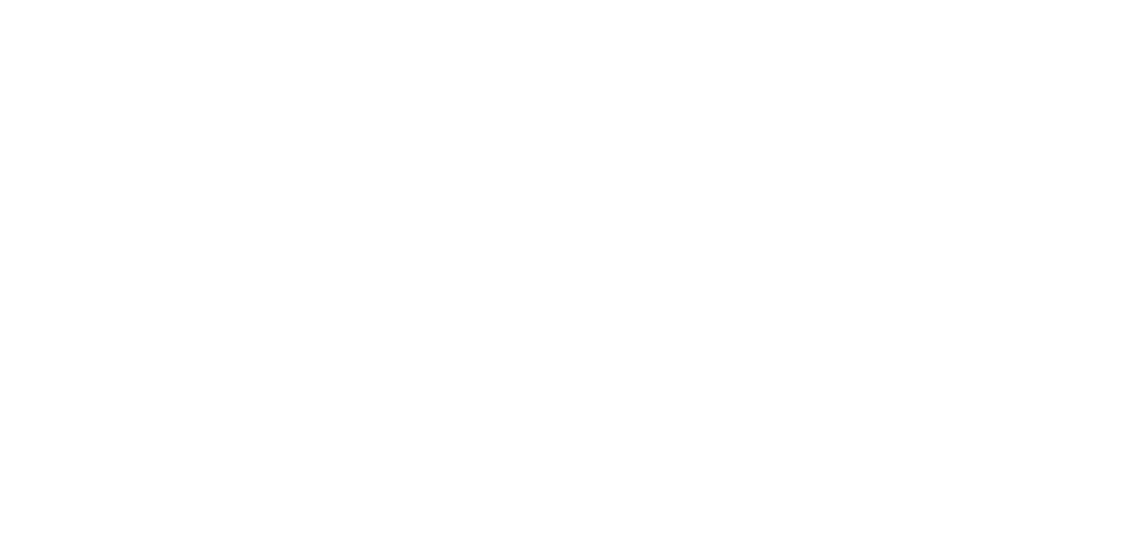

1


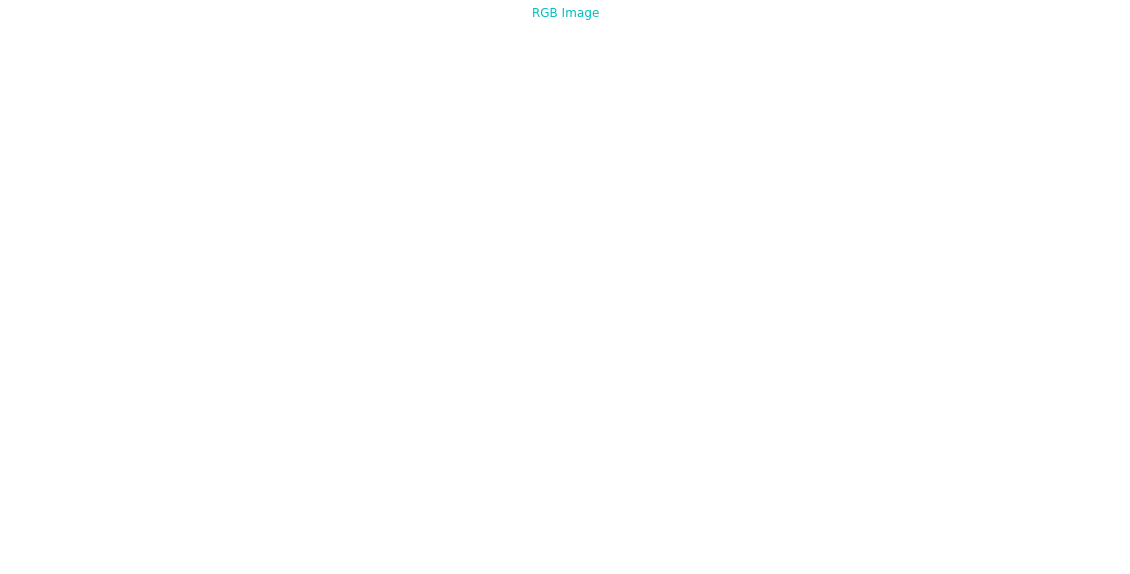

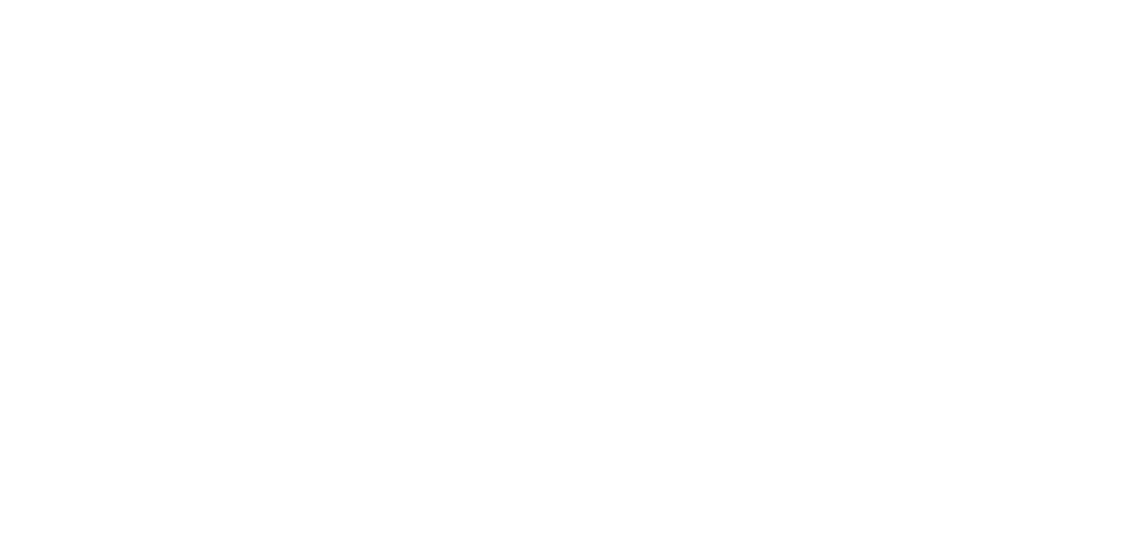

2


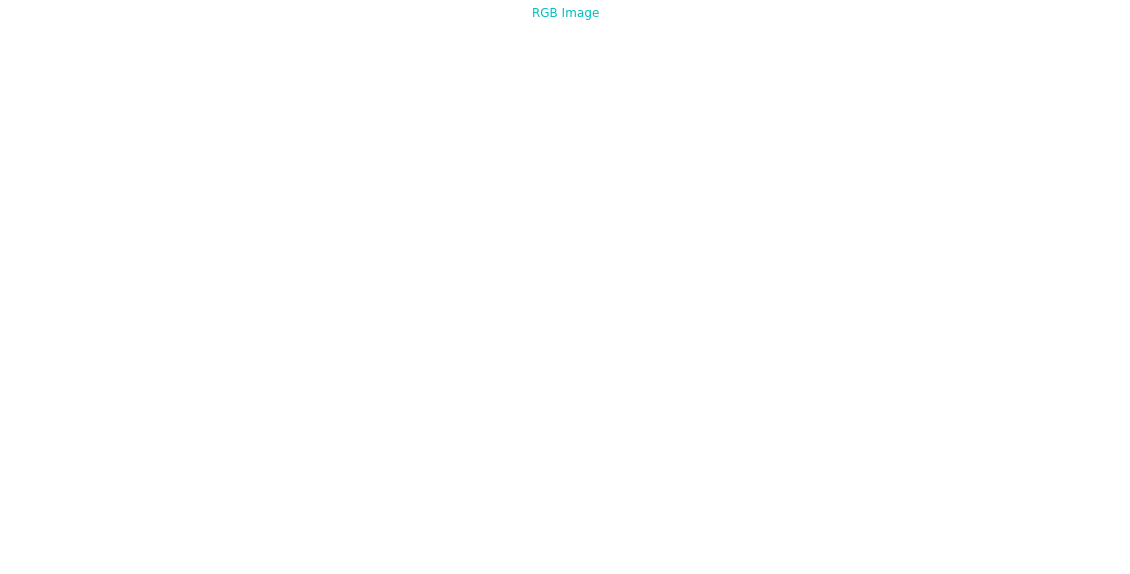

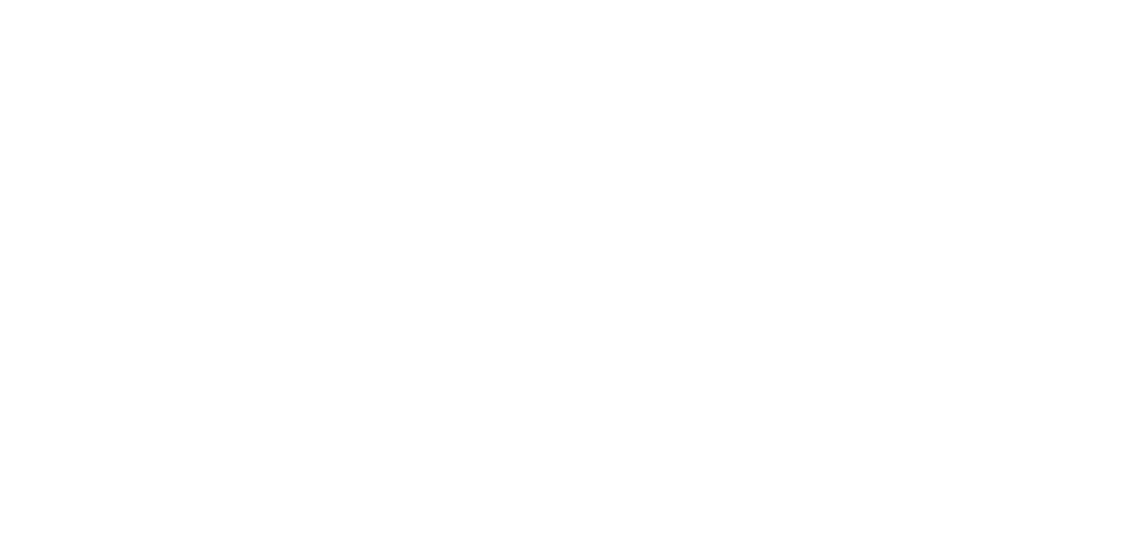

3


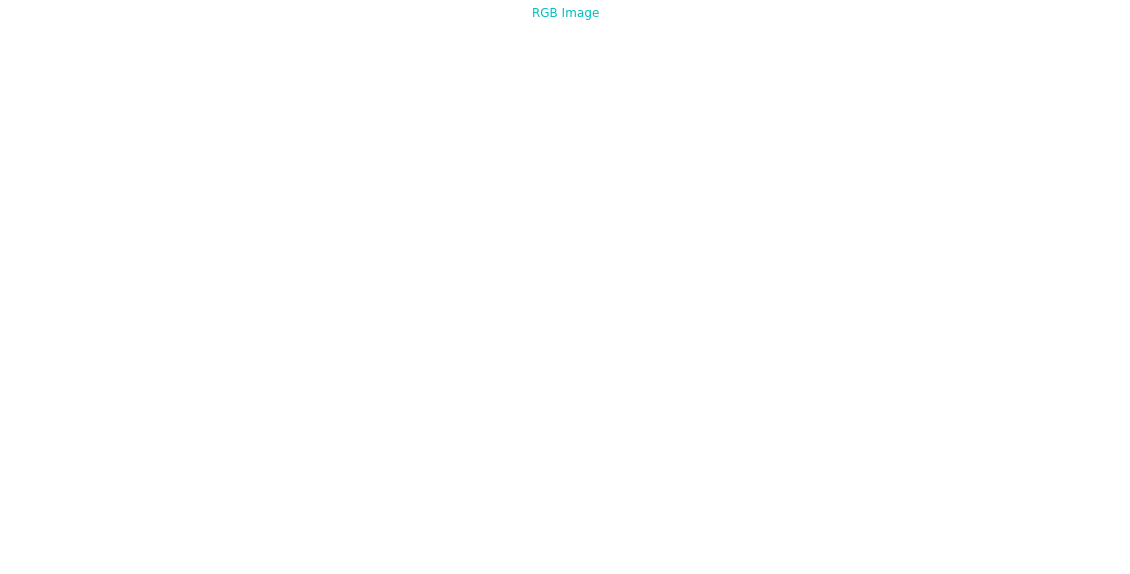

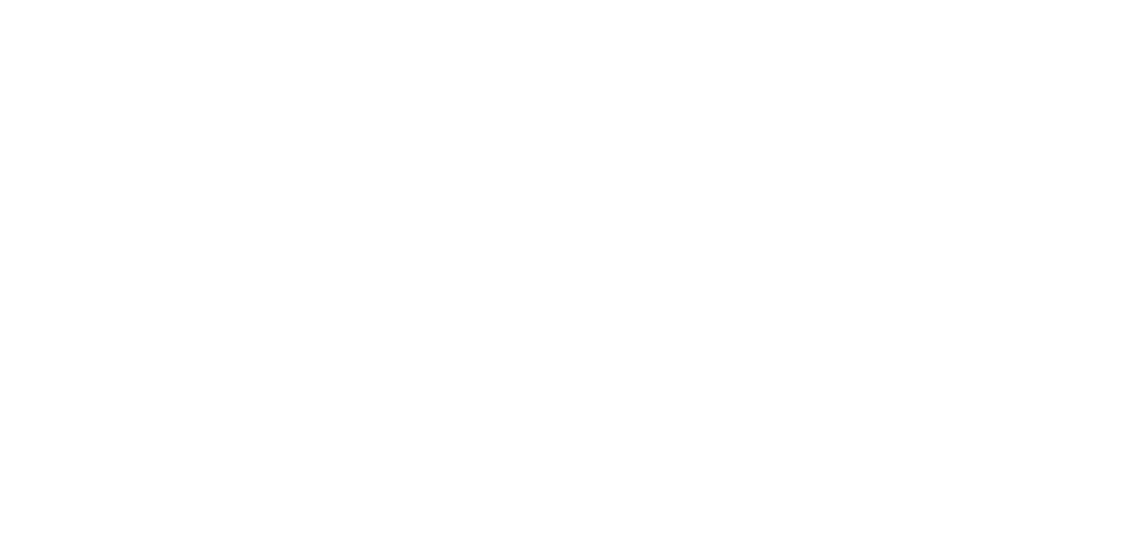

4


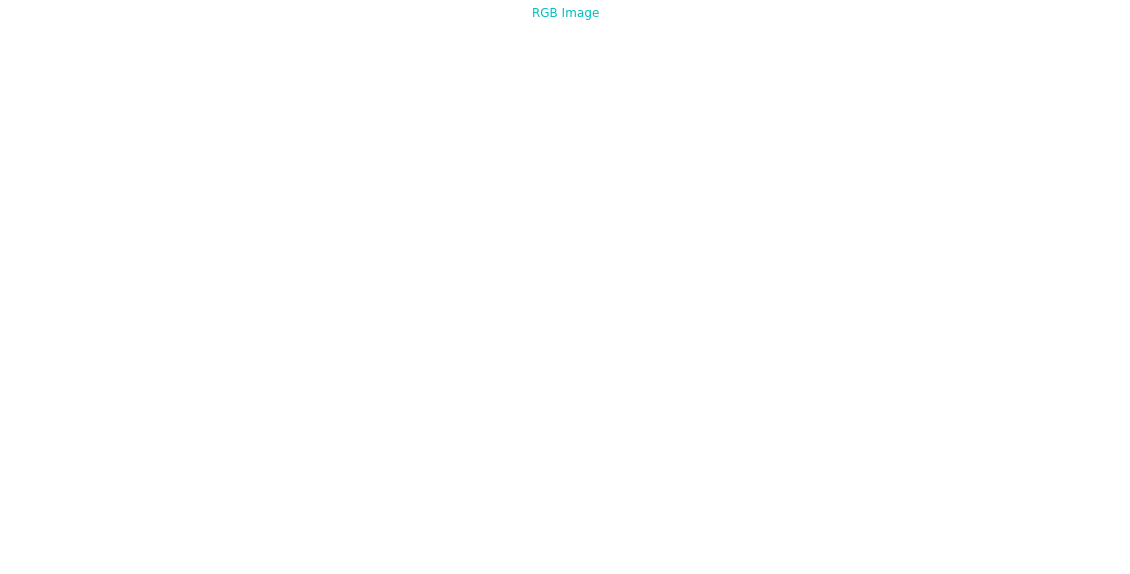

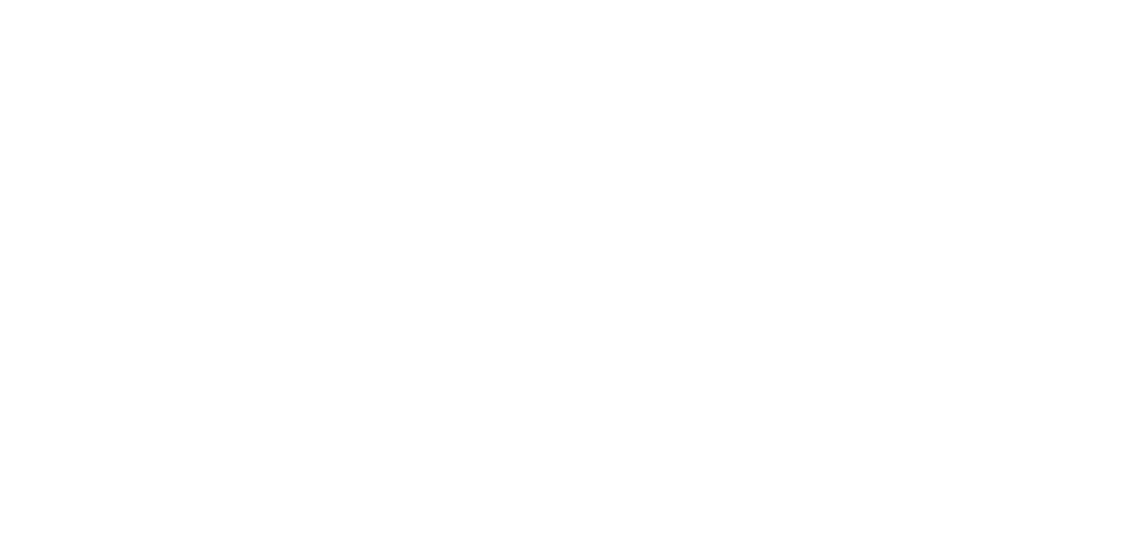

5


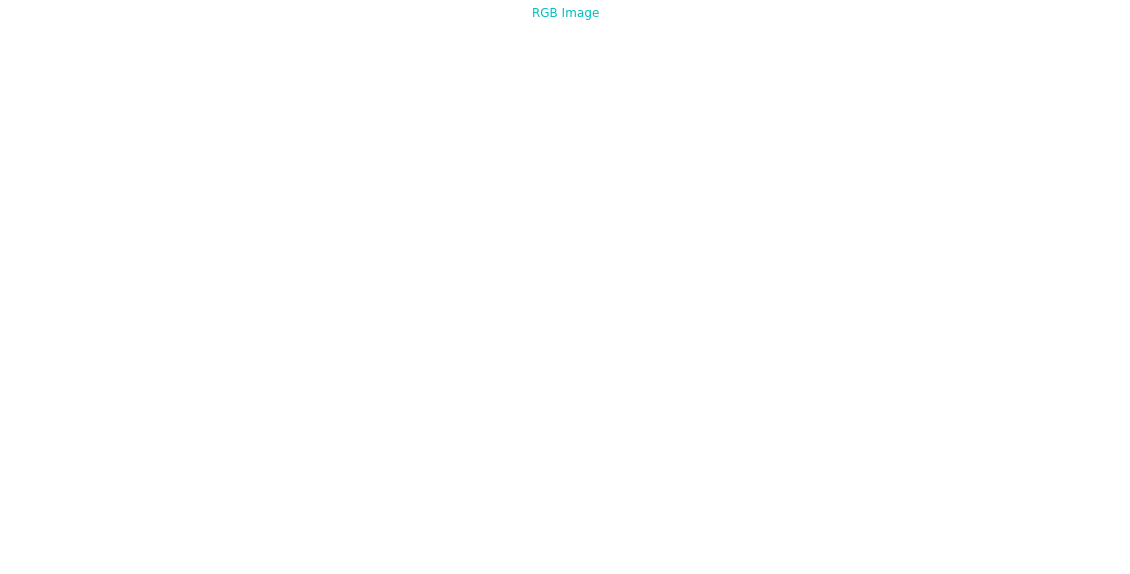

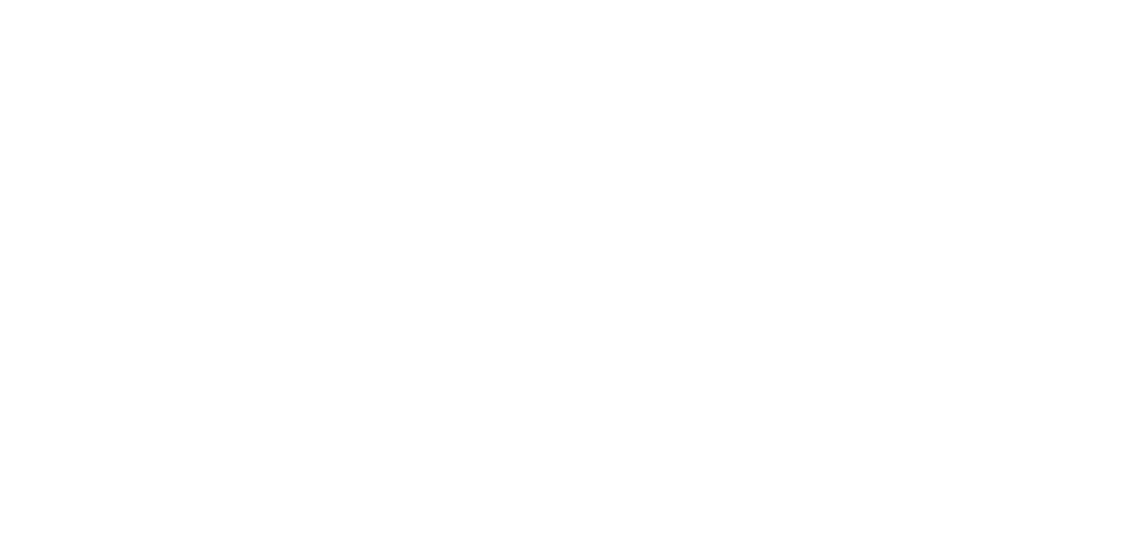

6


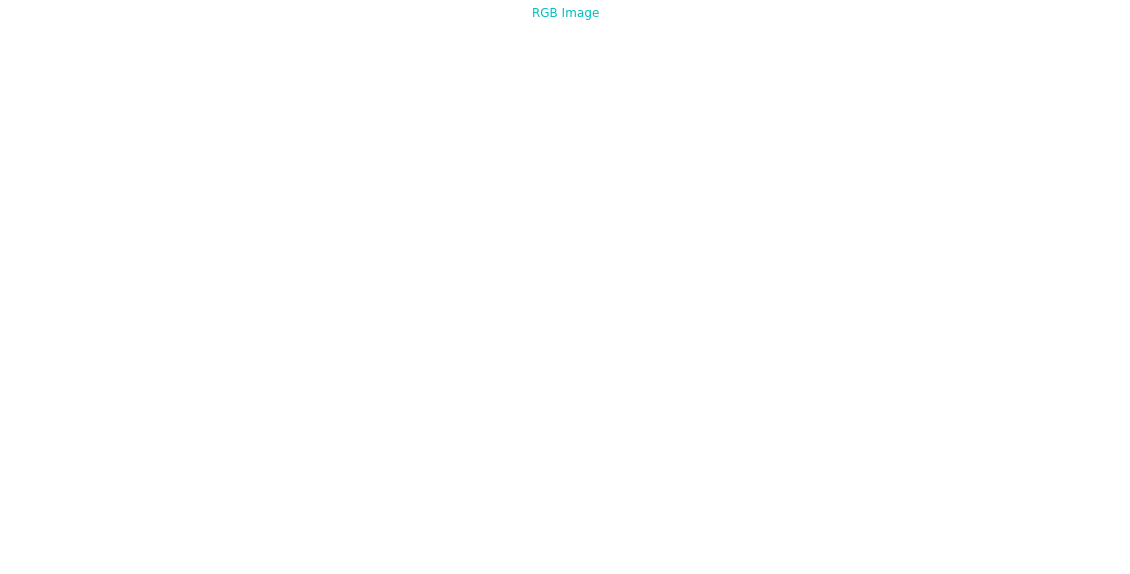

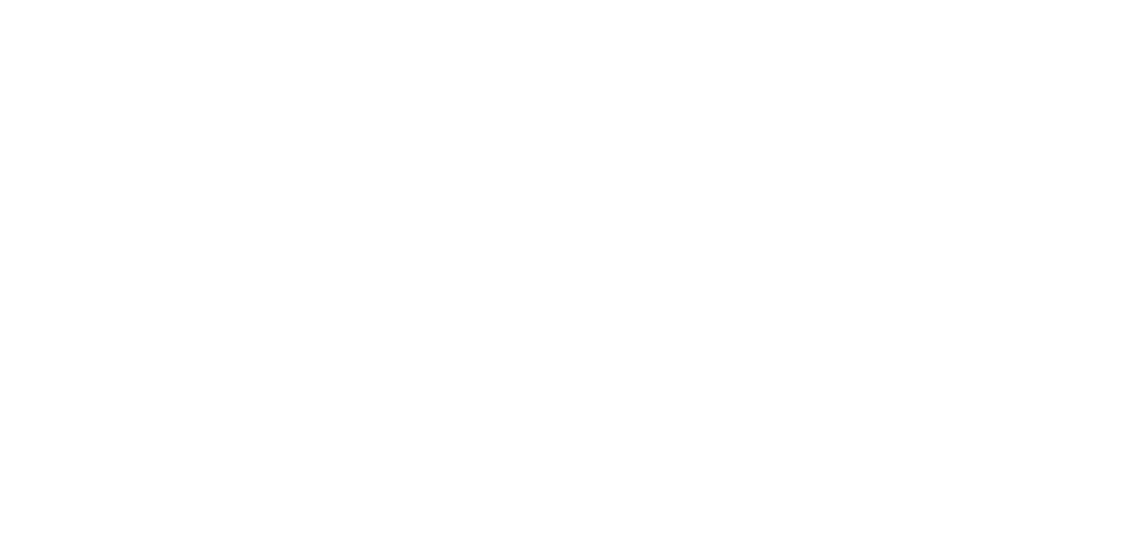

7


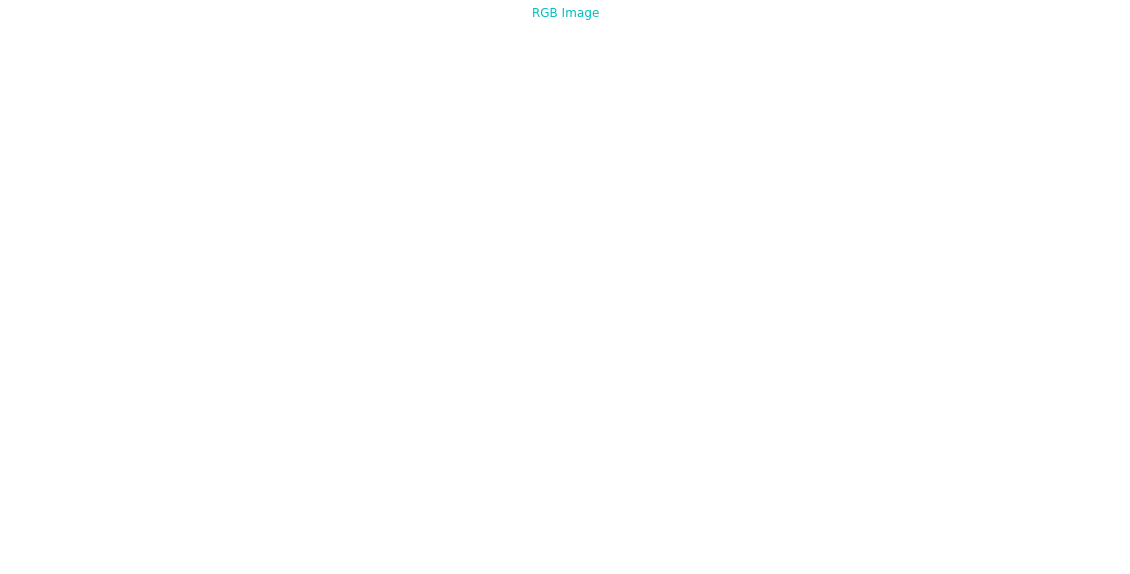

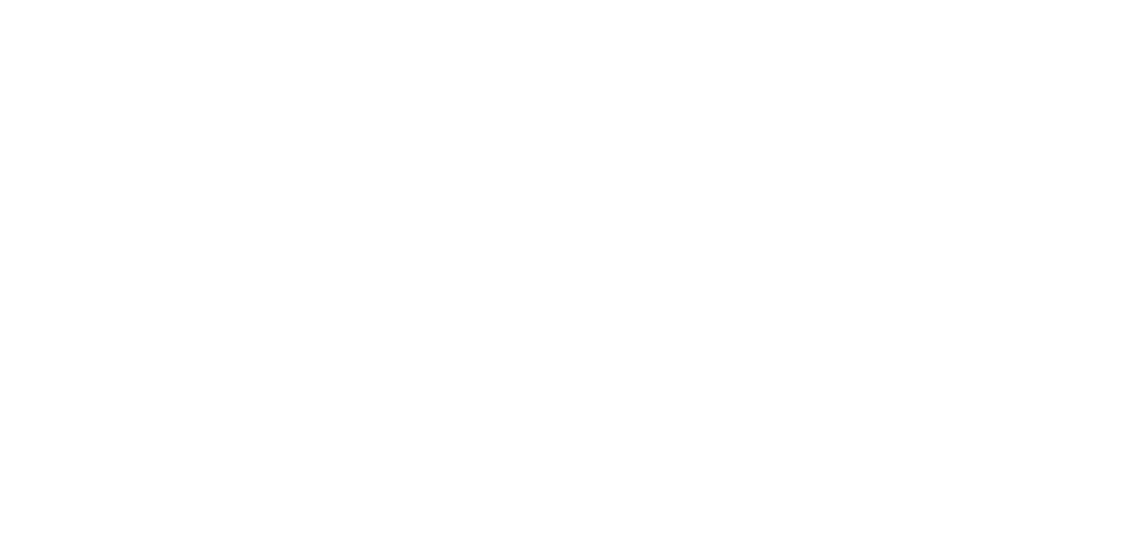

8


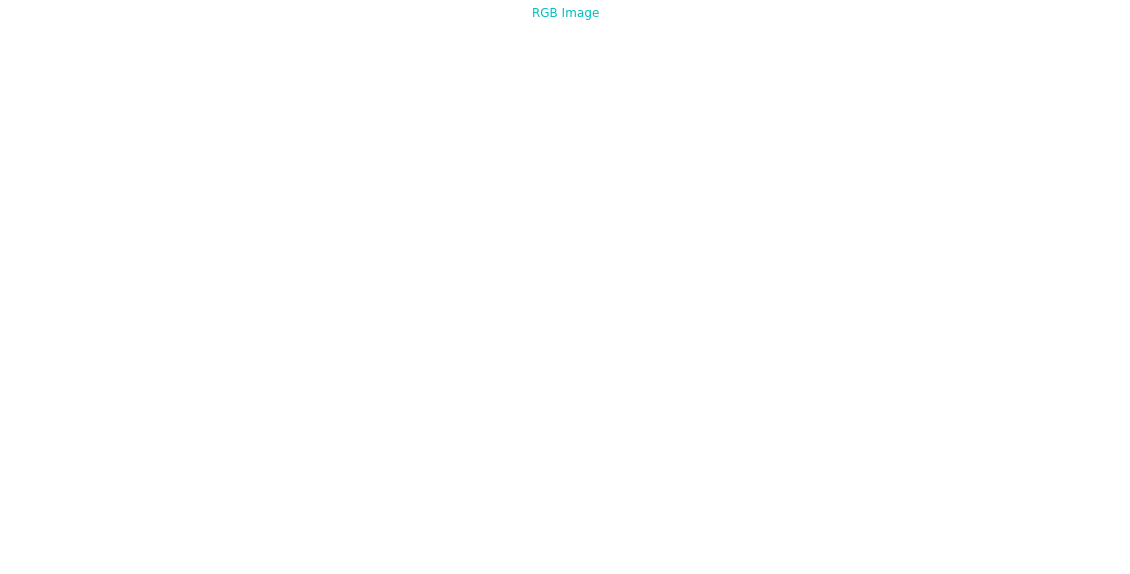

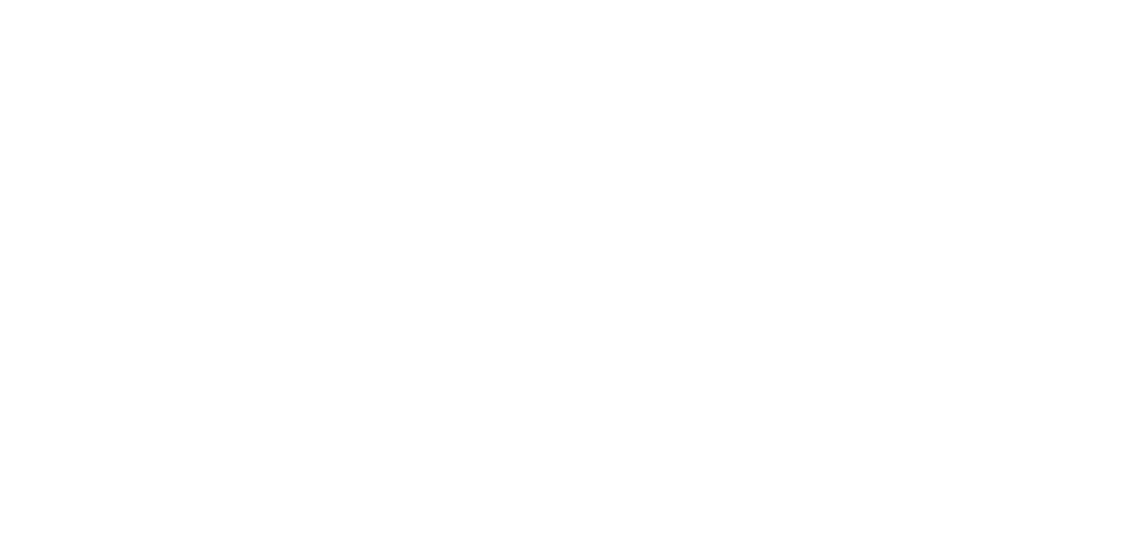

9


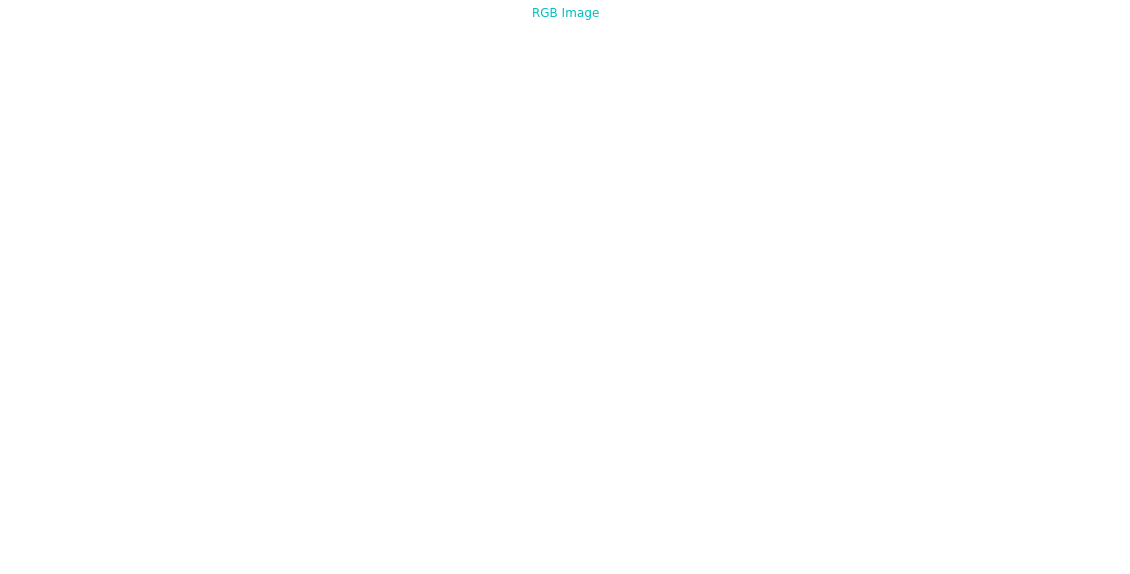

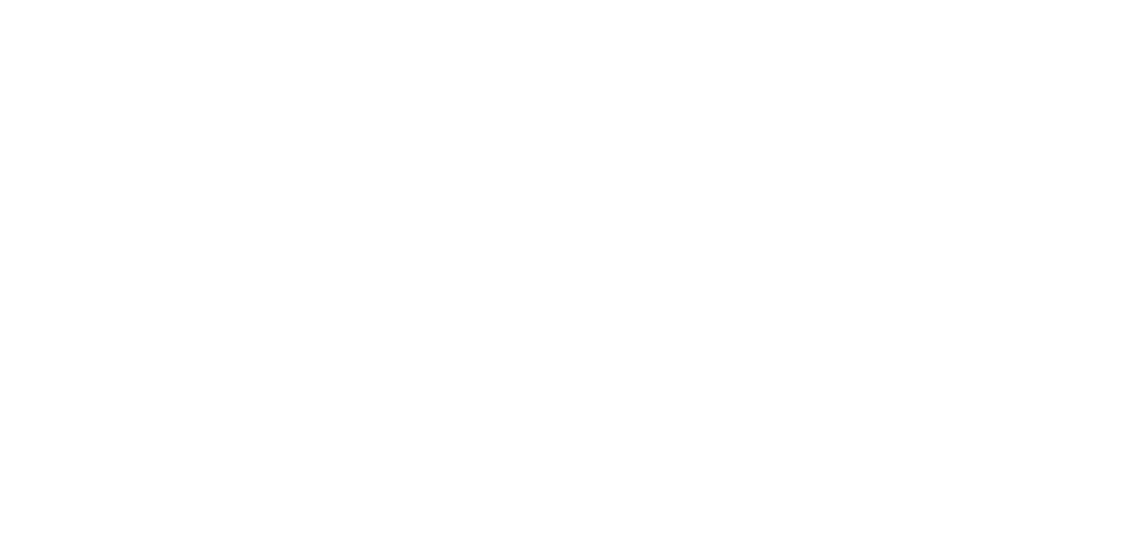

10


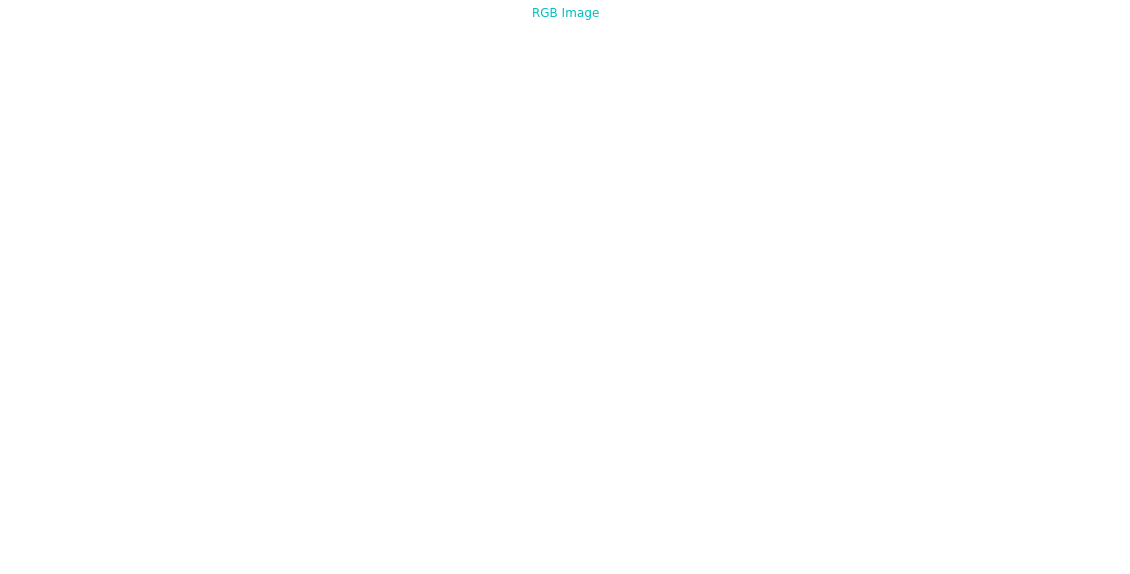

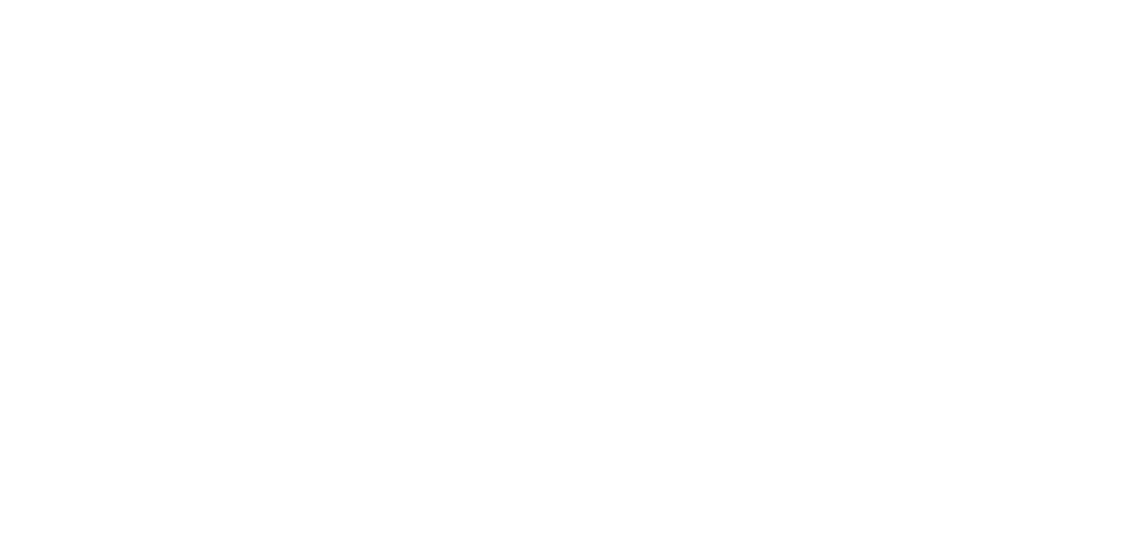

11


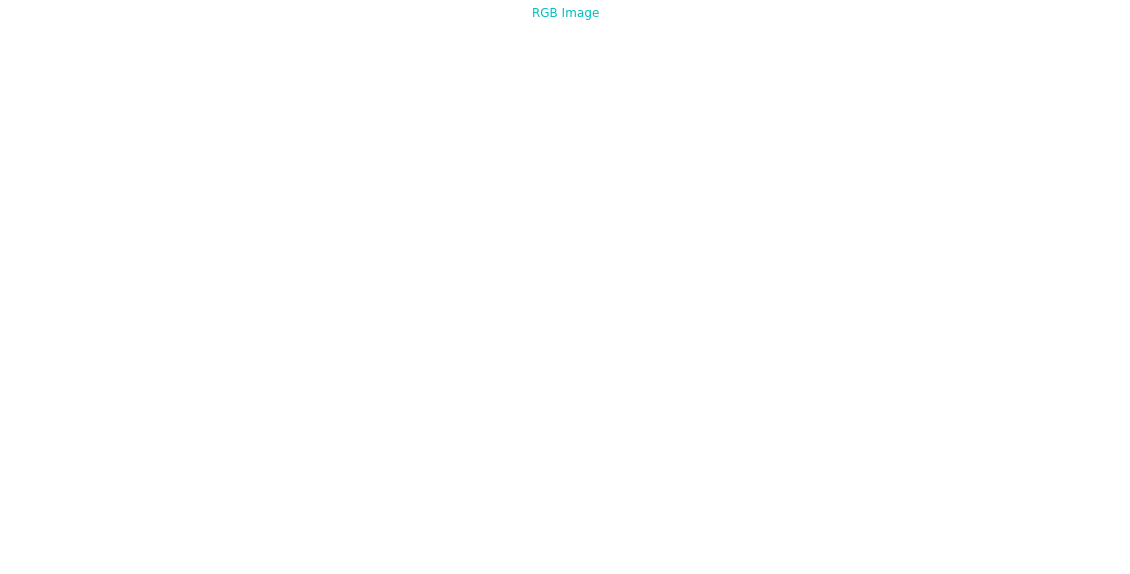

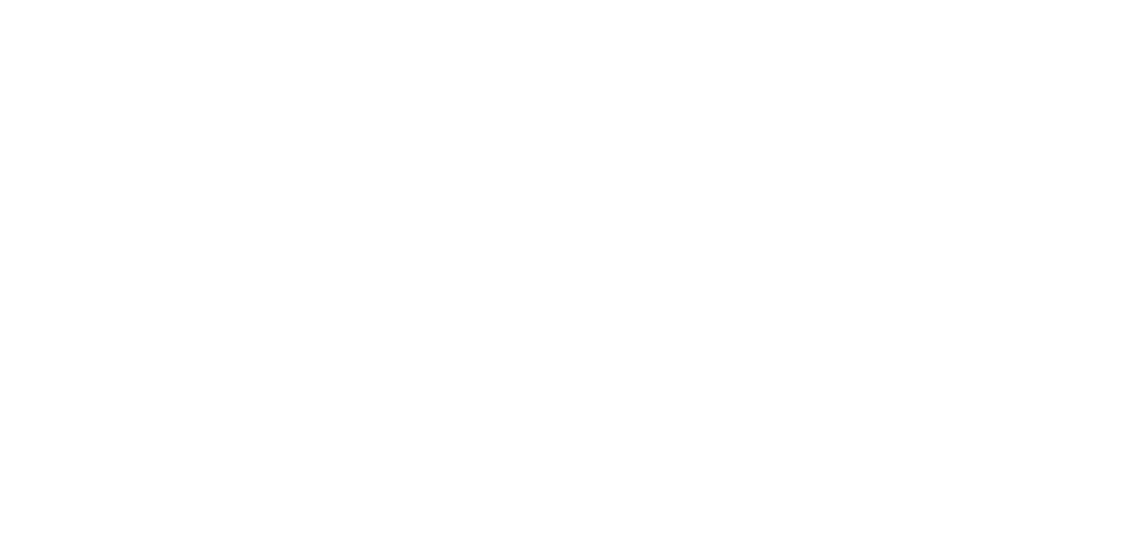

12


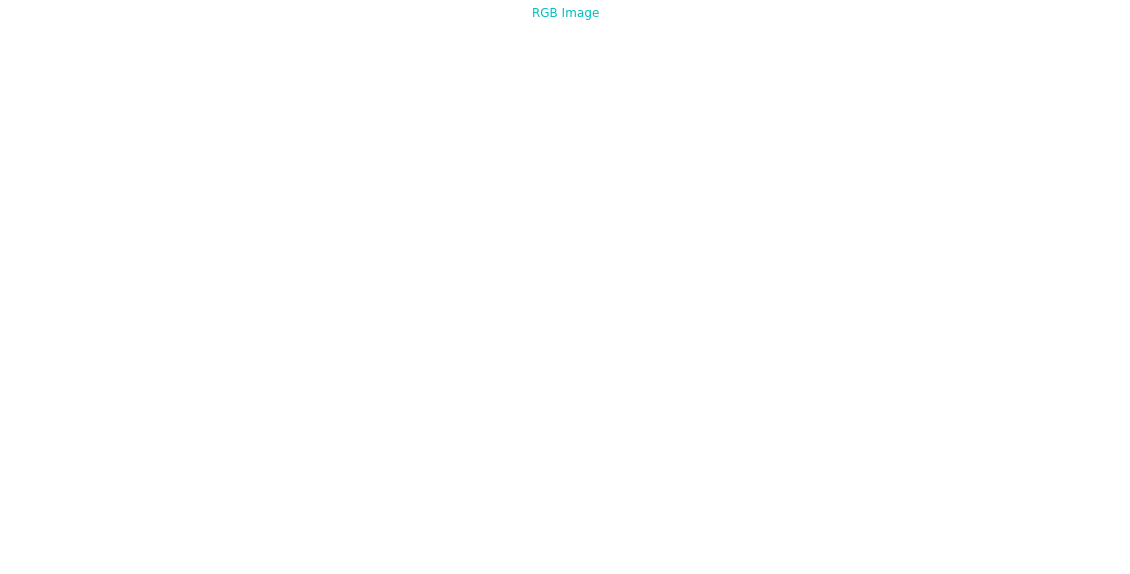

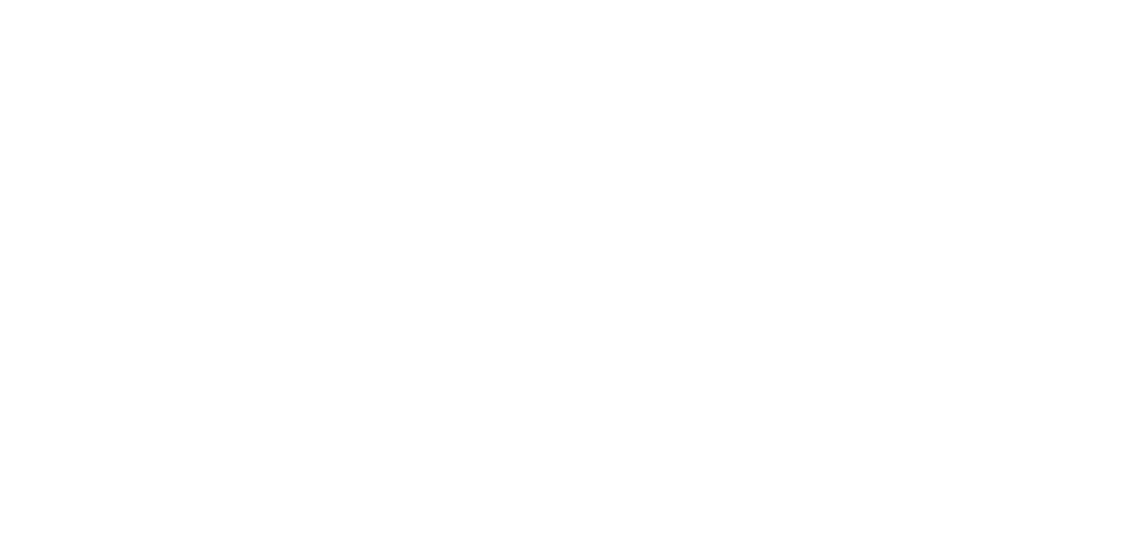

13


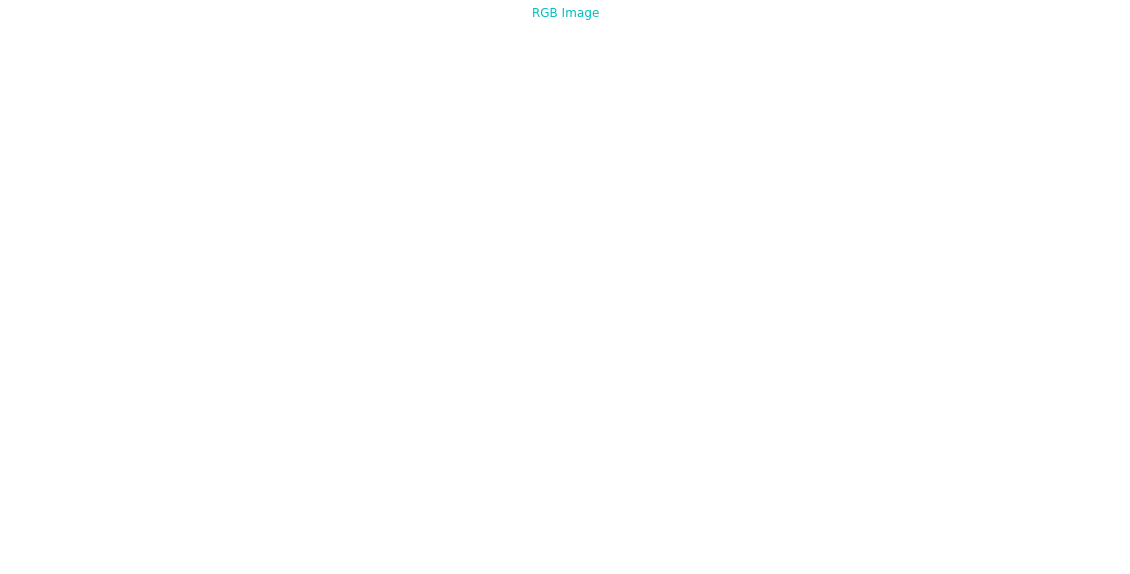

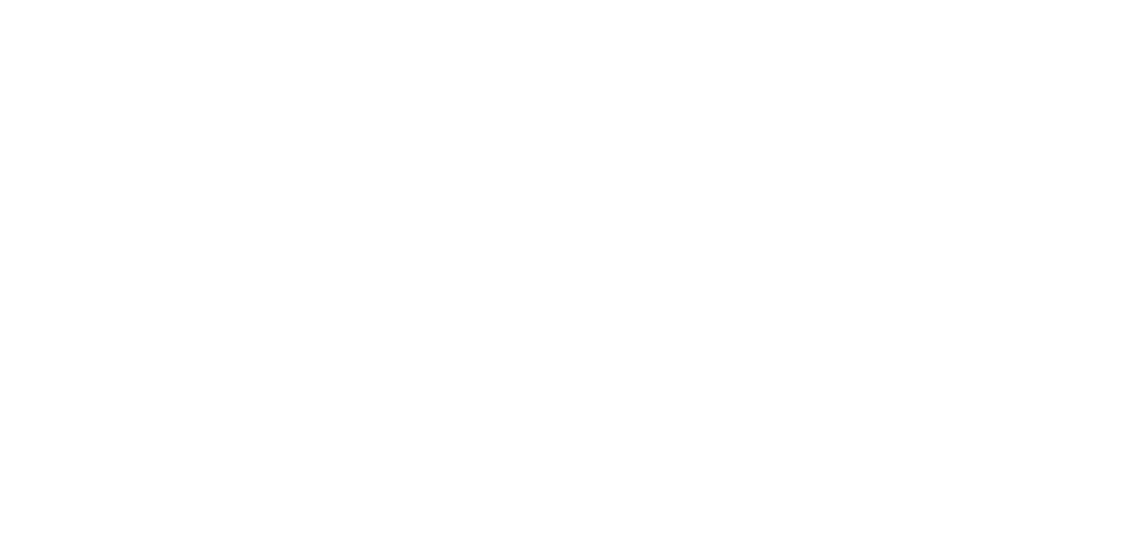

14


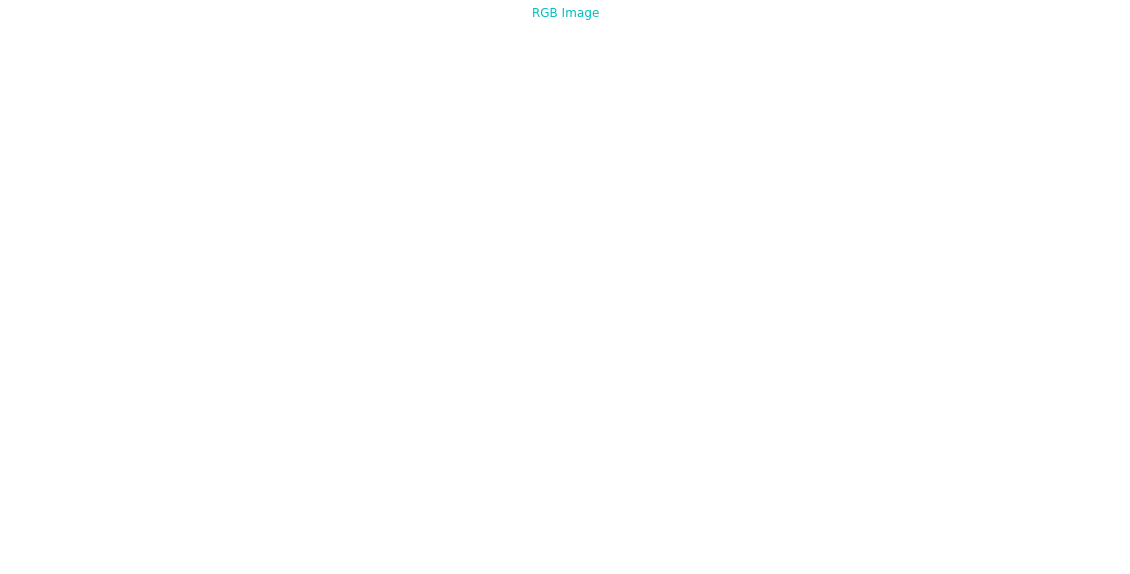

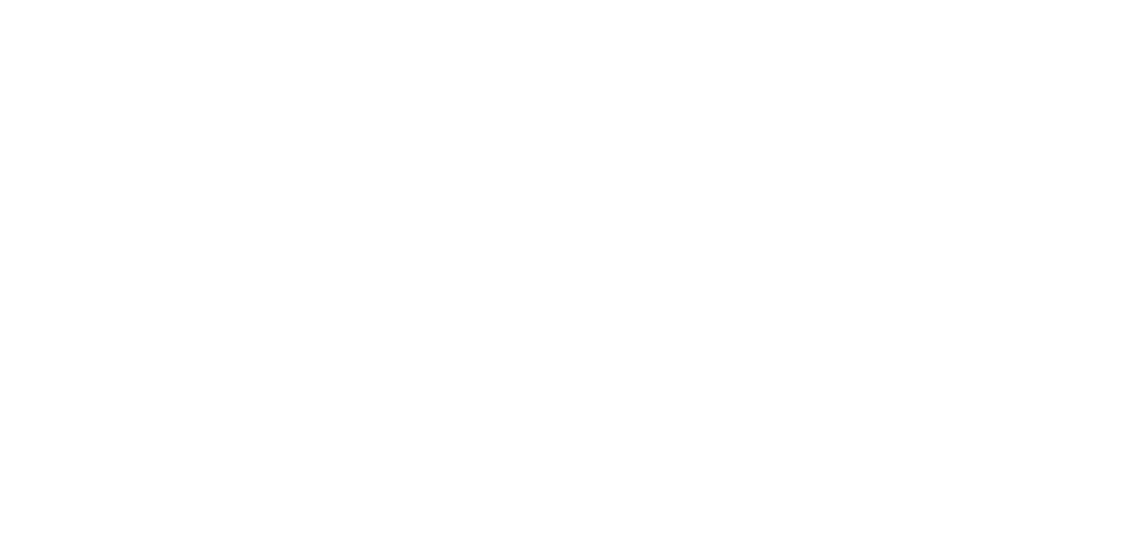

15


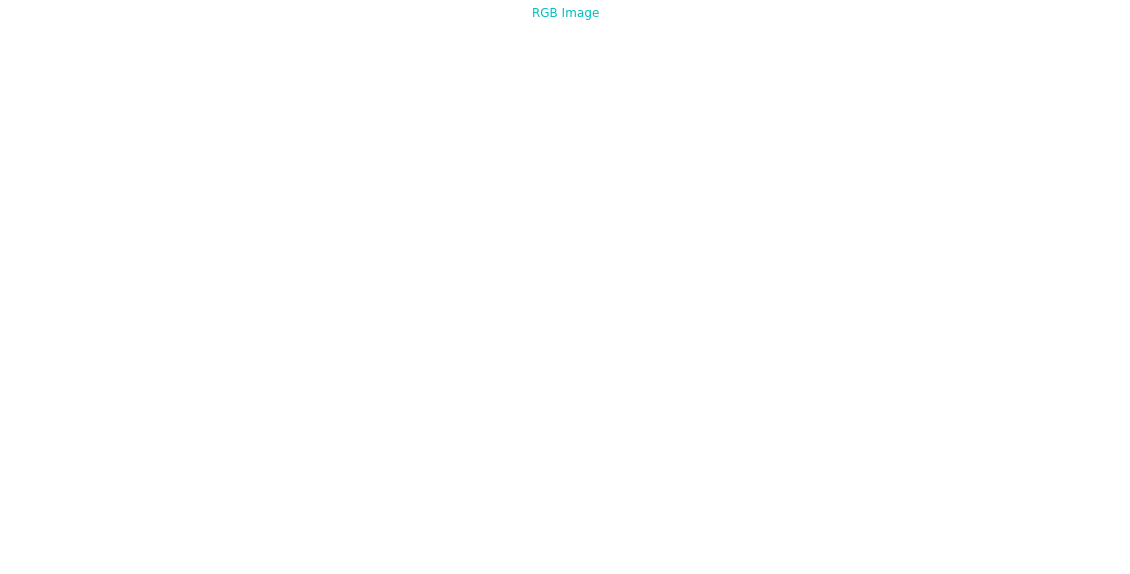

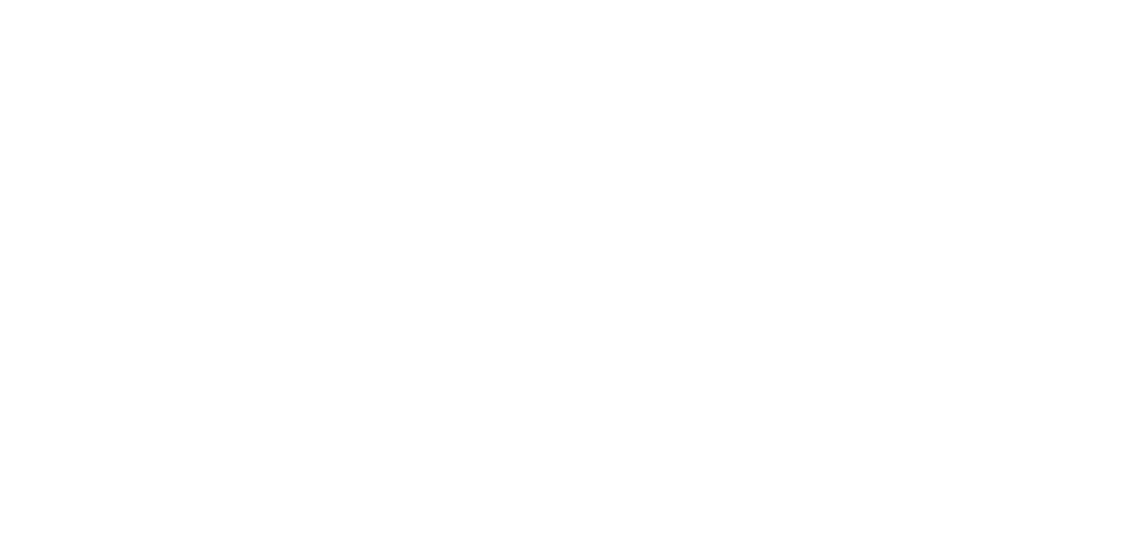

16


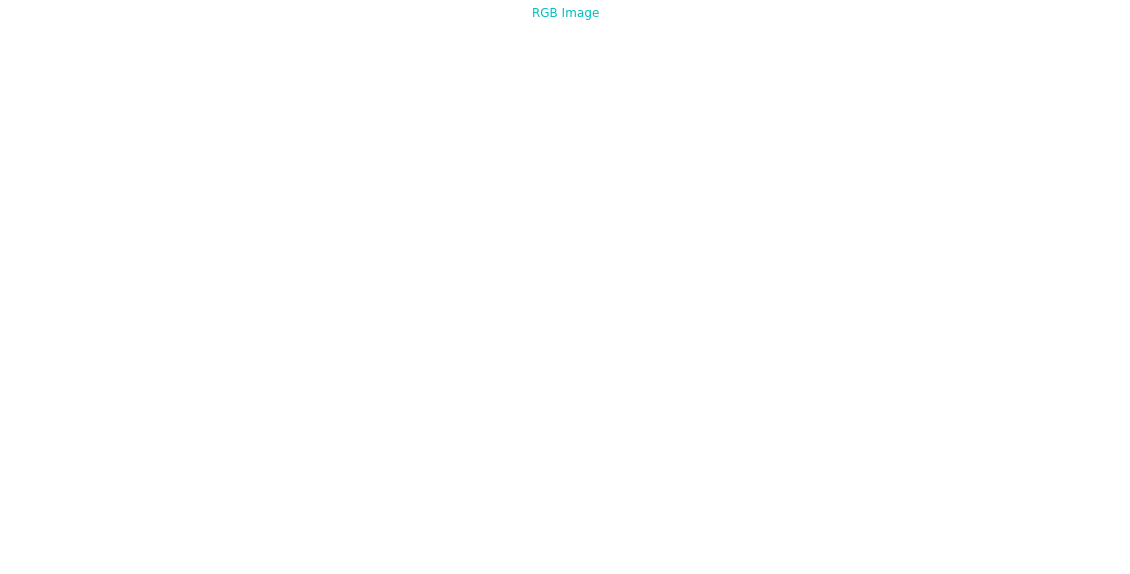

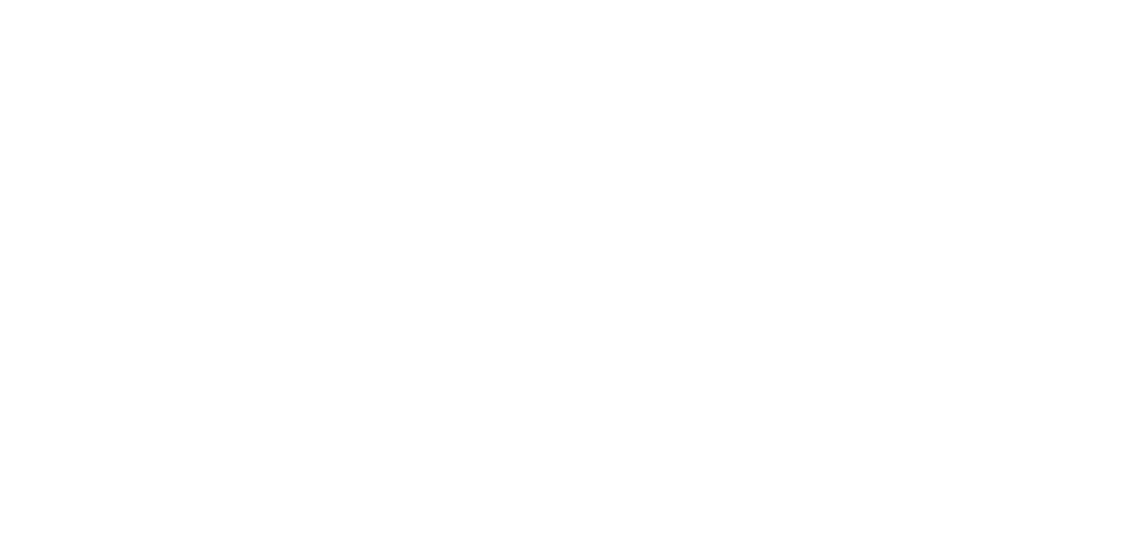

17


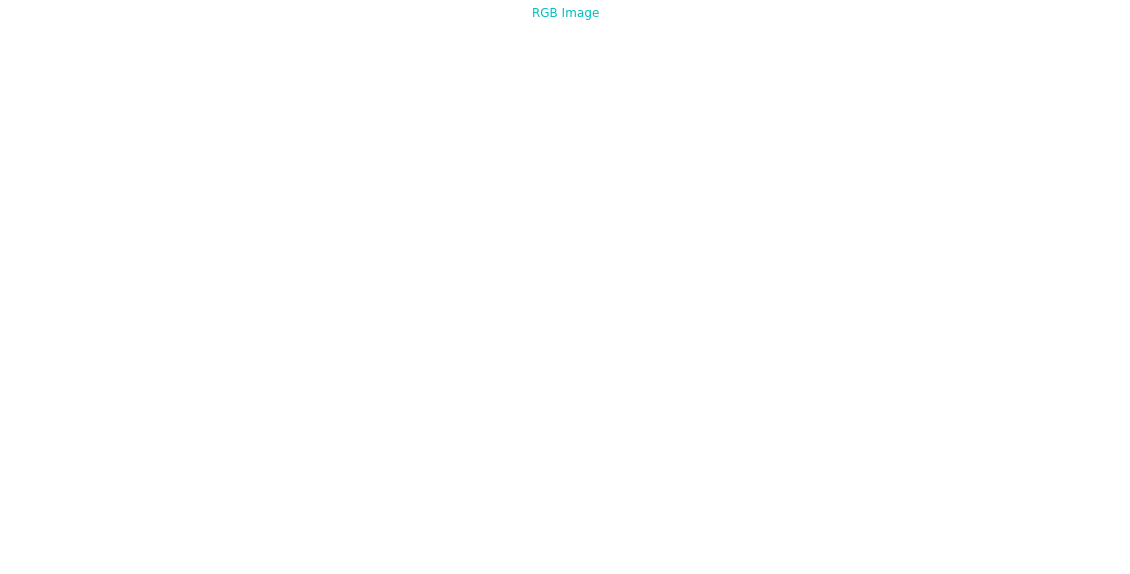

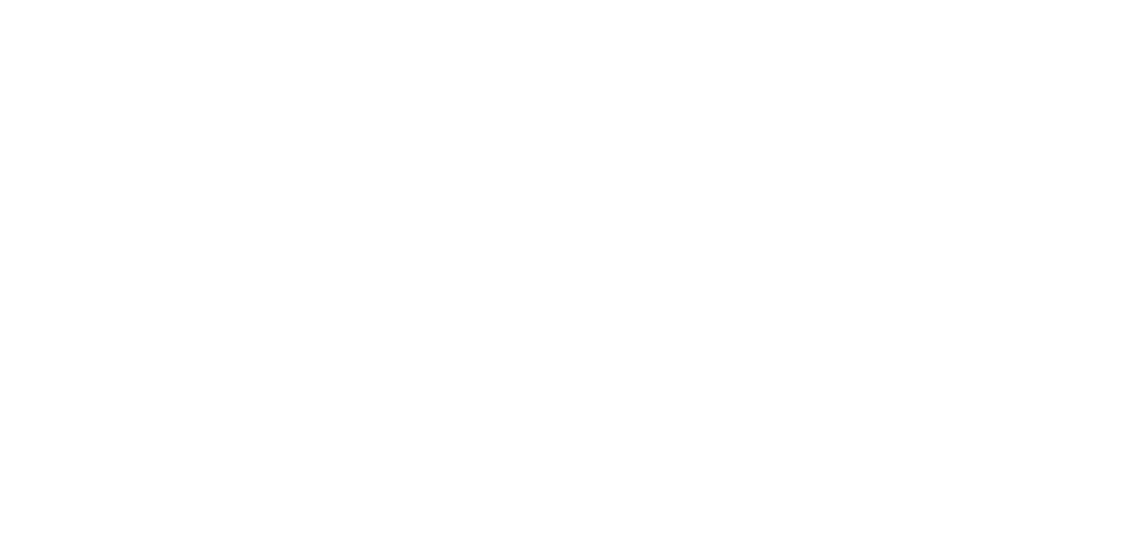

18


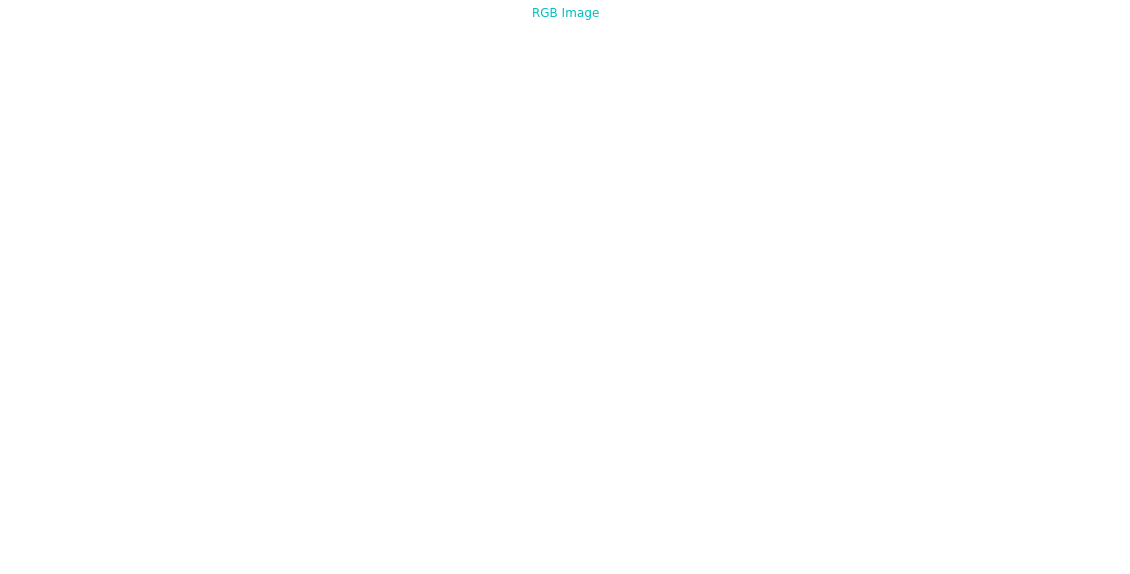

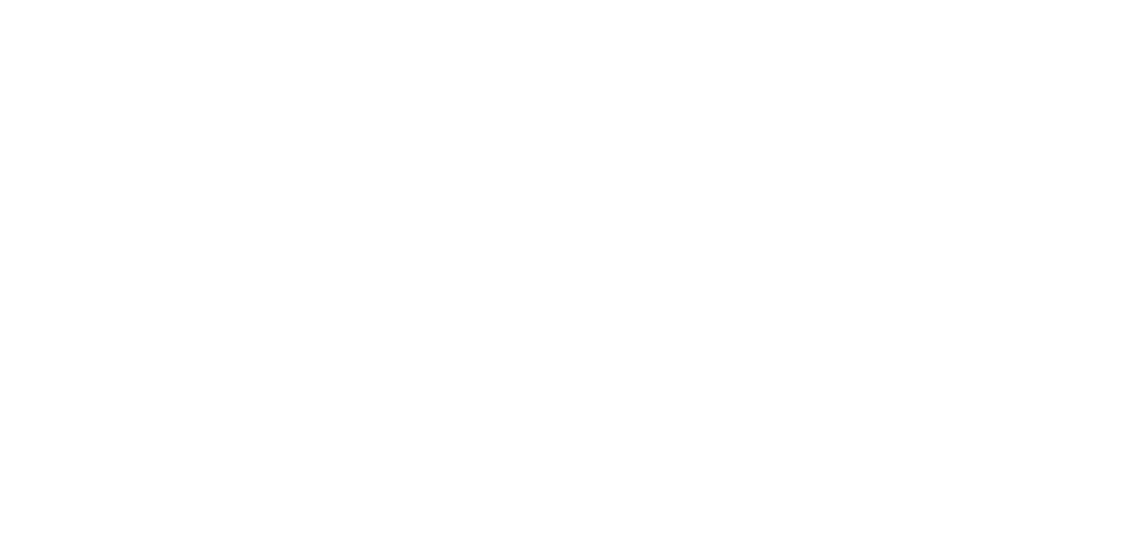

19


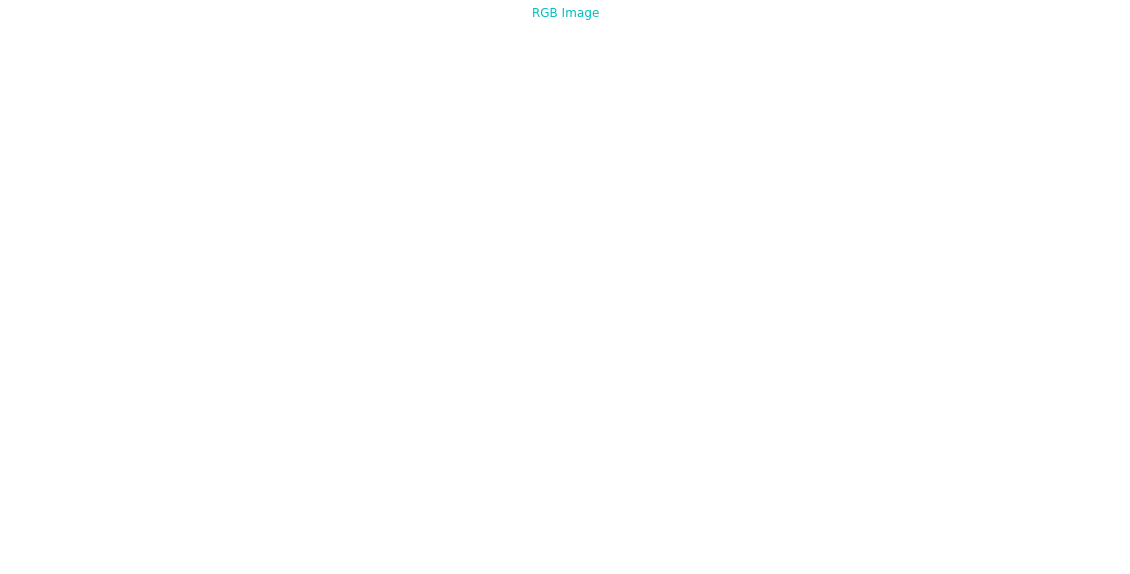

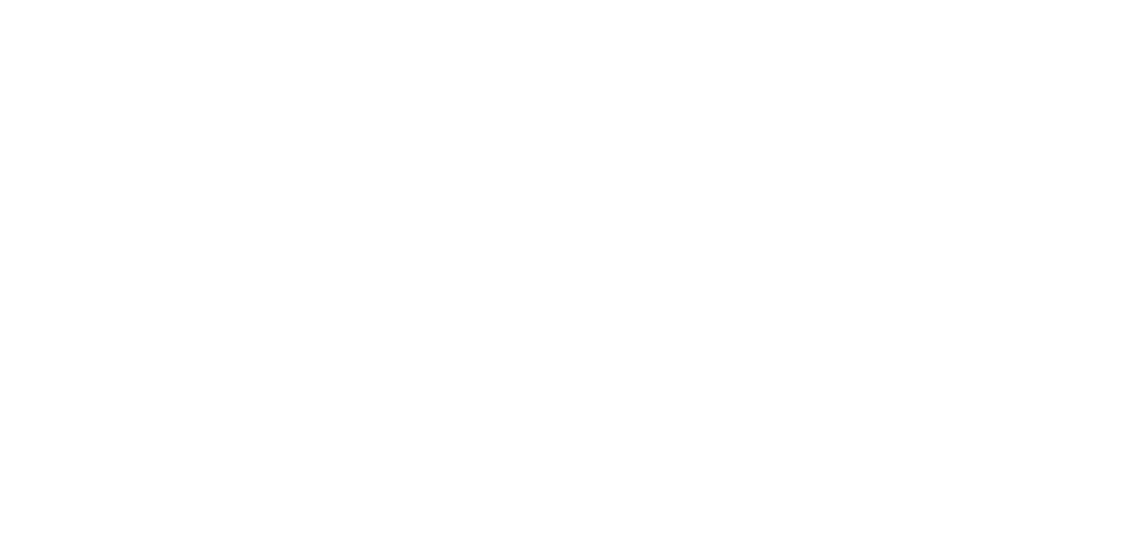

20


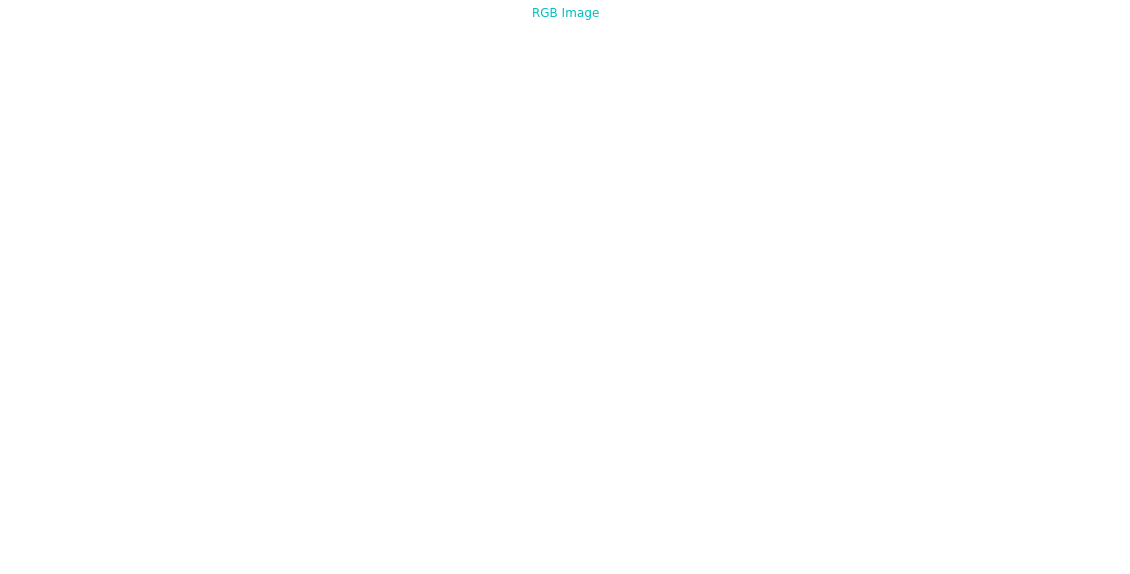

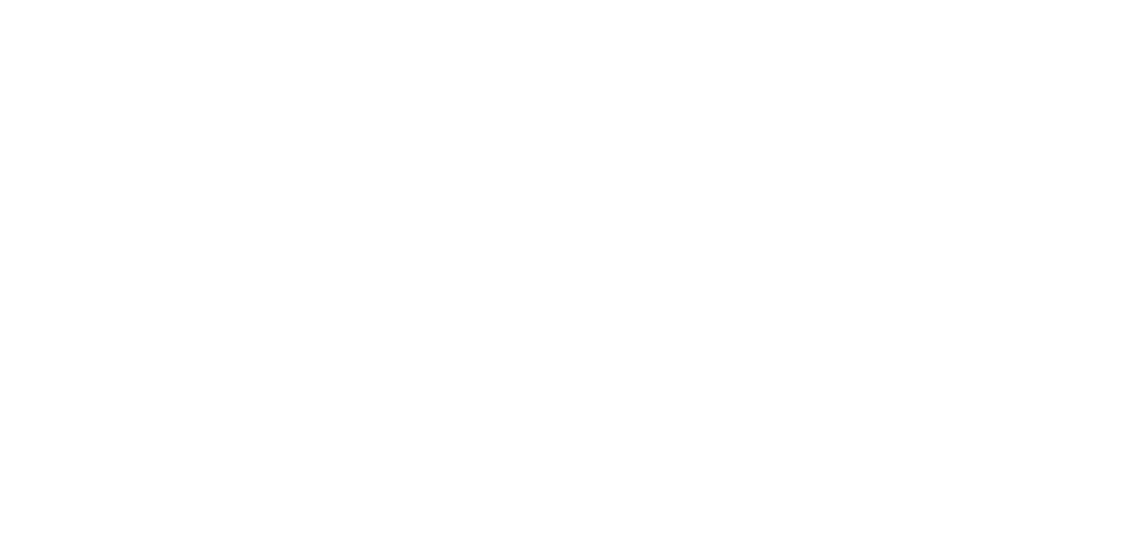

21


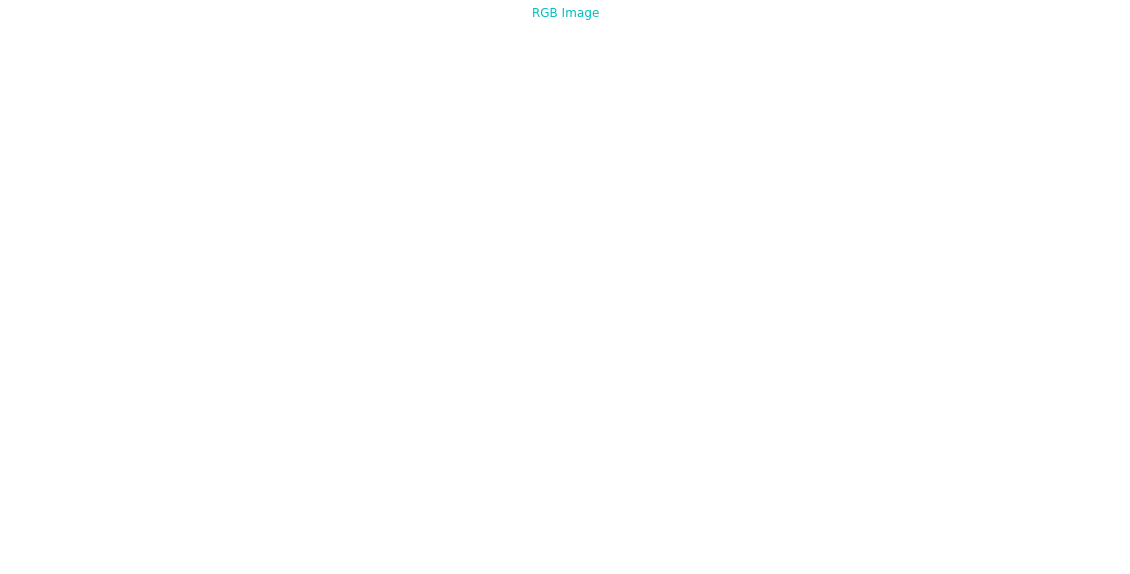

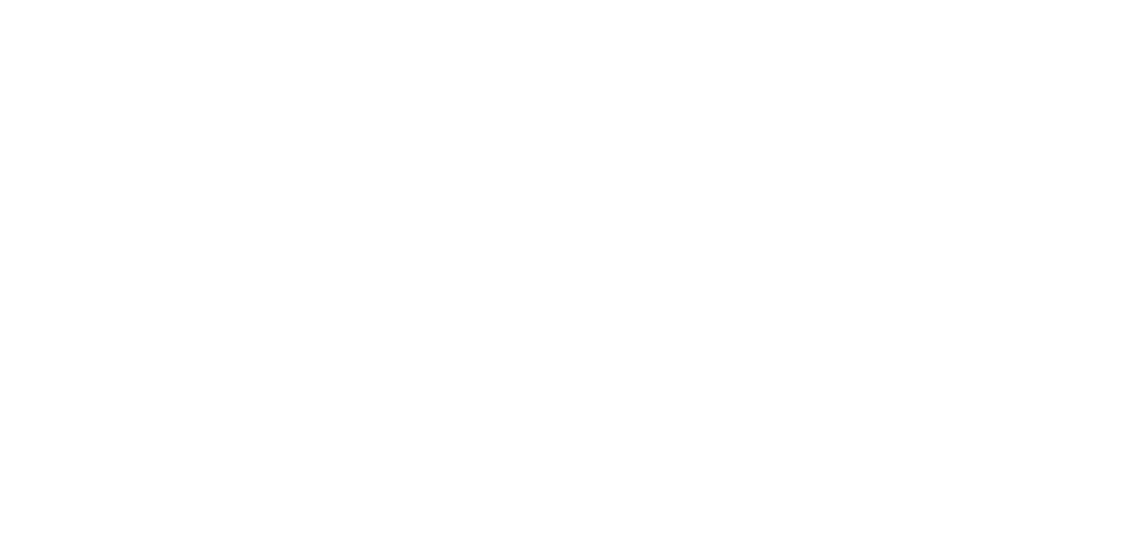

22


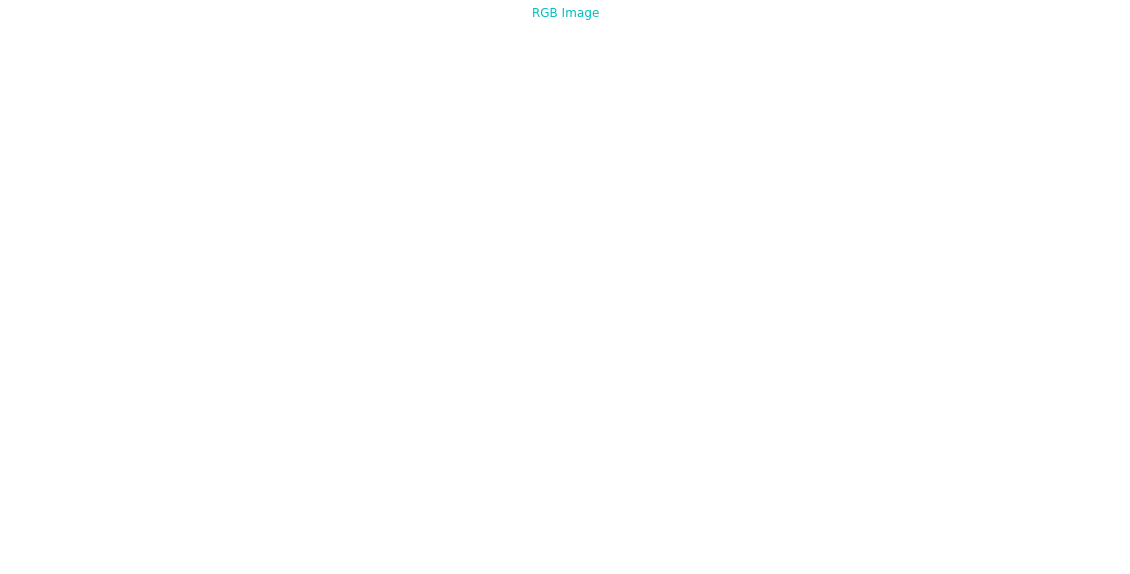

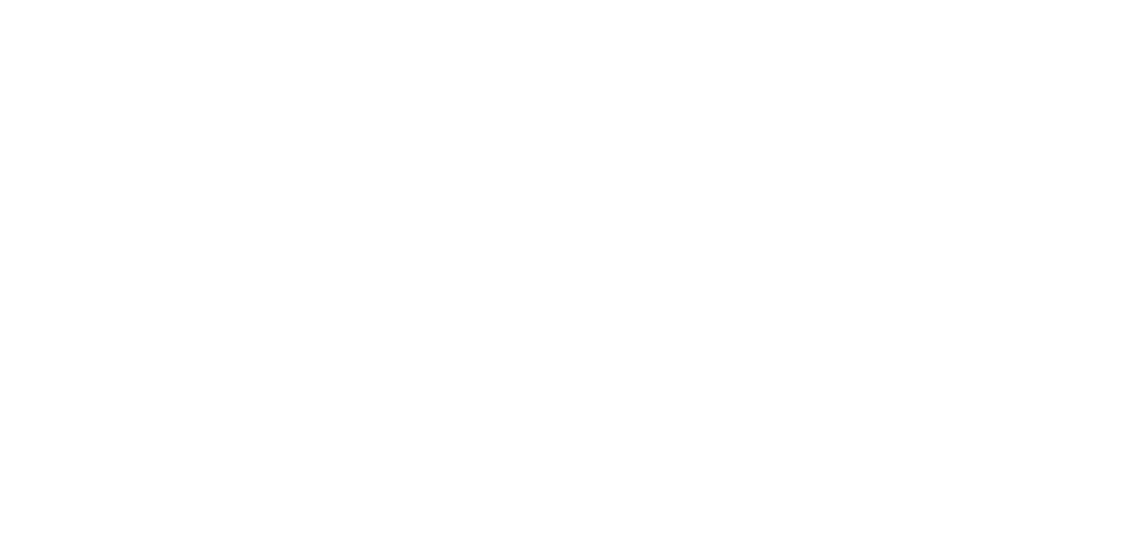

23


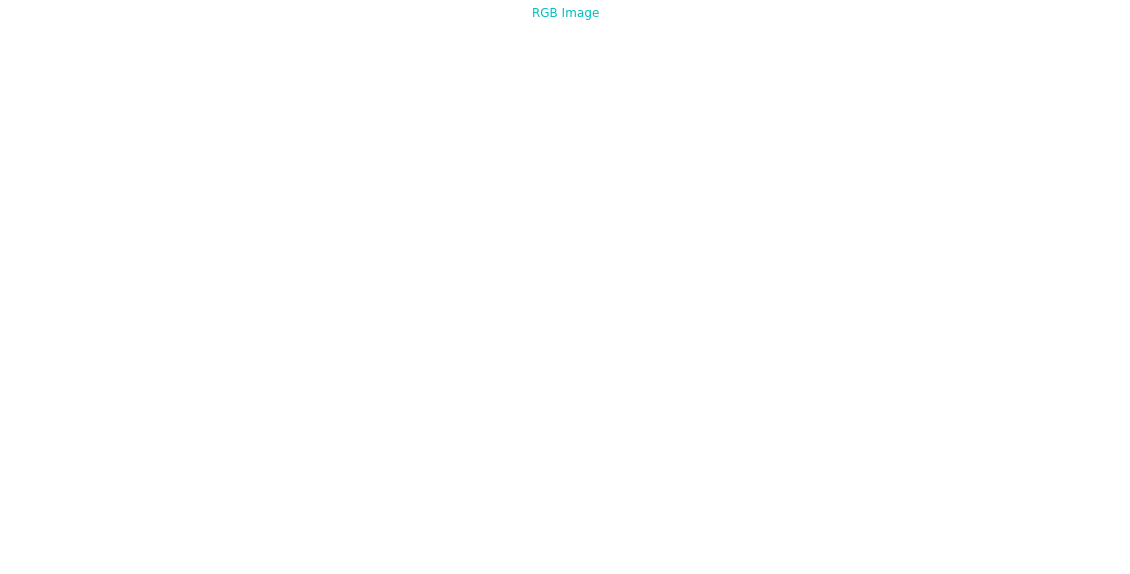

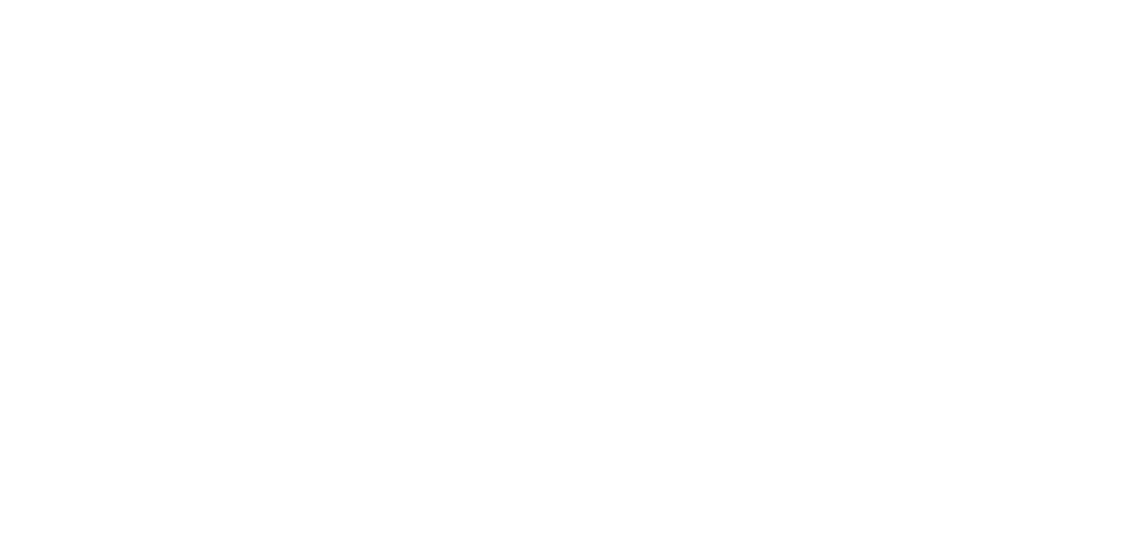

24


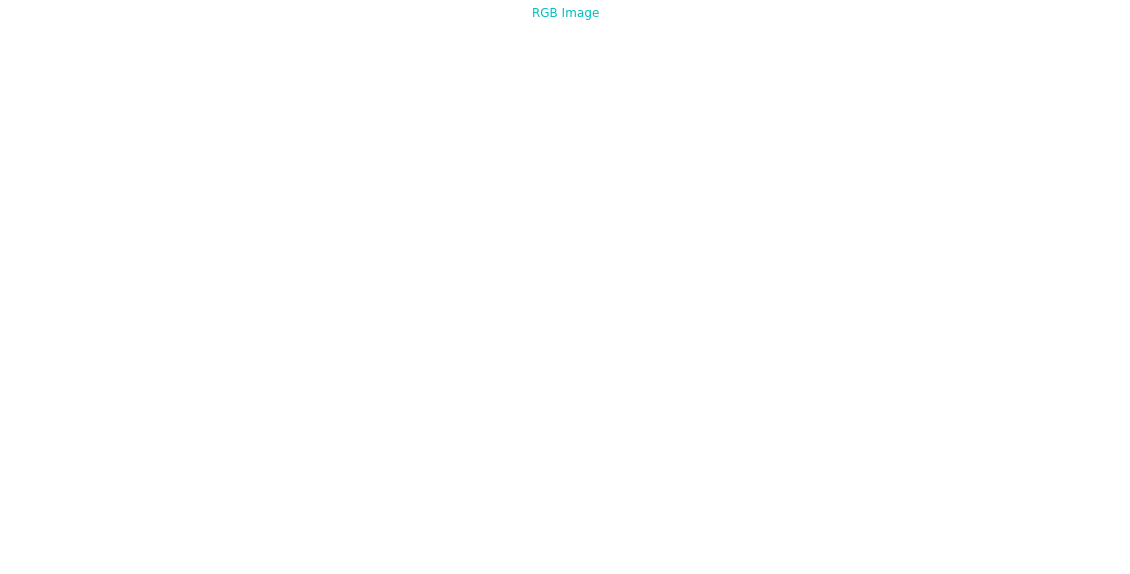

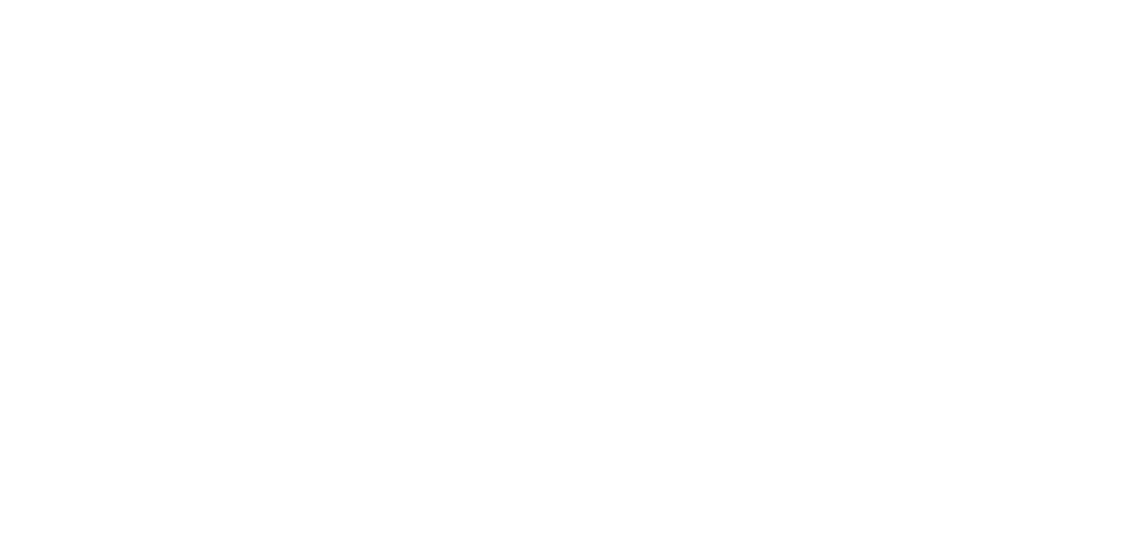

25


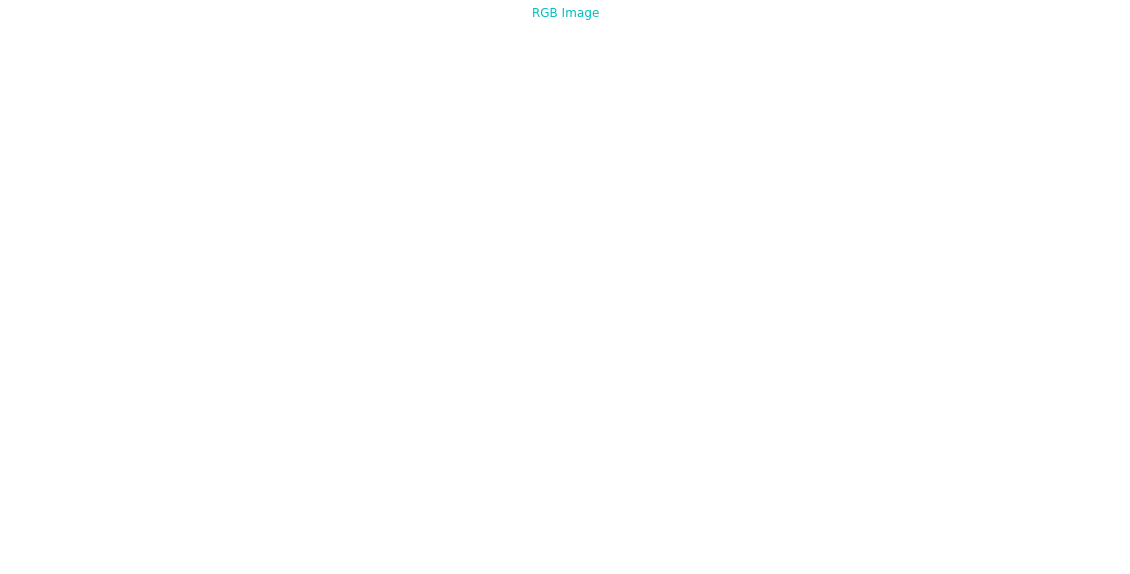

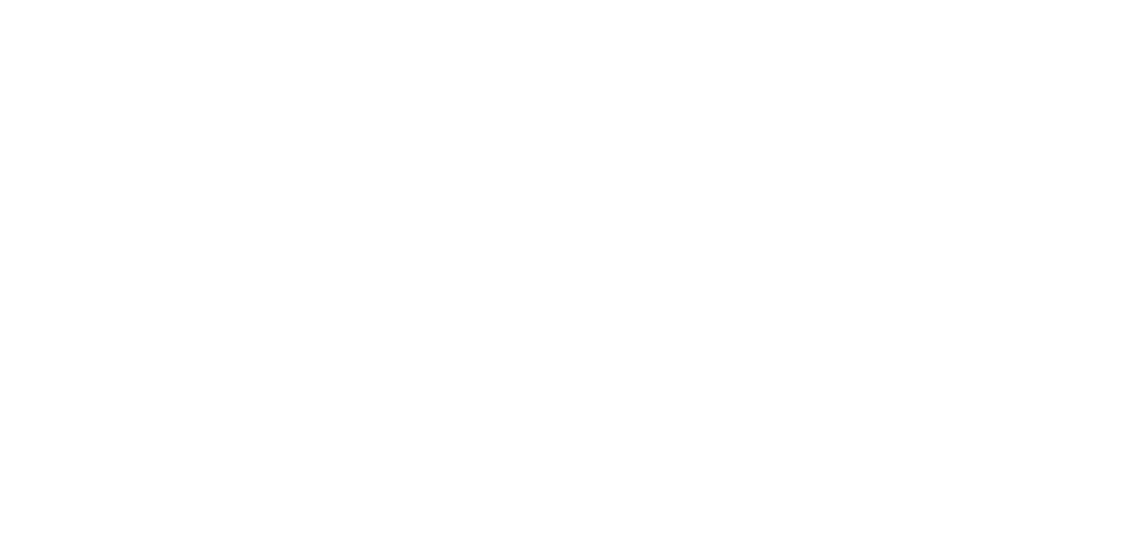

26


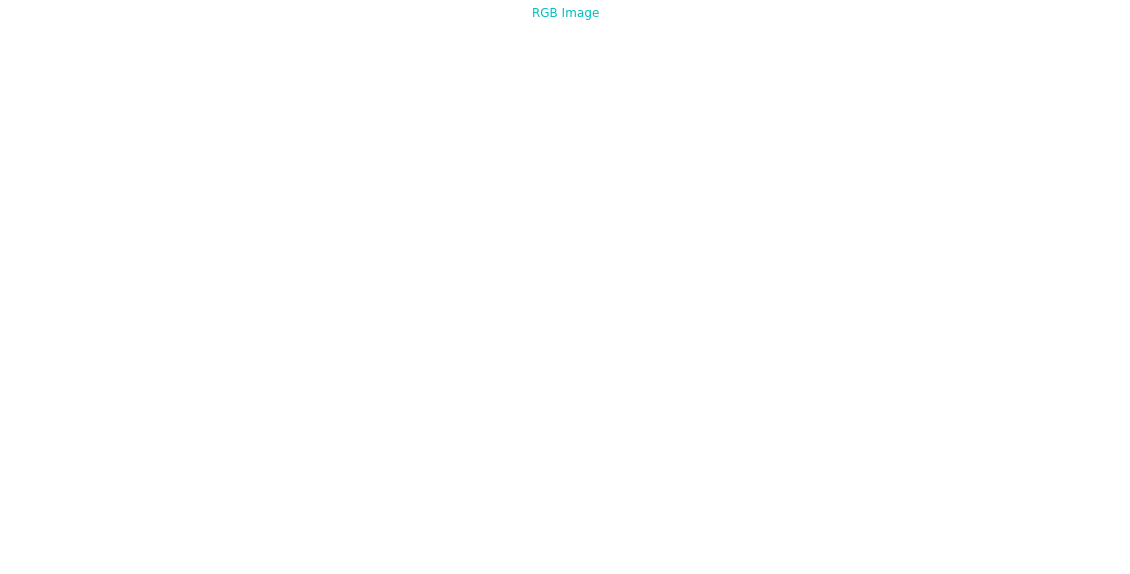

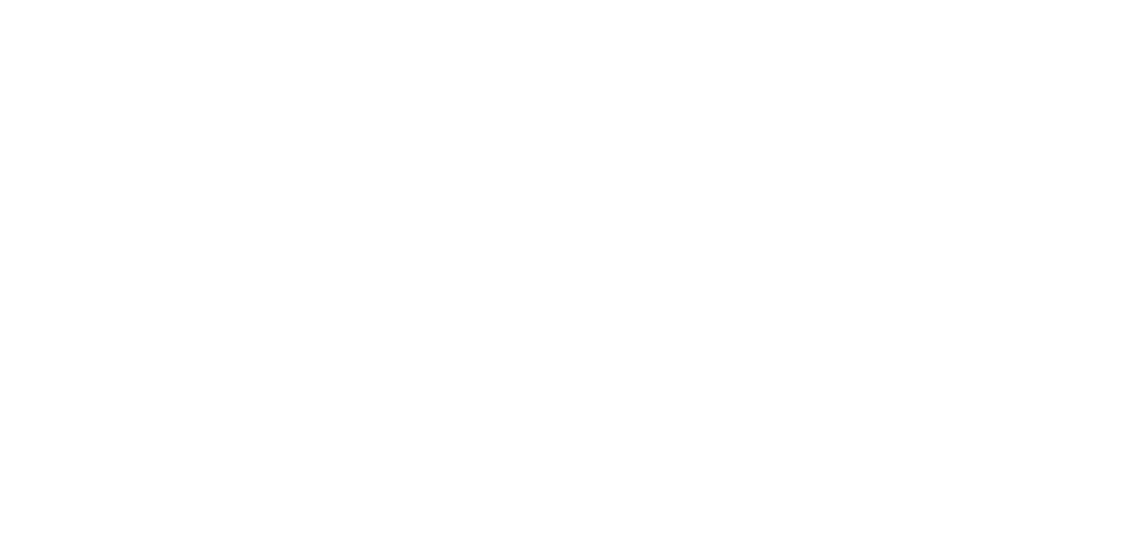

27


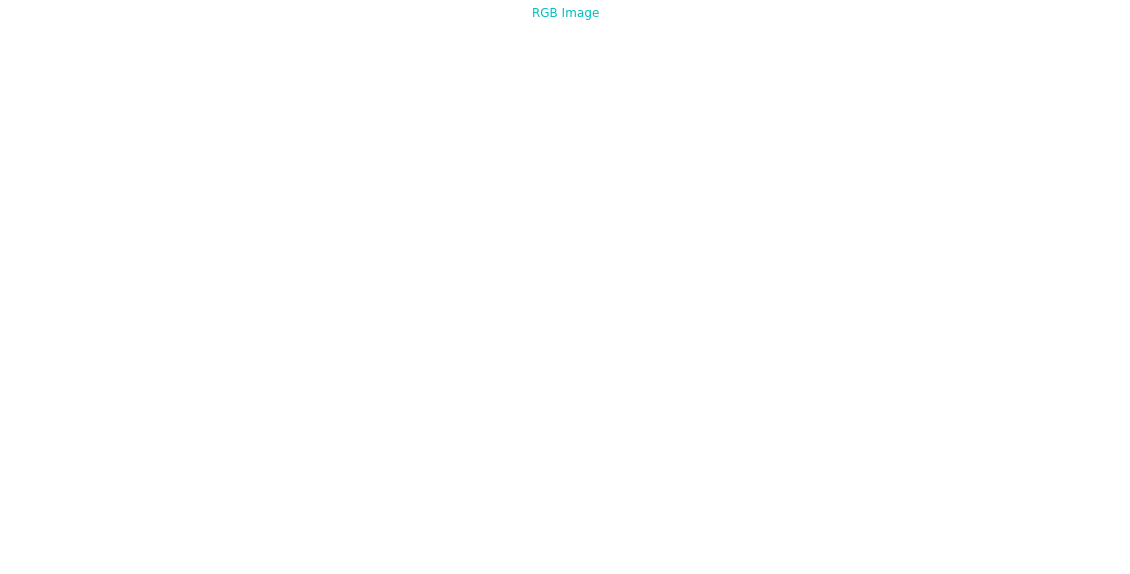

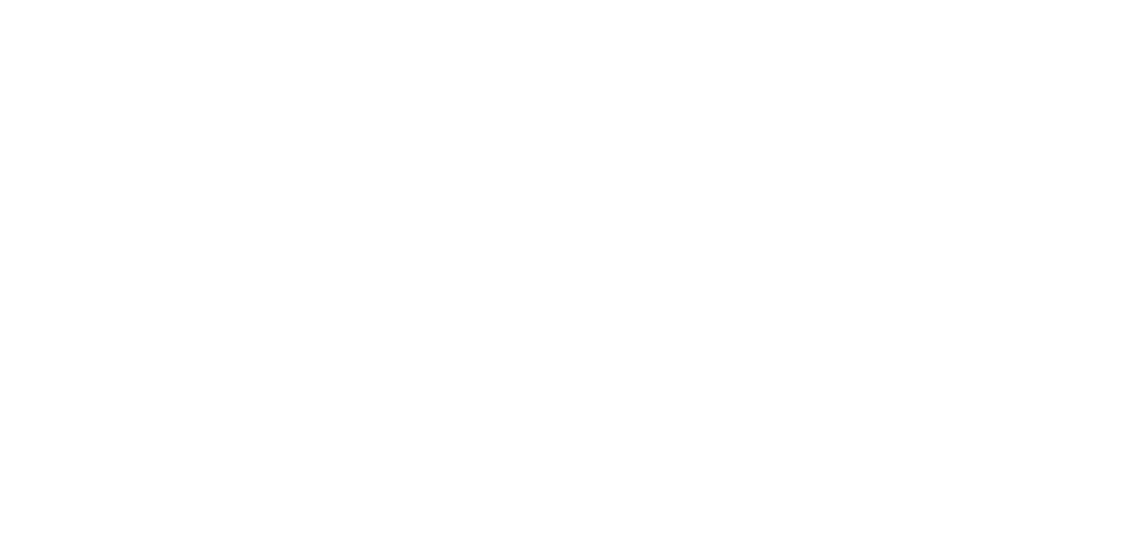

28


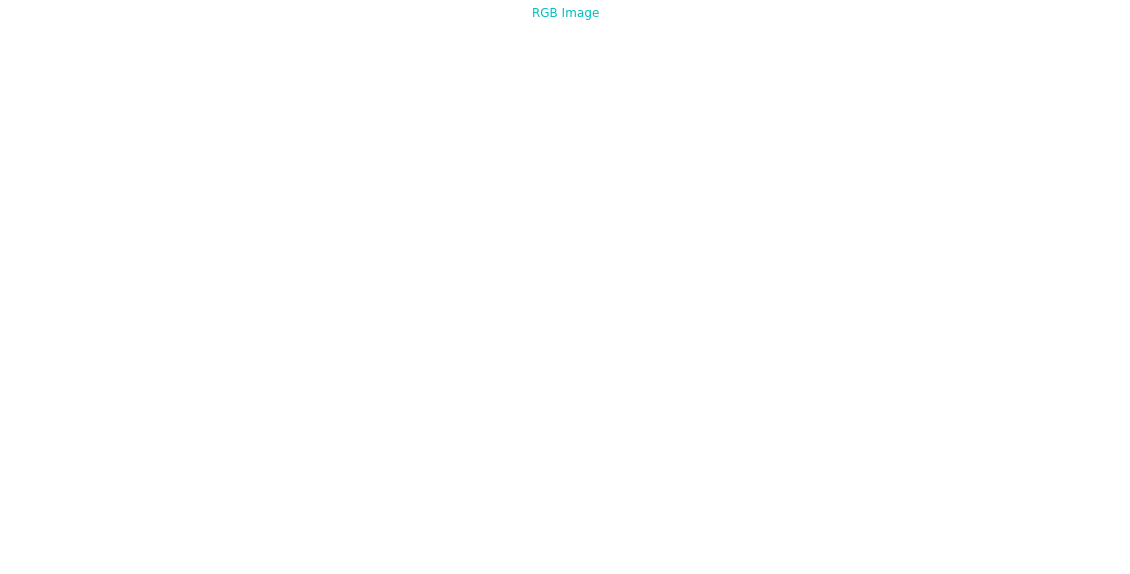

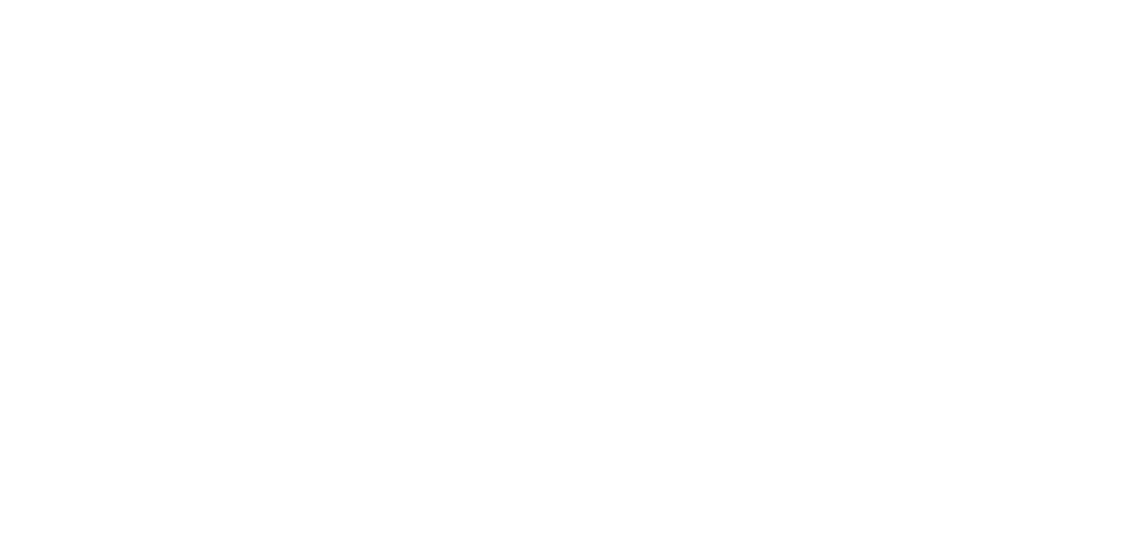

29


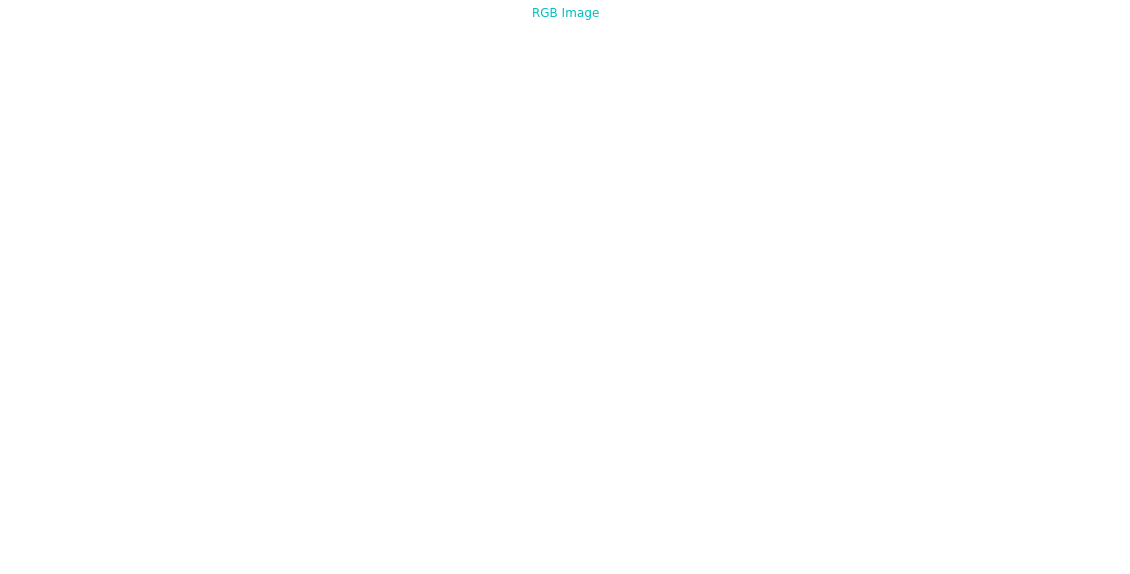

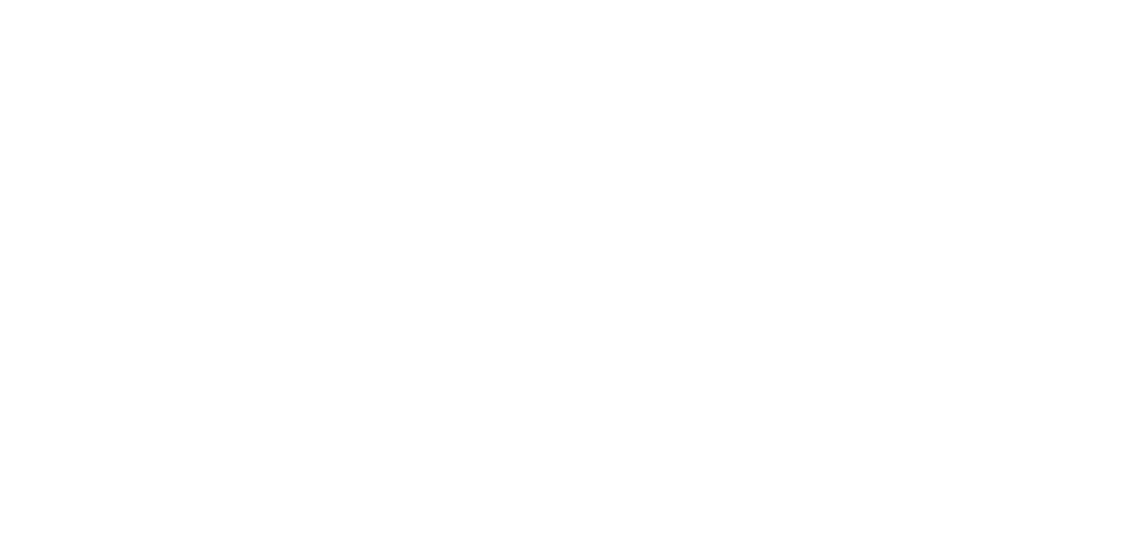

30


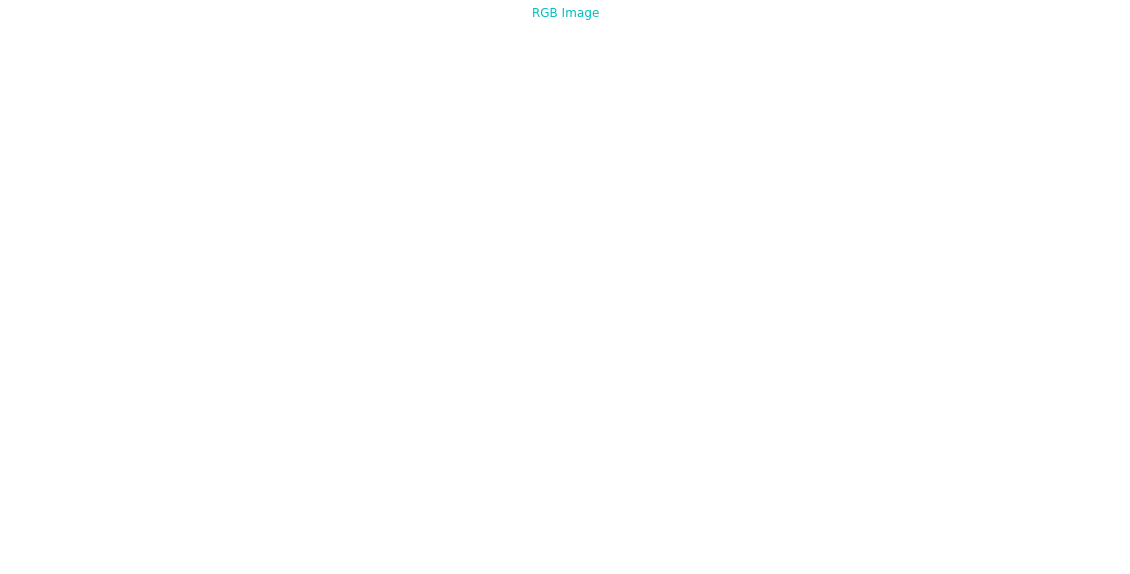

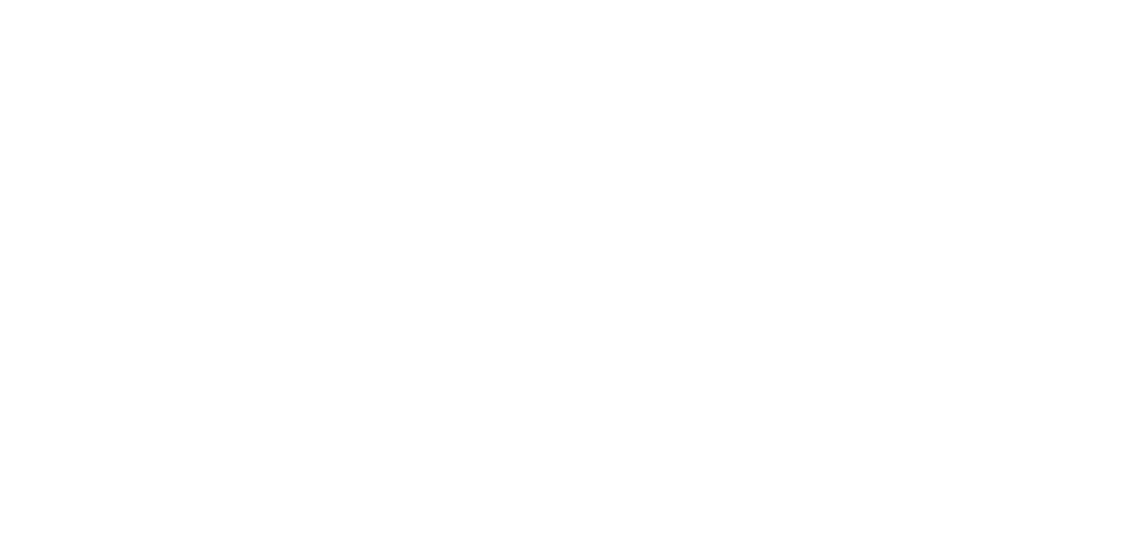

31


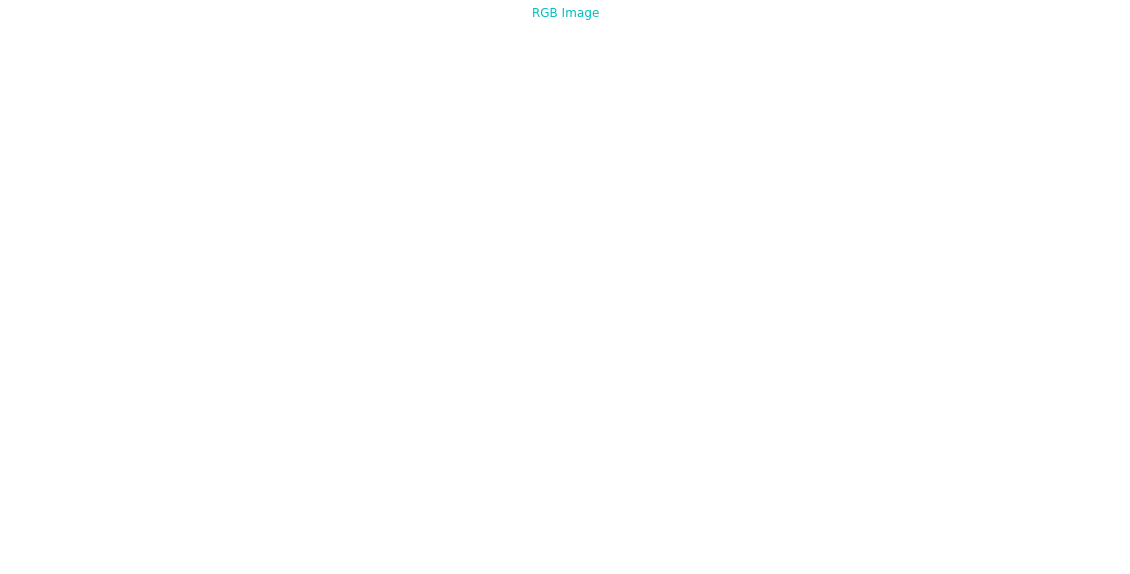

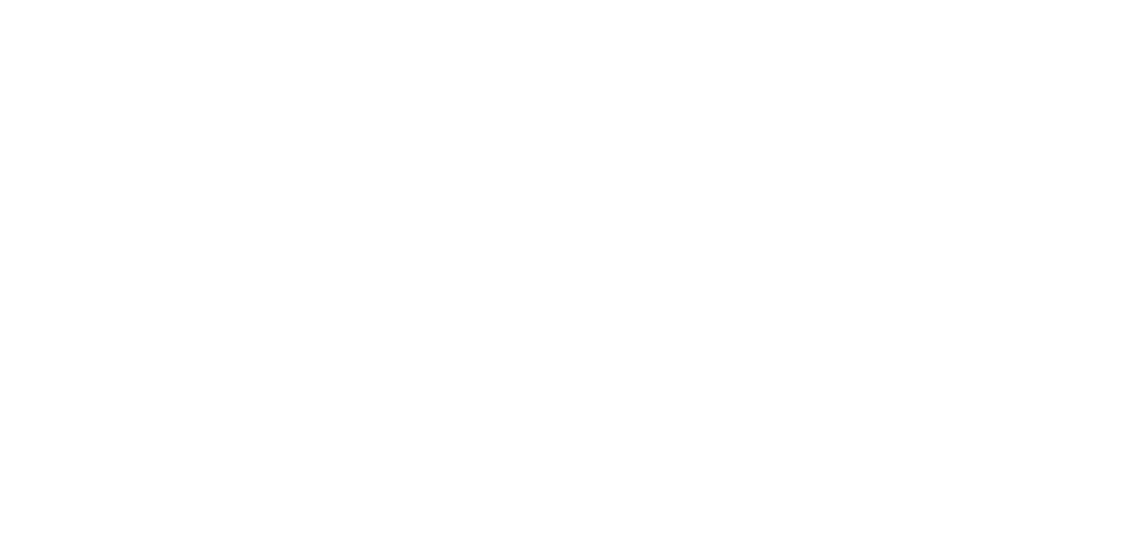

32


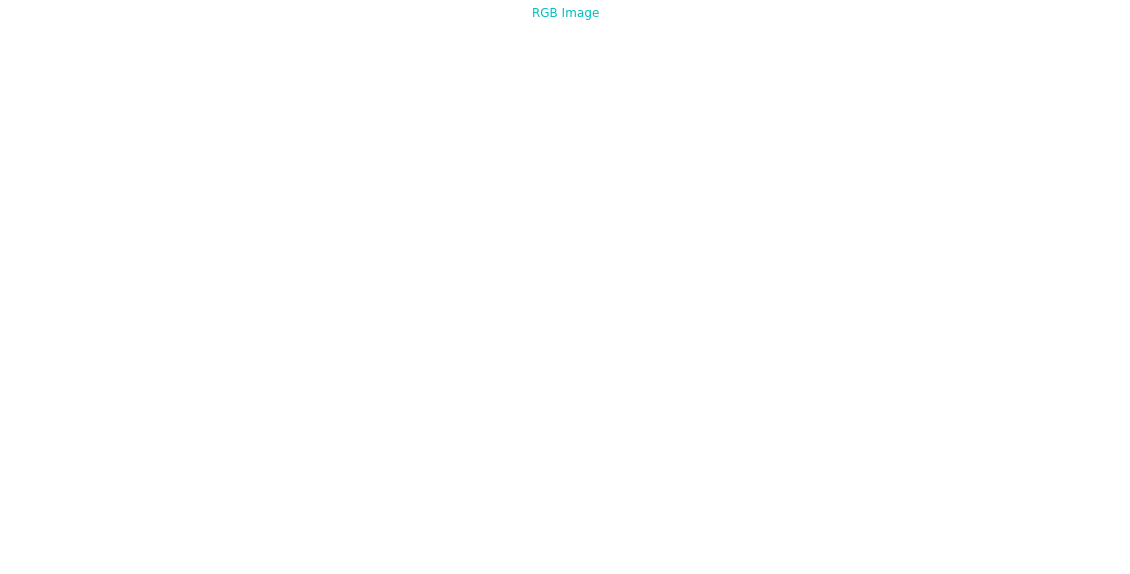

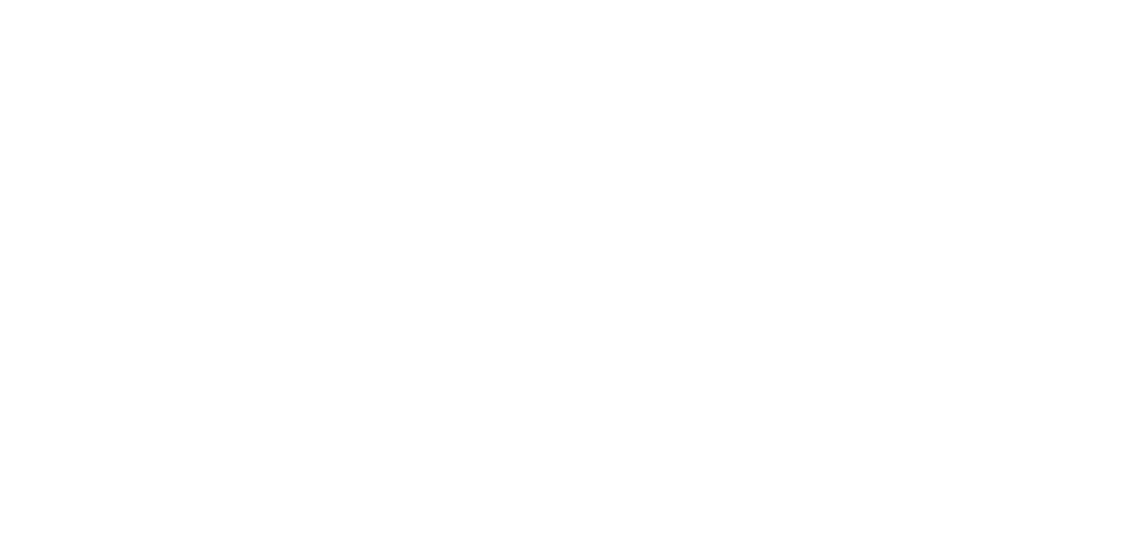

33


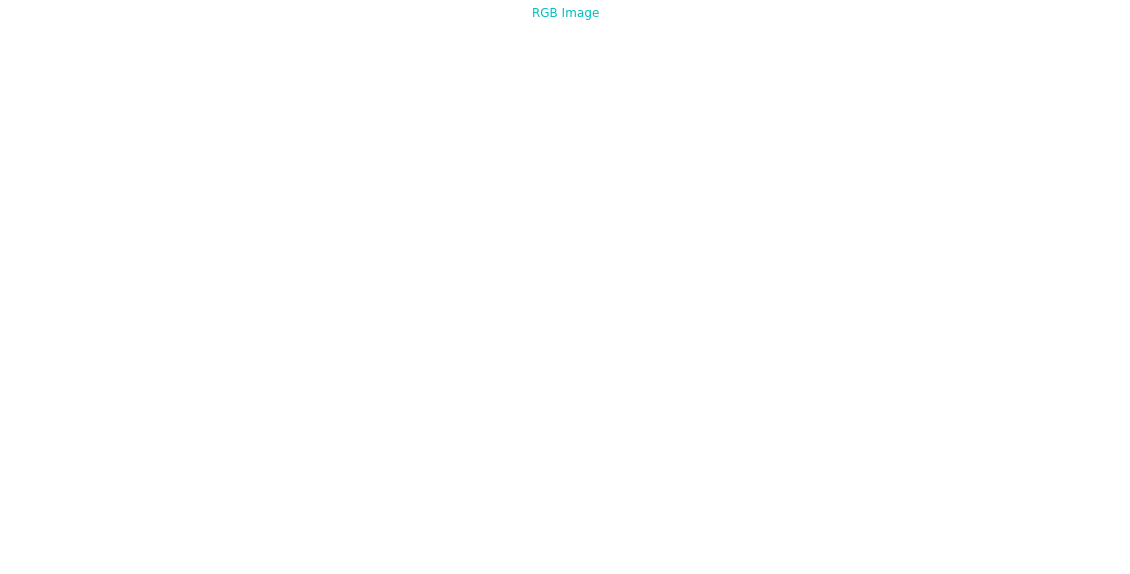

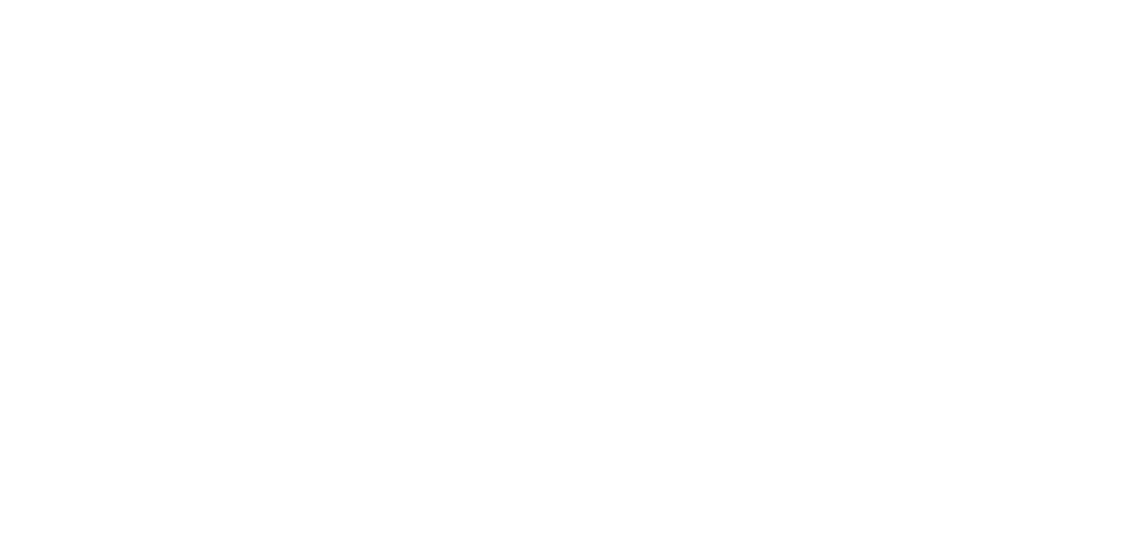

34


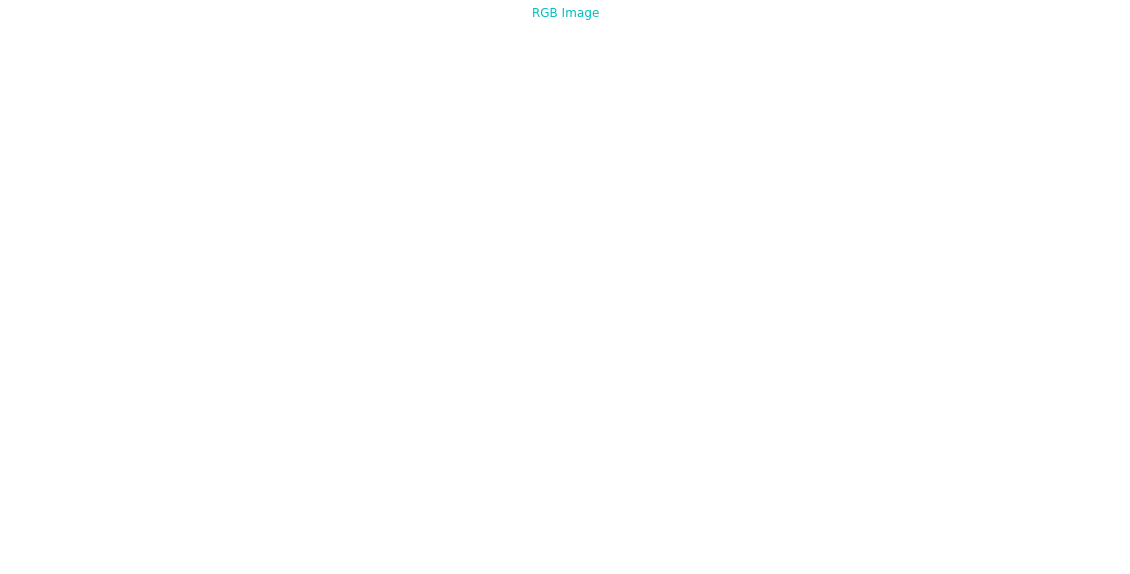

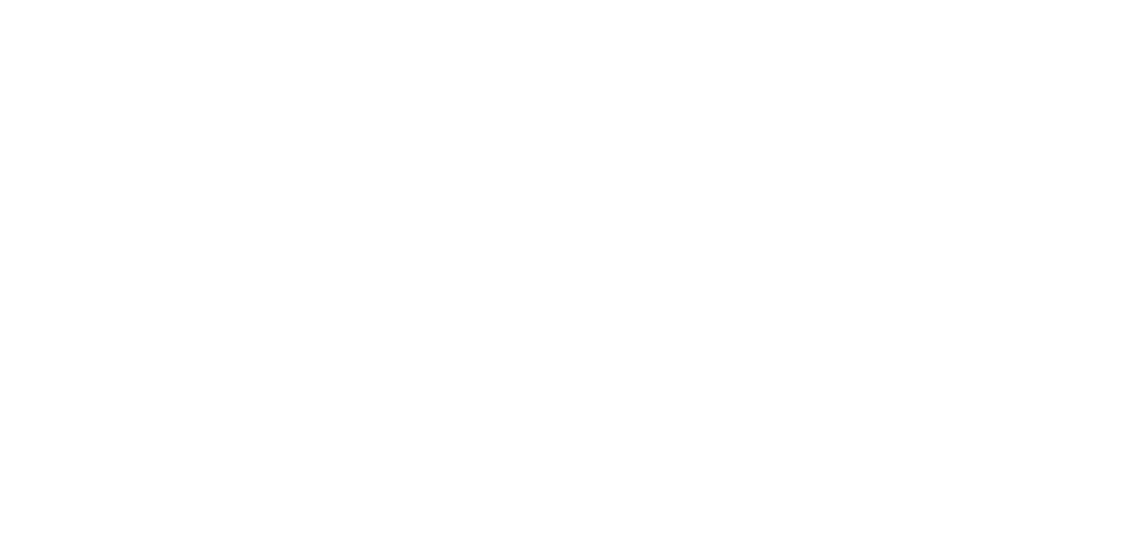

35


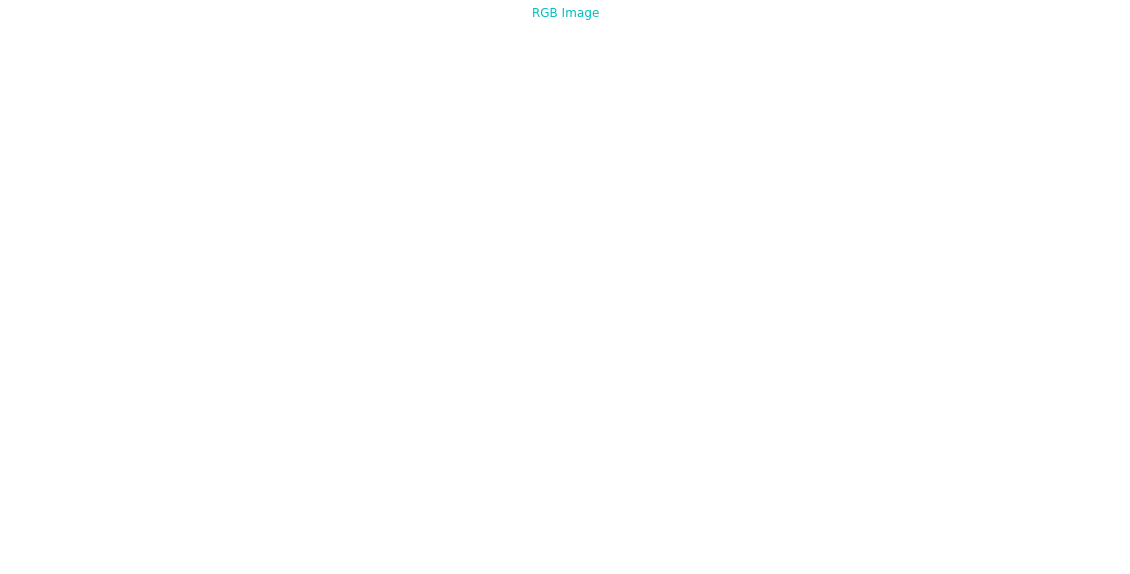

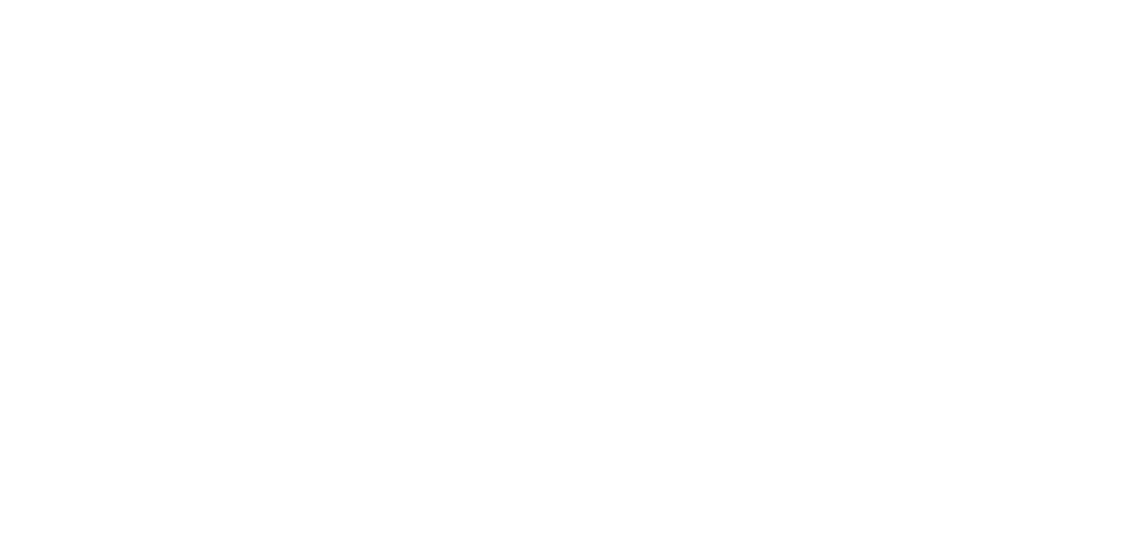

36


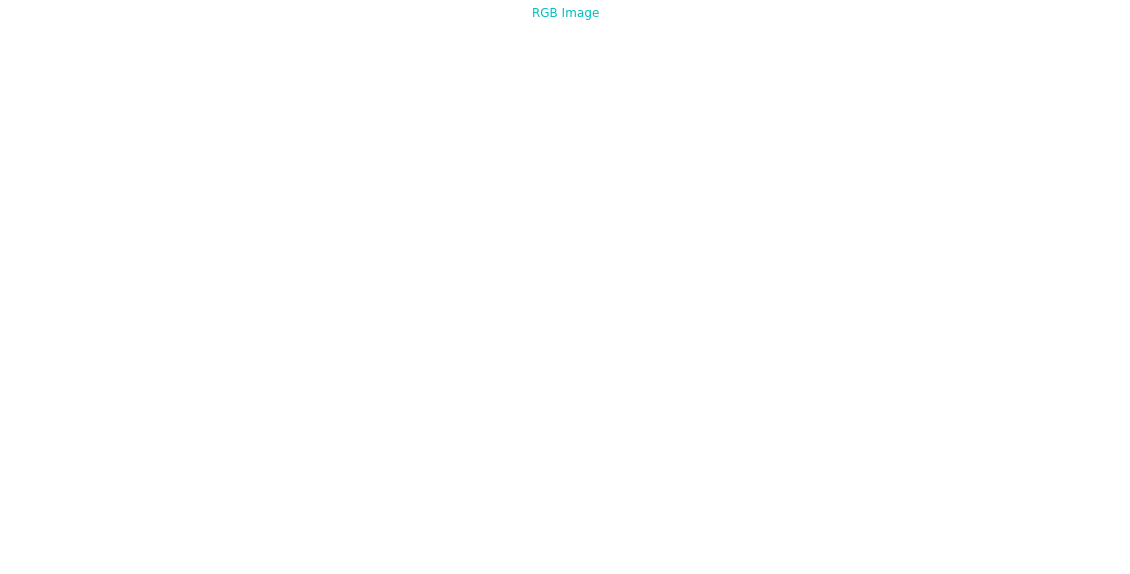

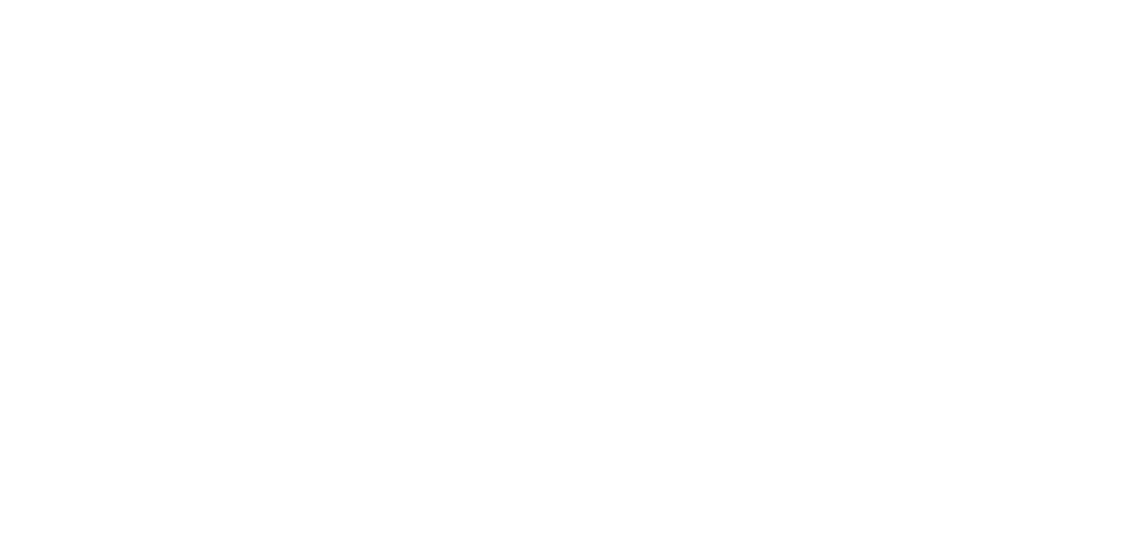

37


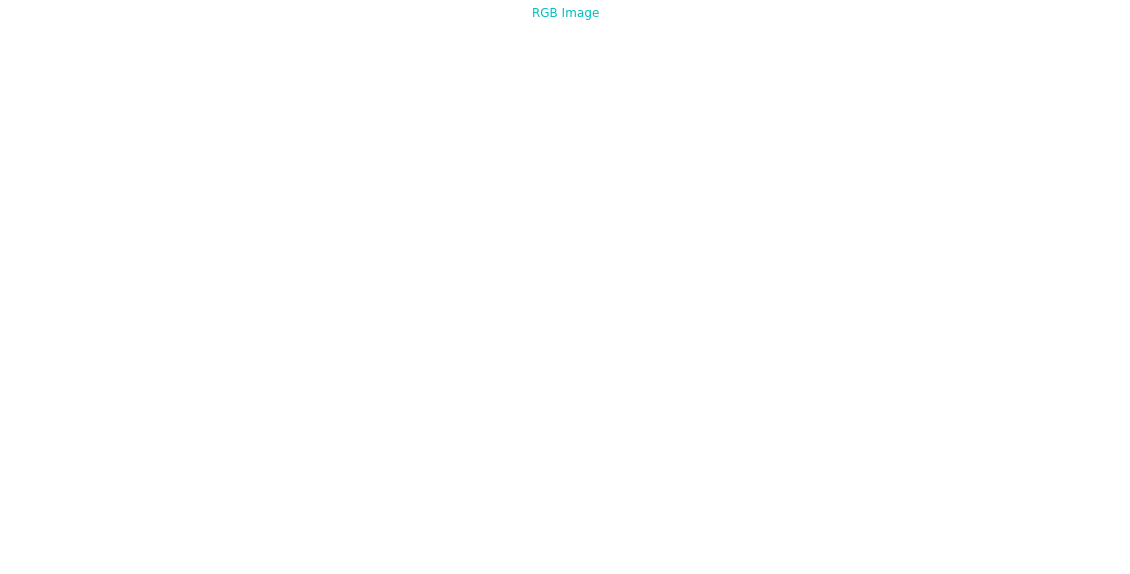

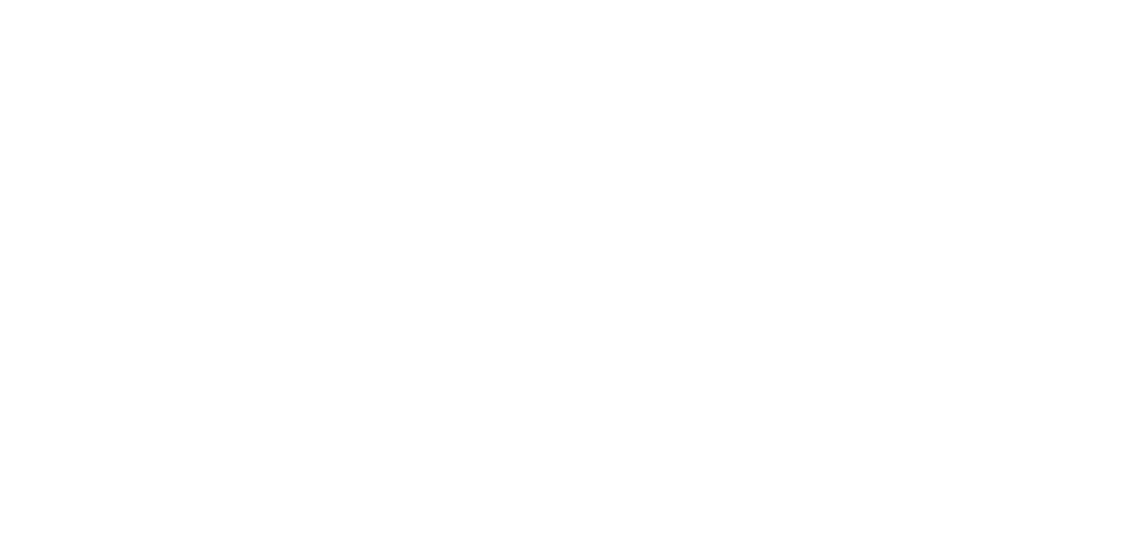

38


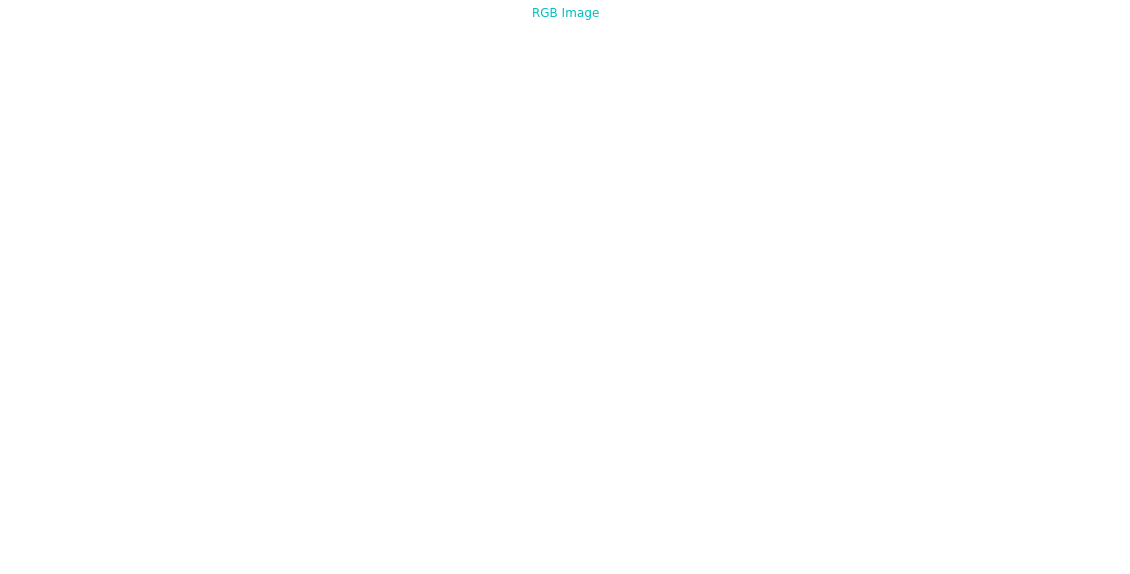

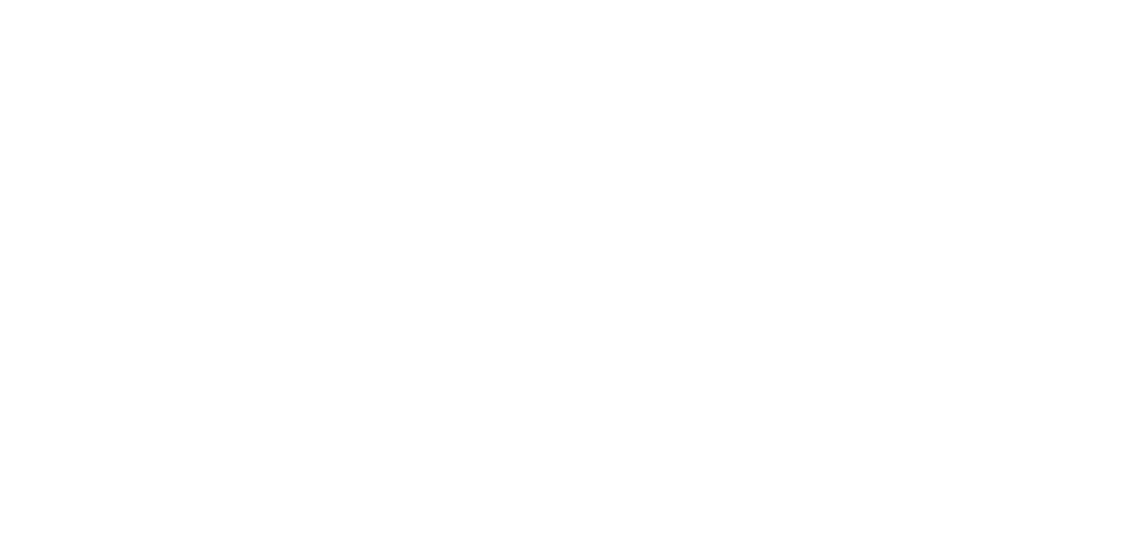

39


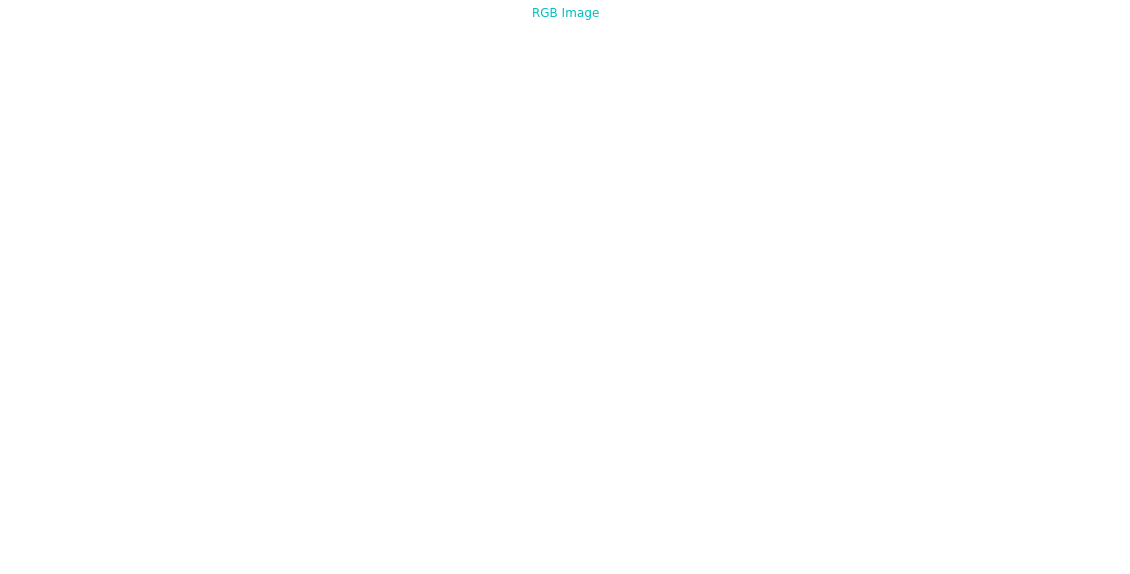

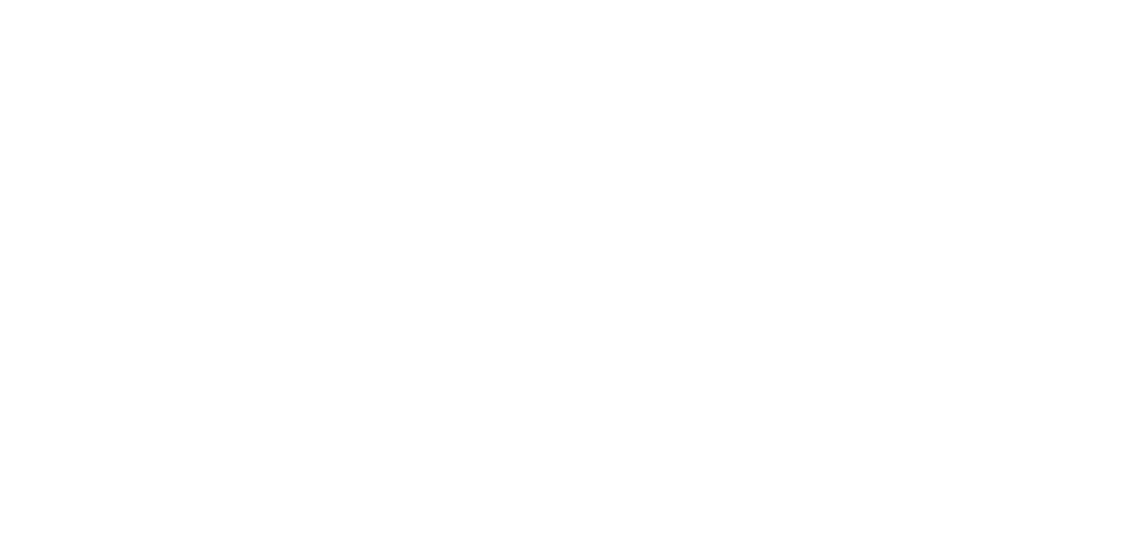

40


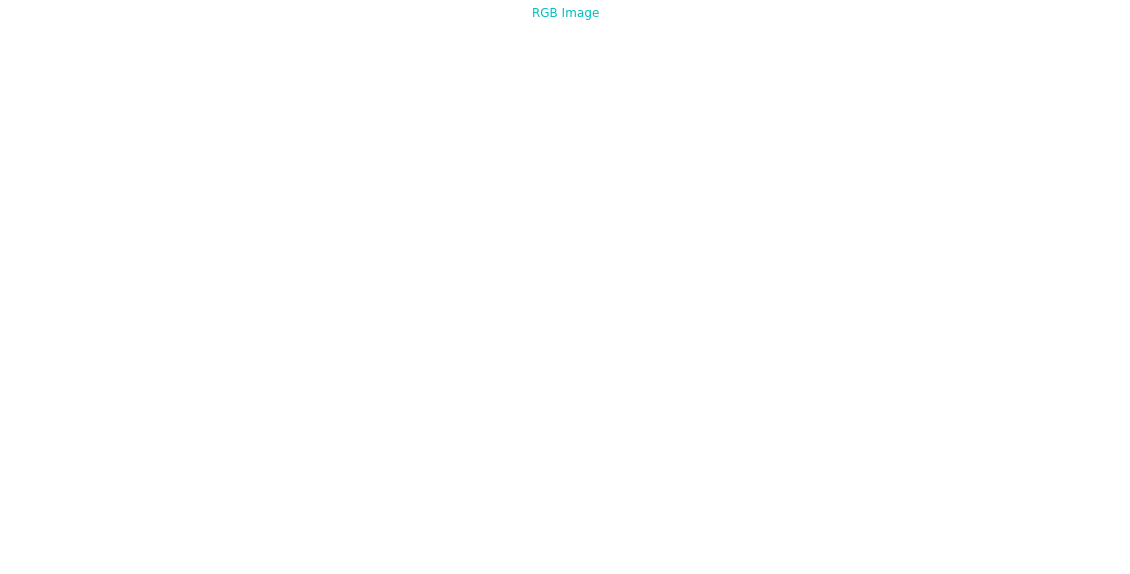

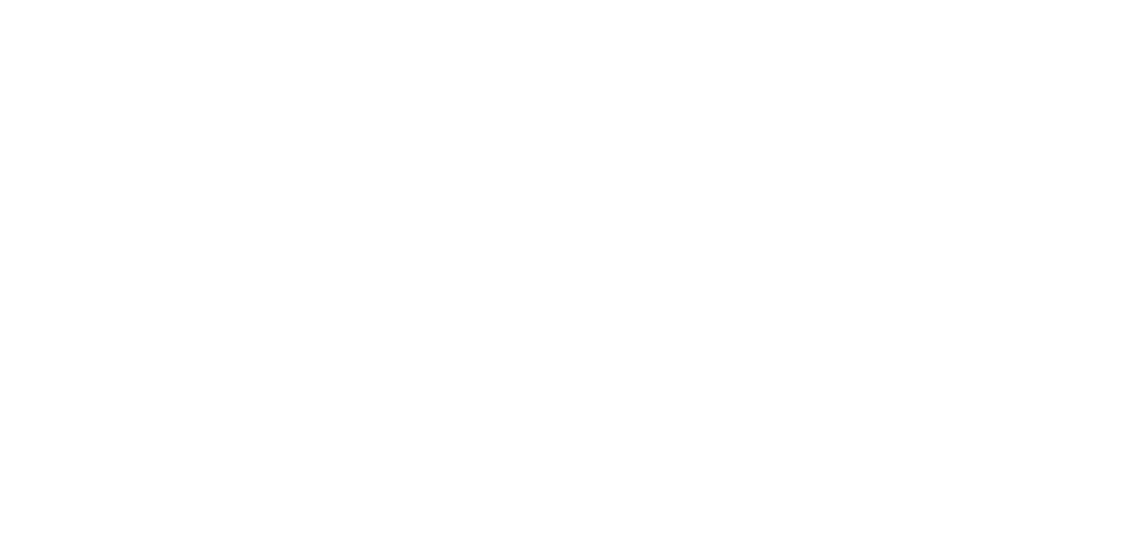

41


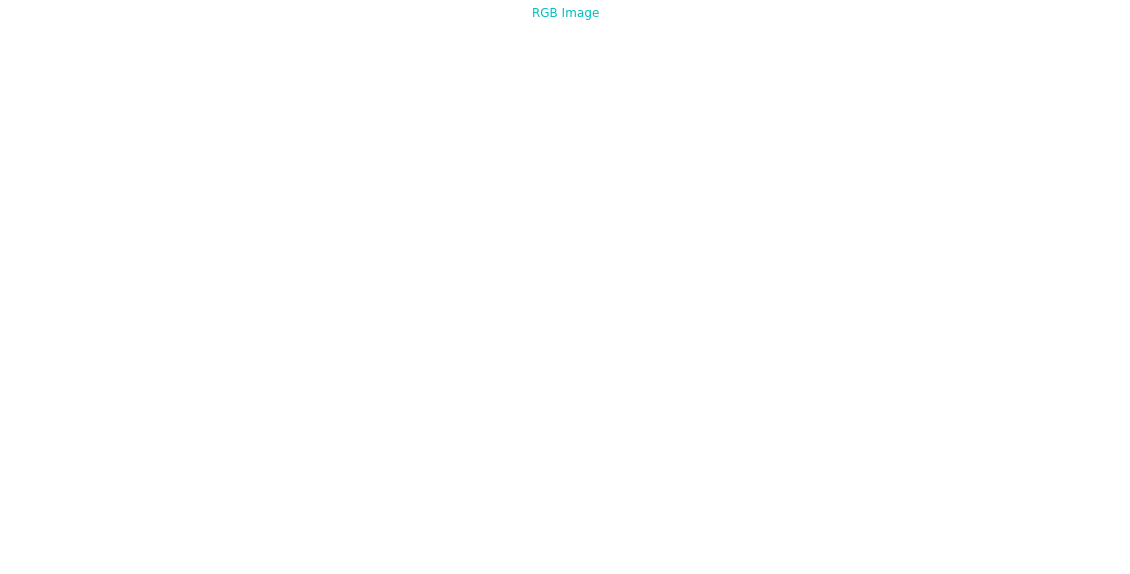

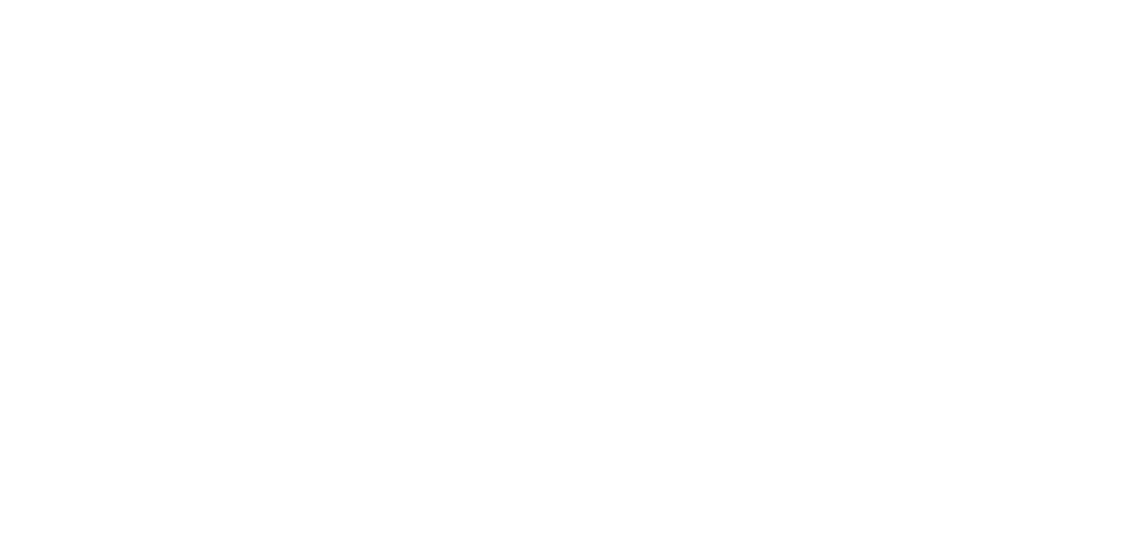

42


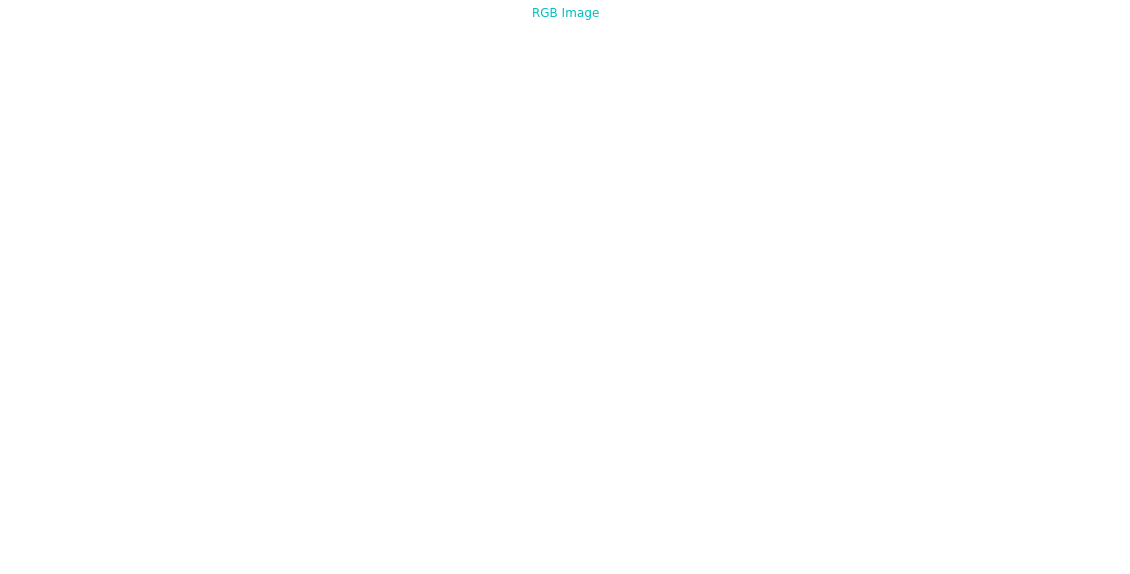

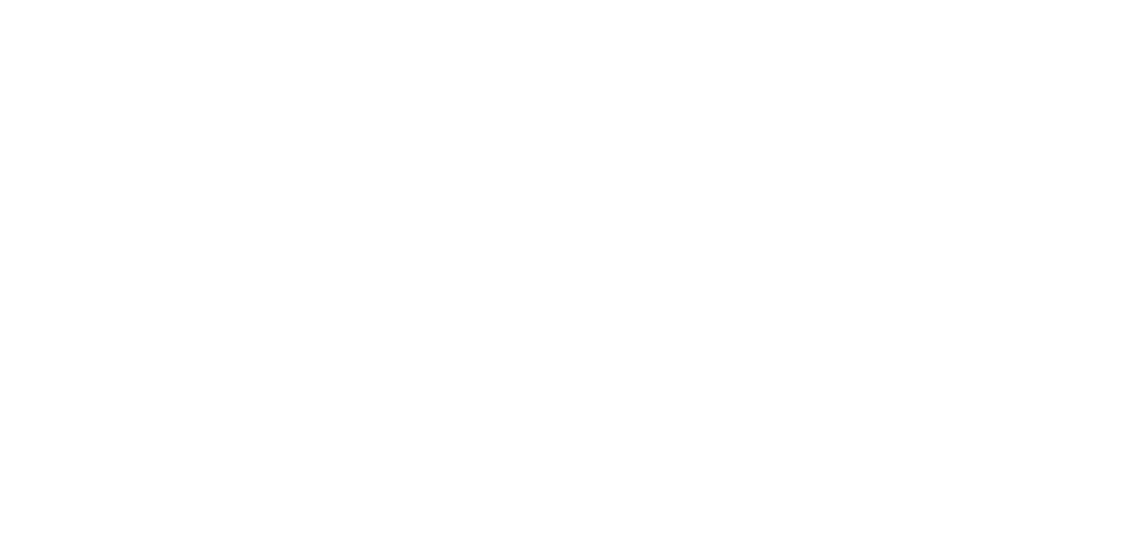

43


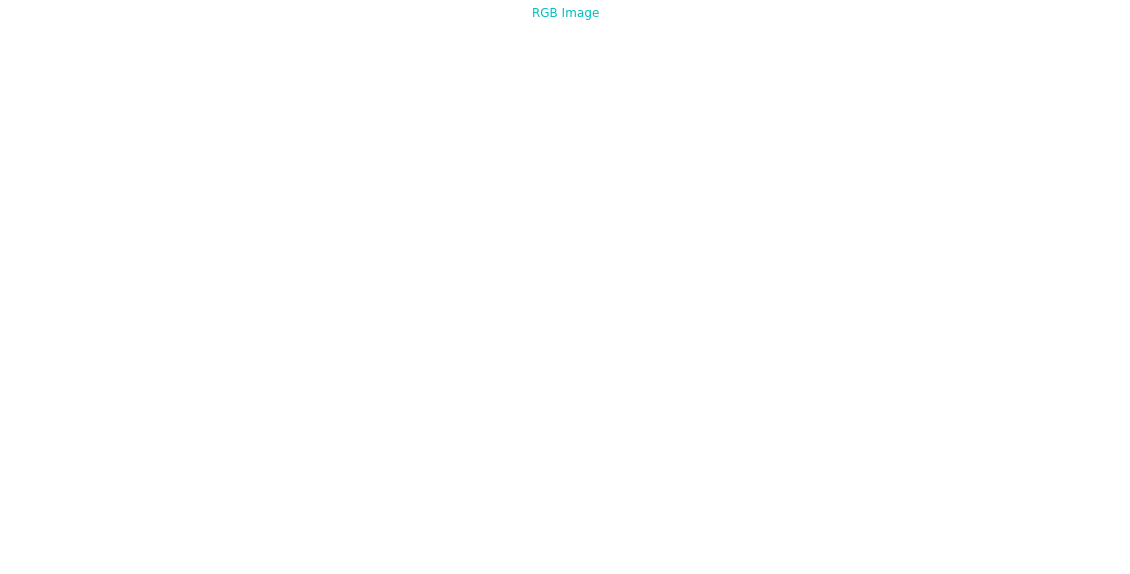

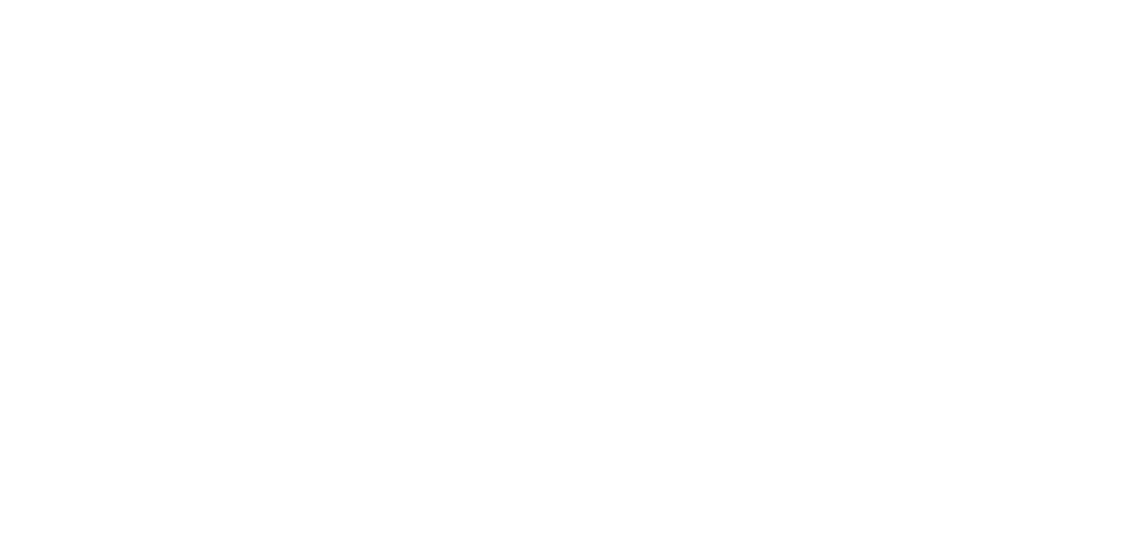

44


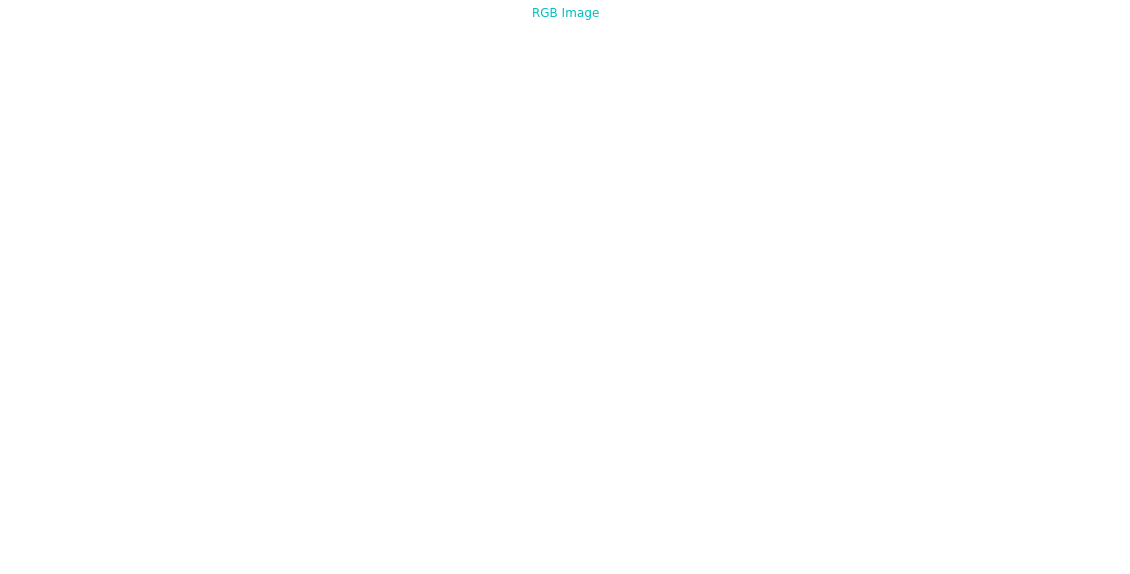

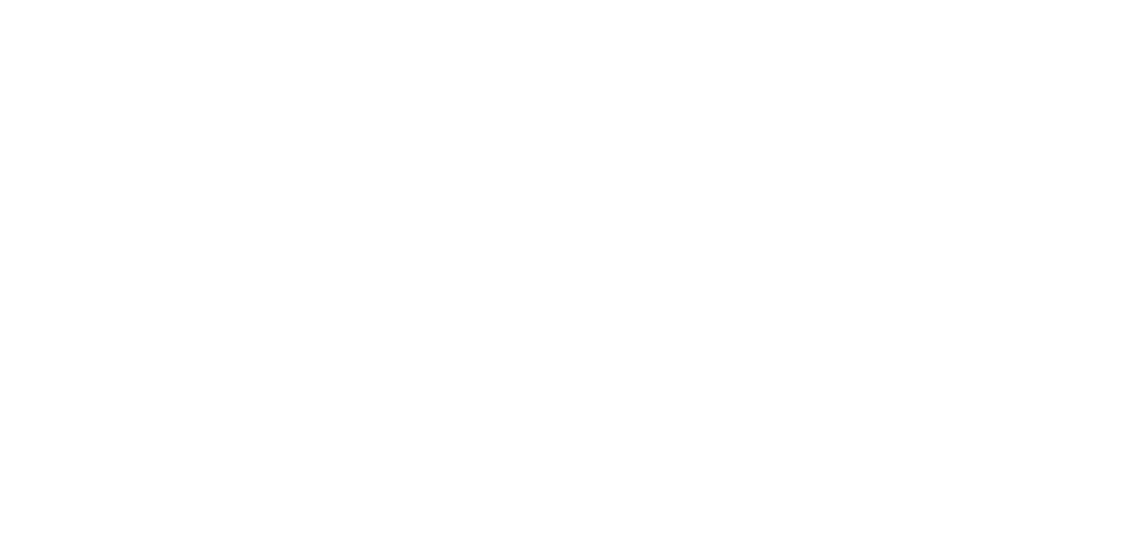

45


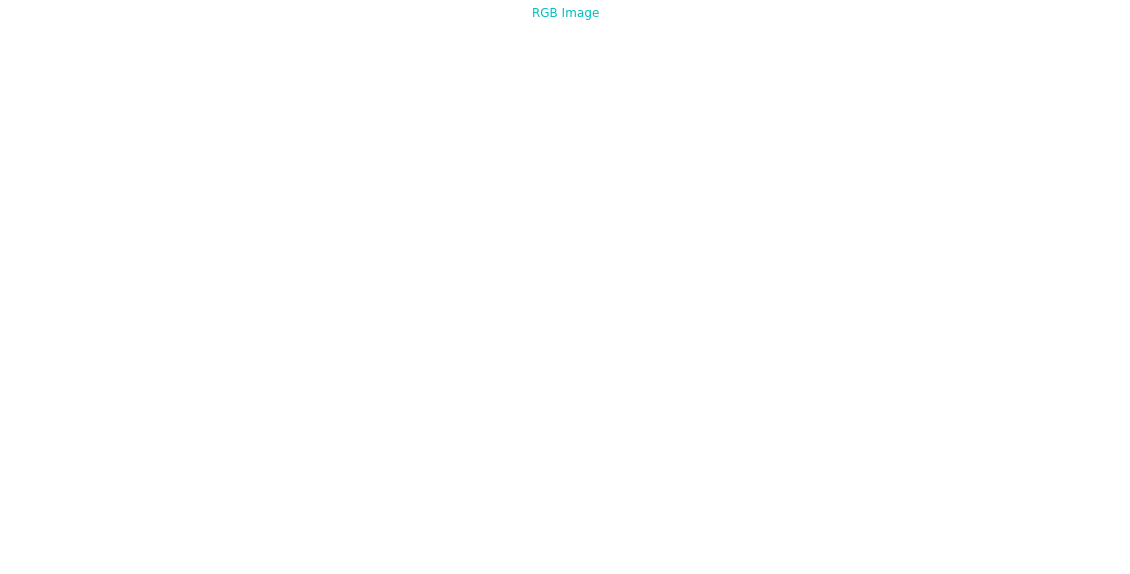

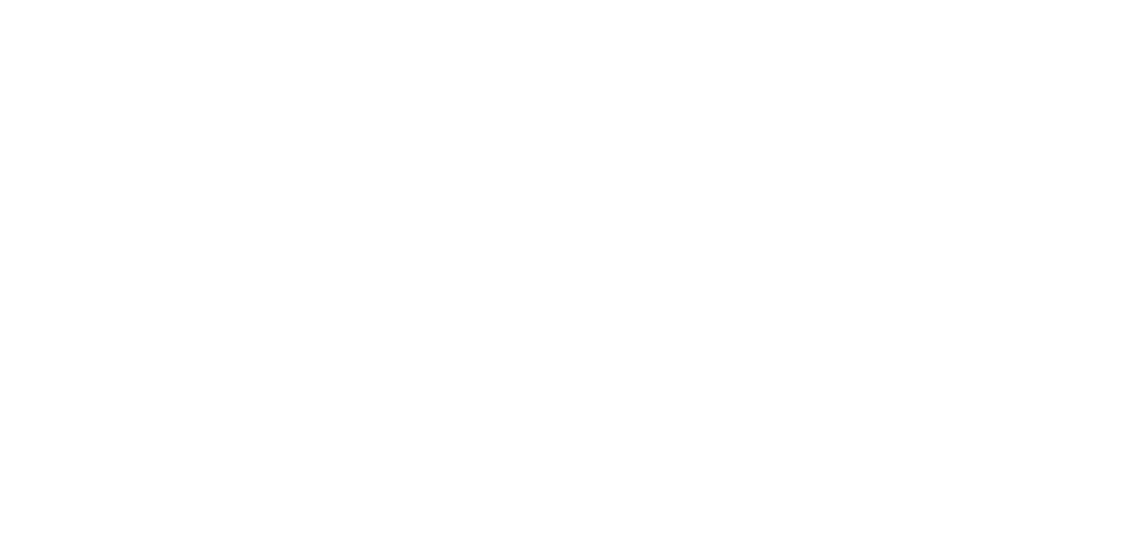

46


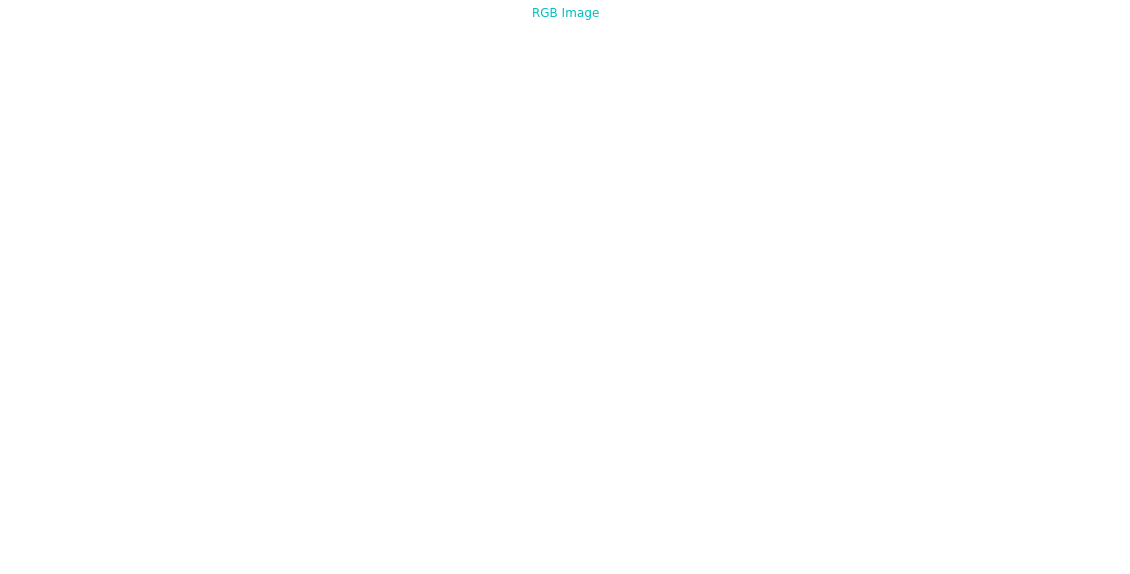

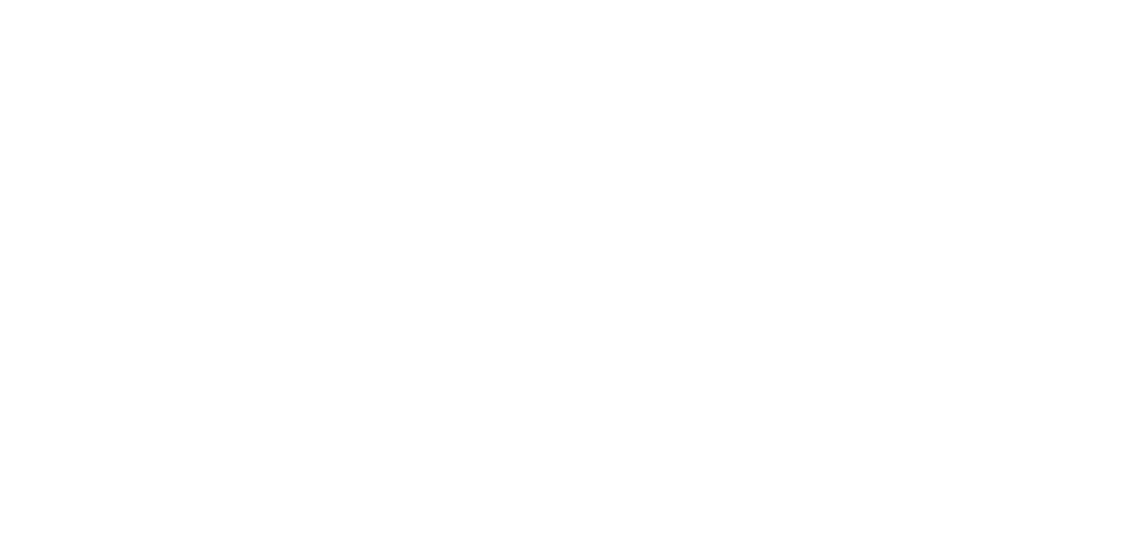

47


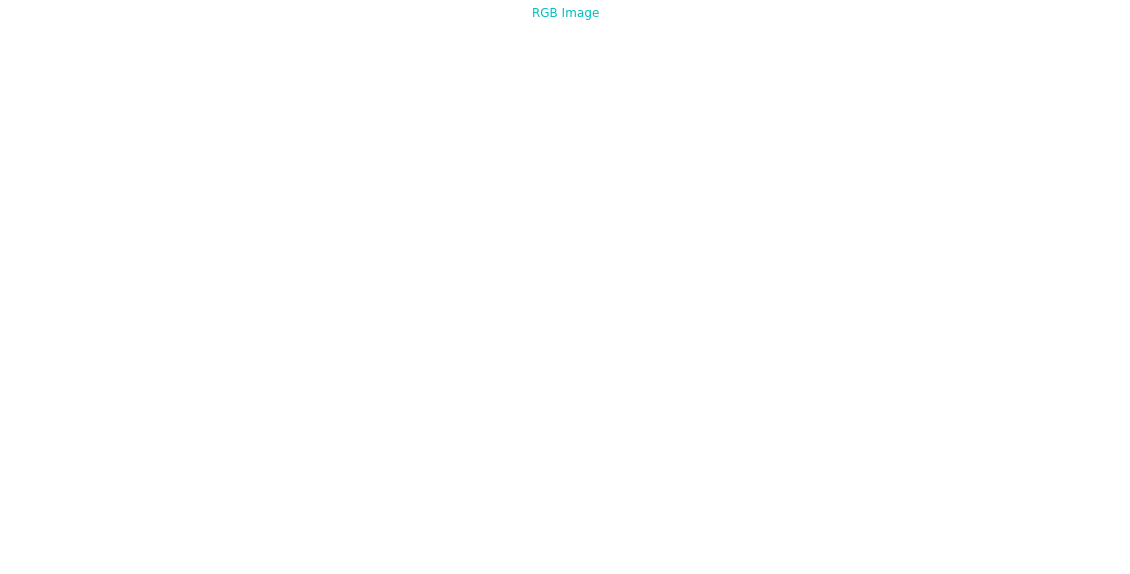

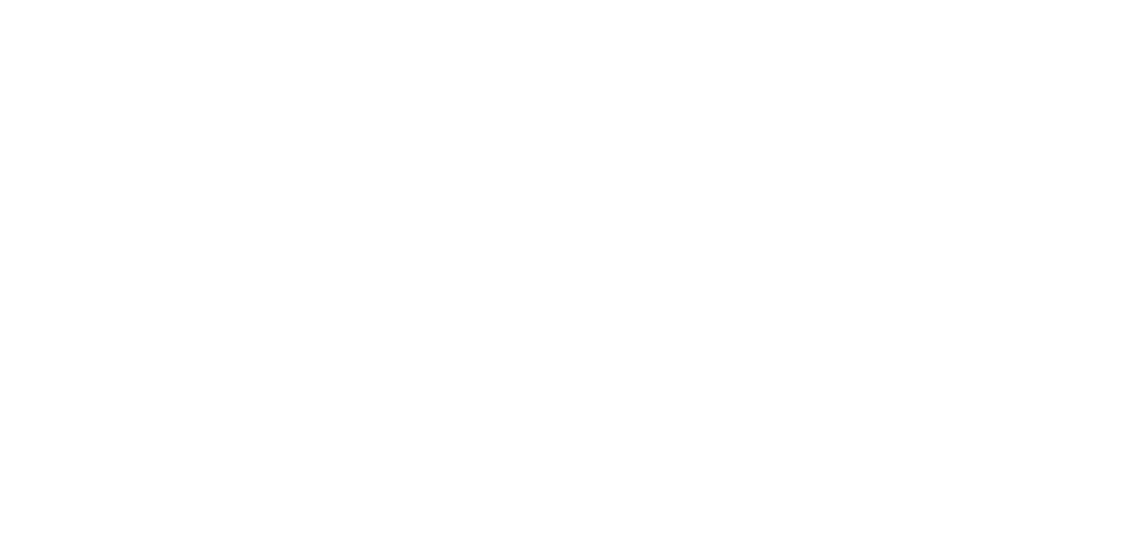

48


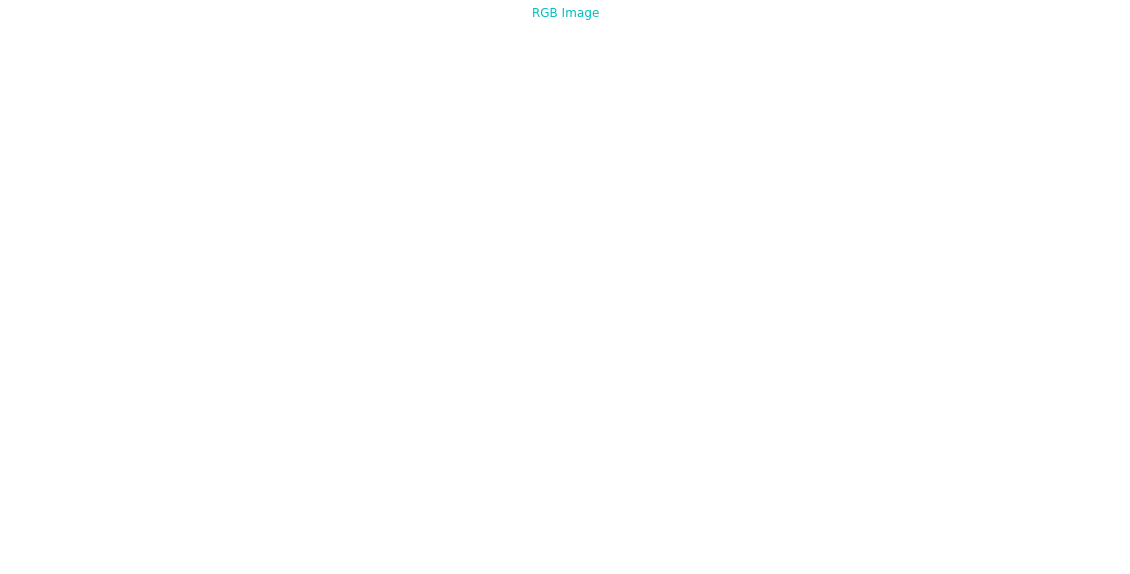

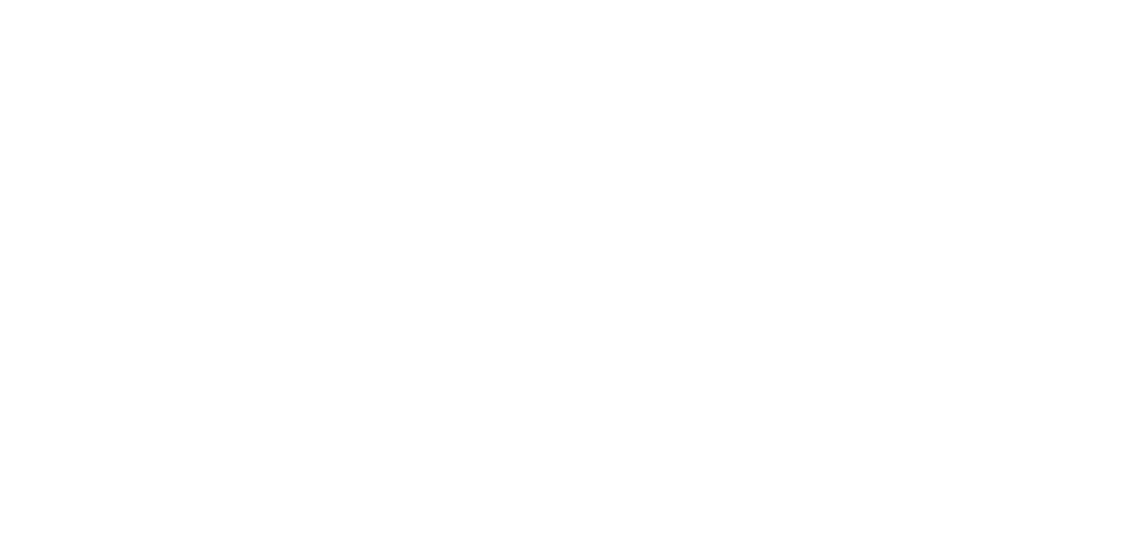

49


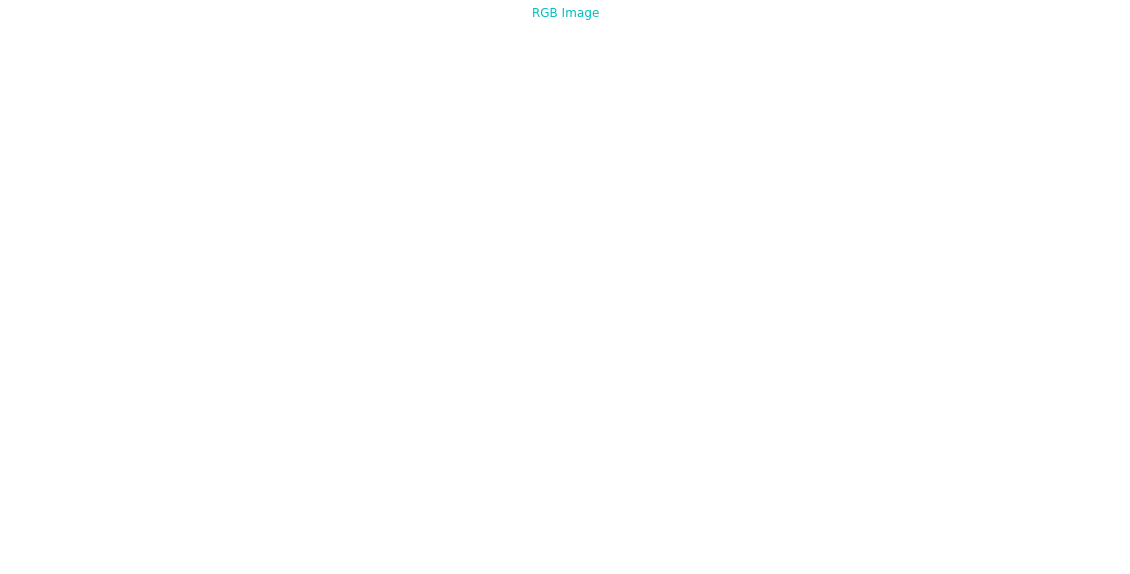

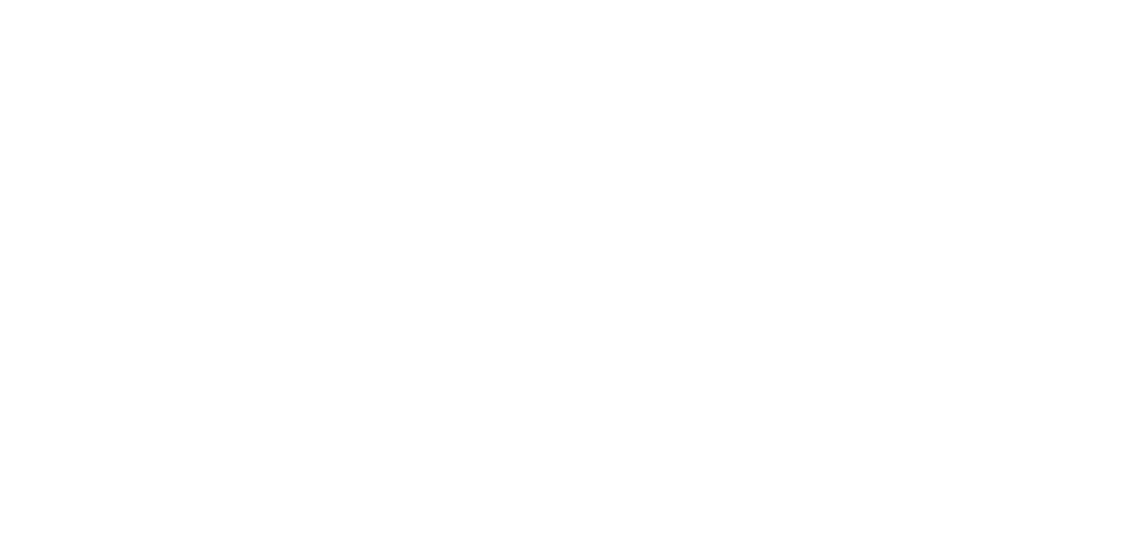

50


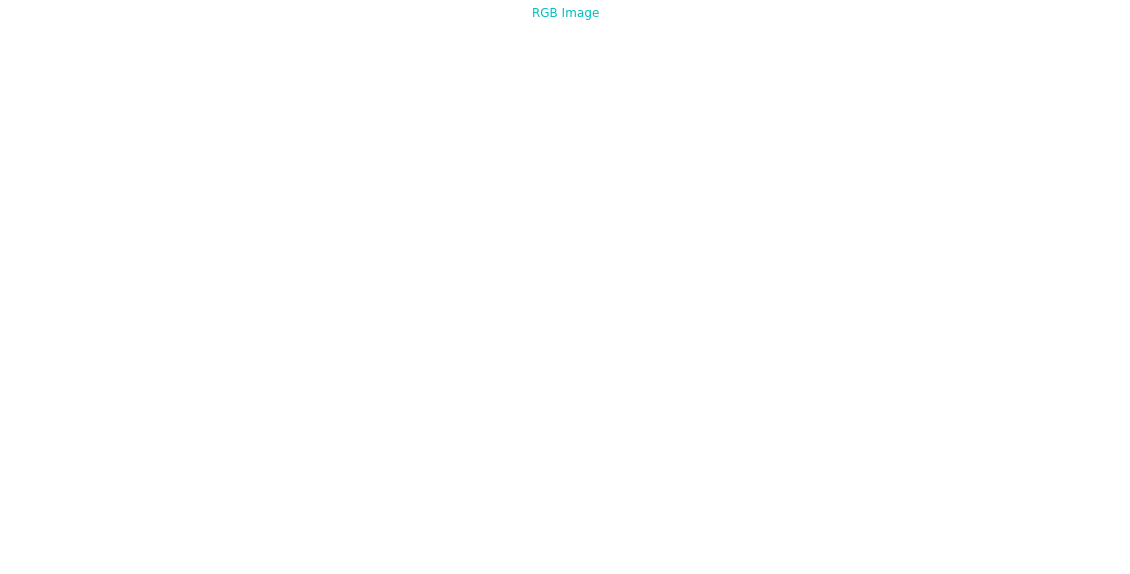

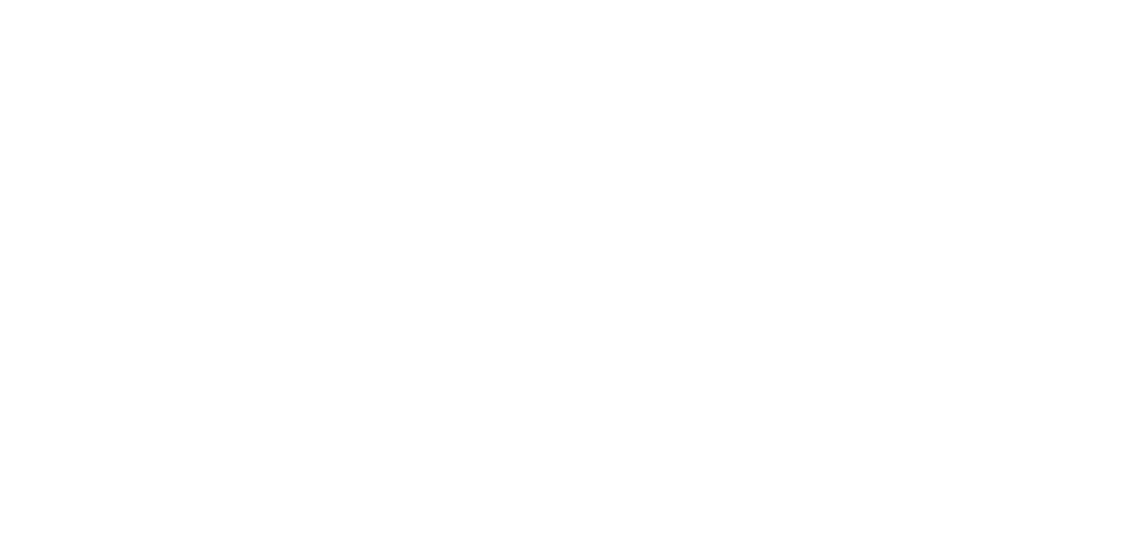

51


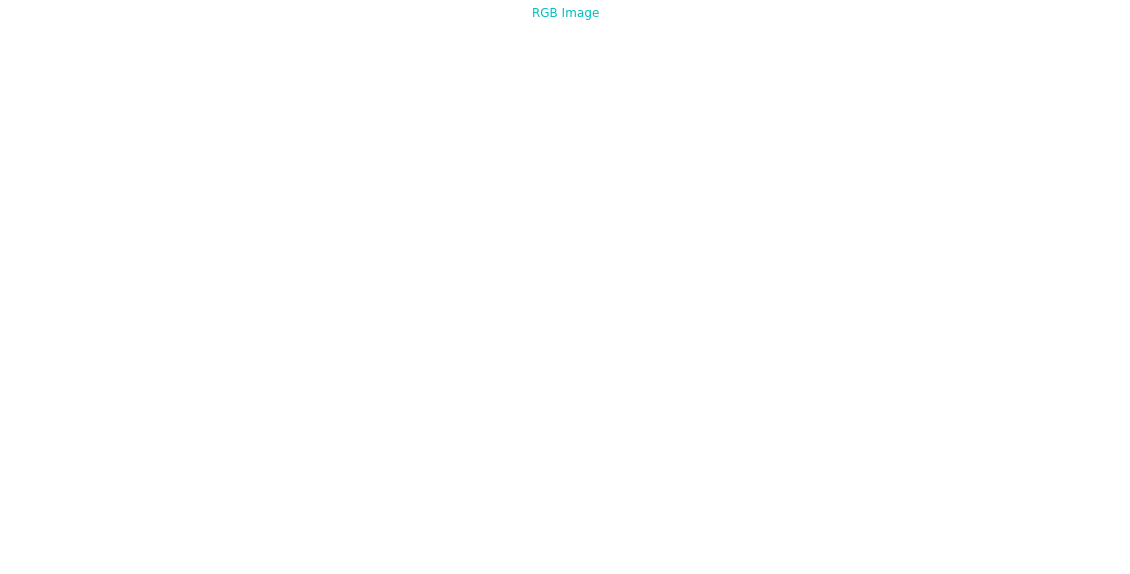

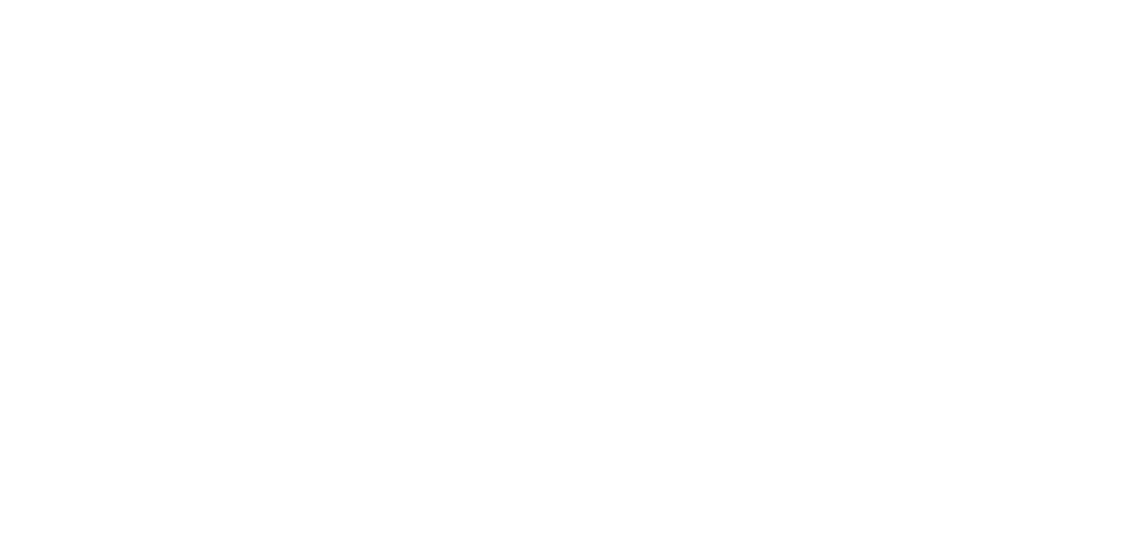

52


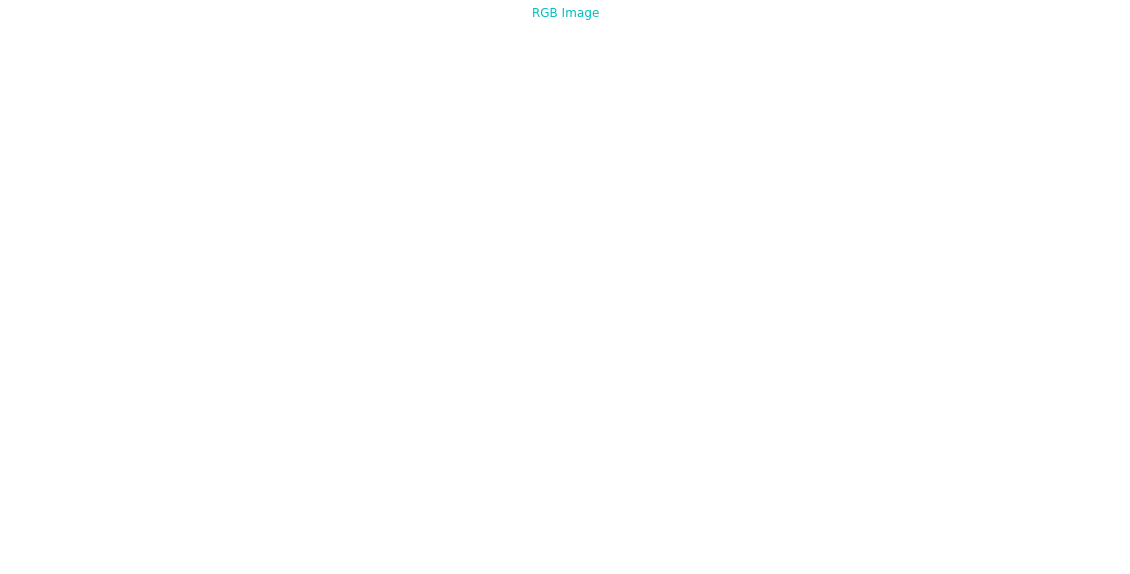

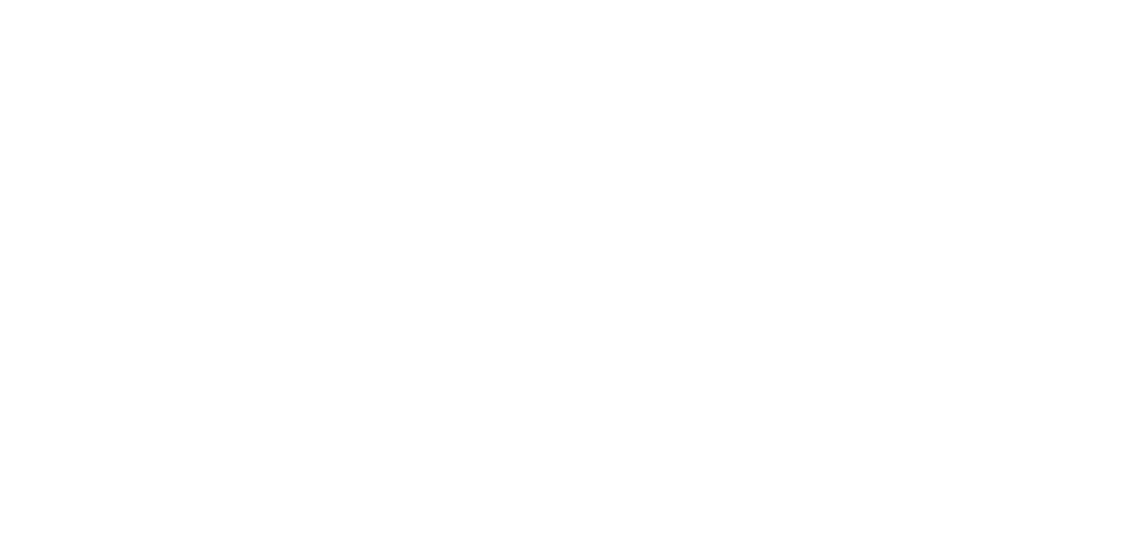

53


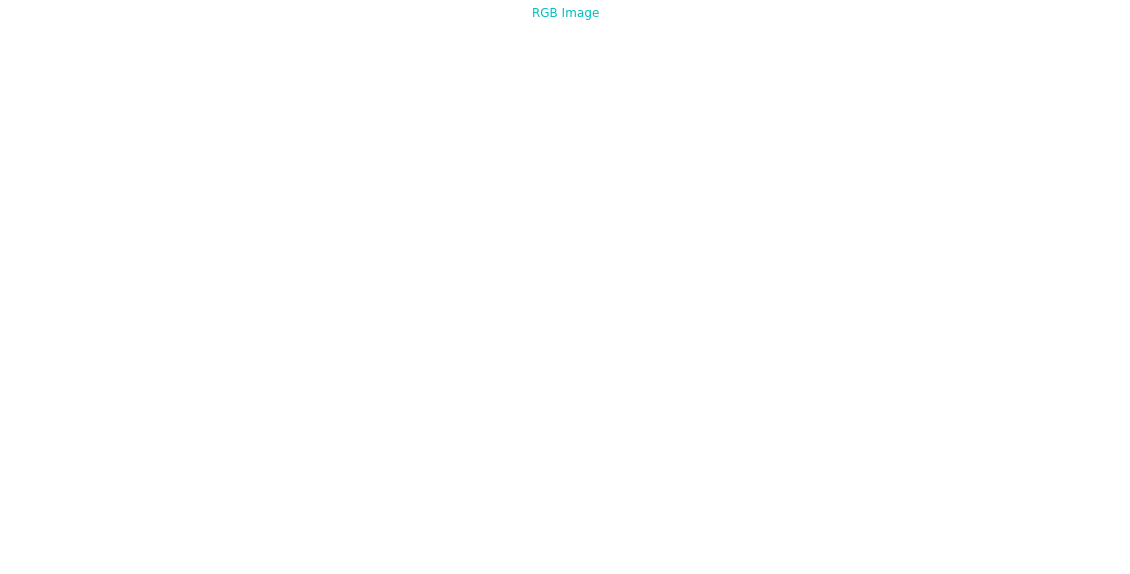

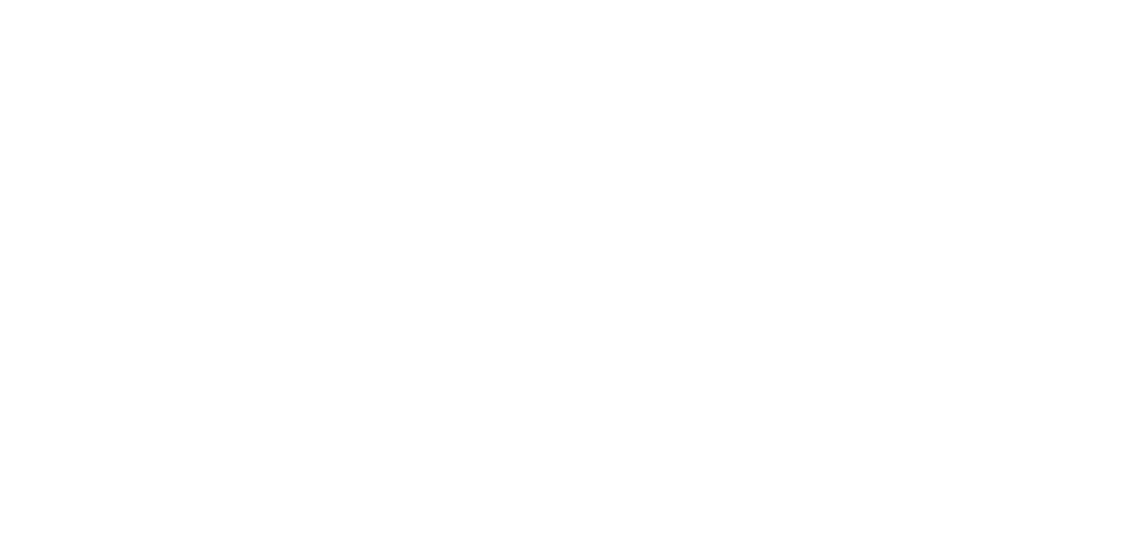

54


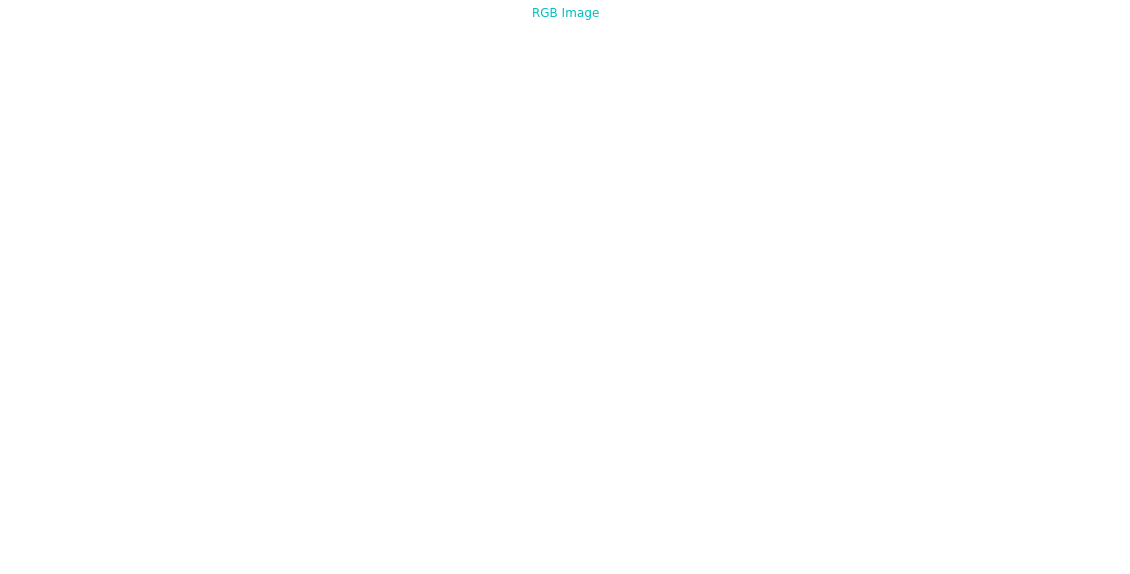

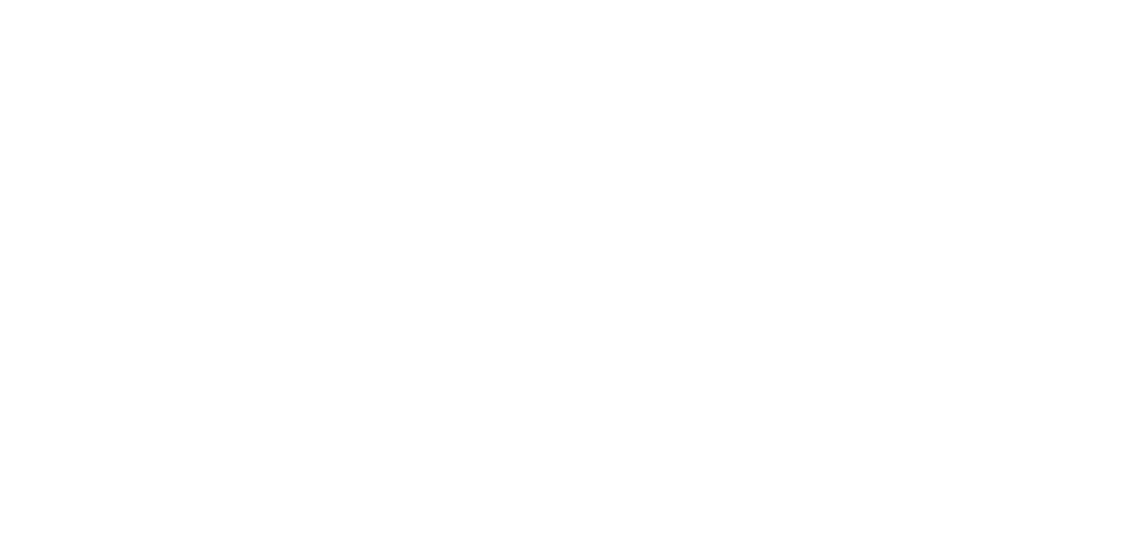

55


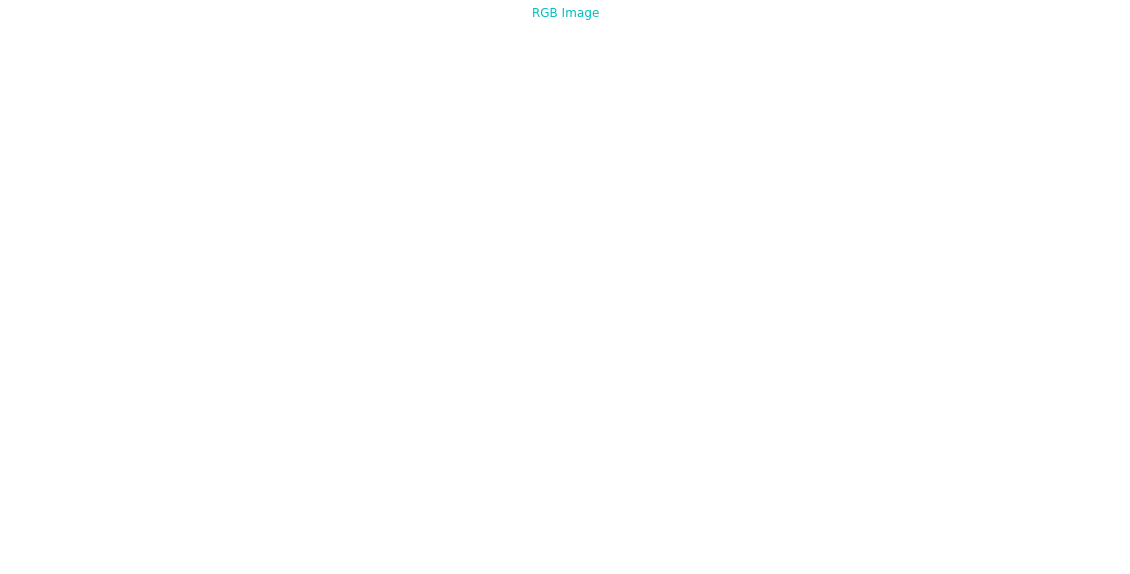

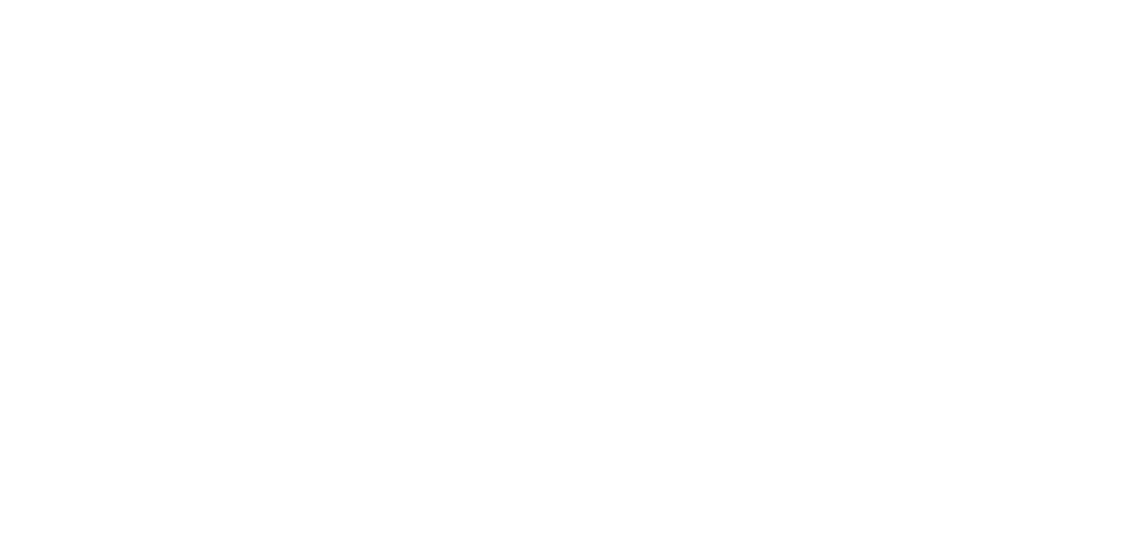

56


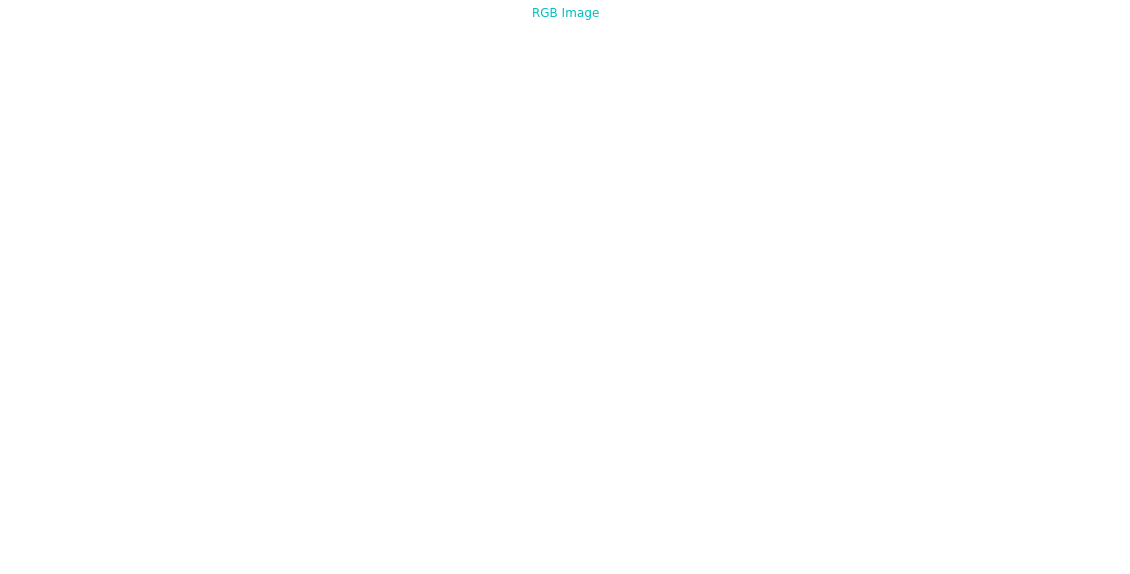

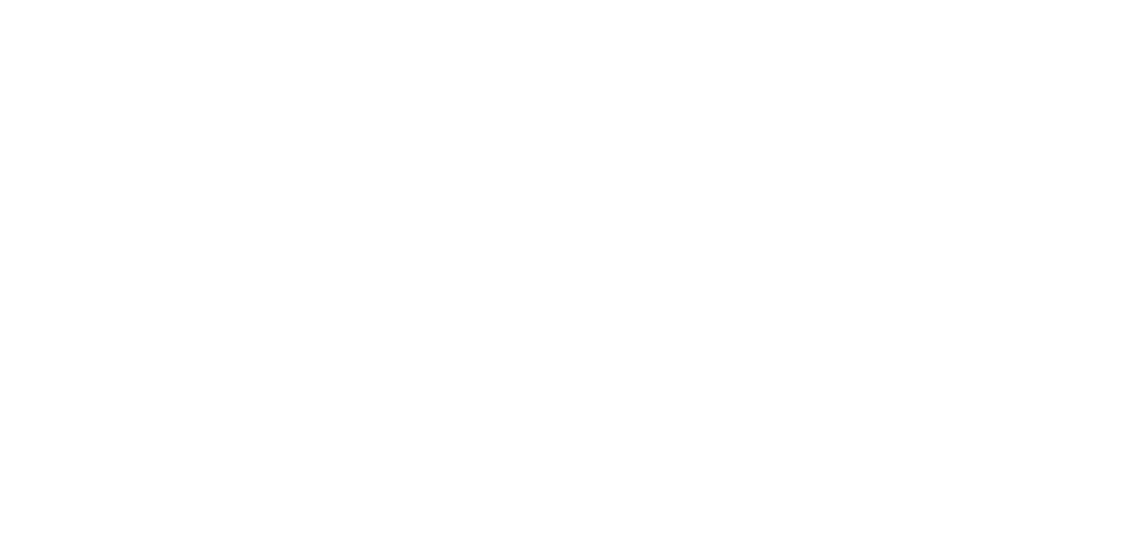

57


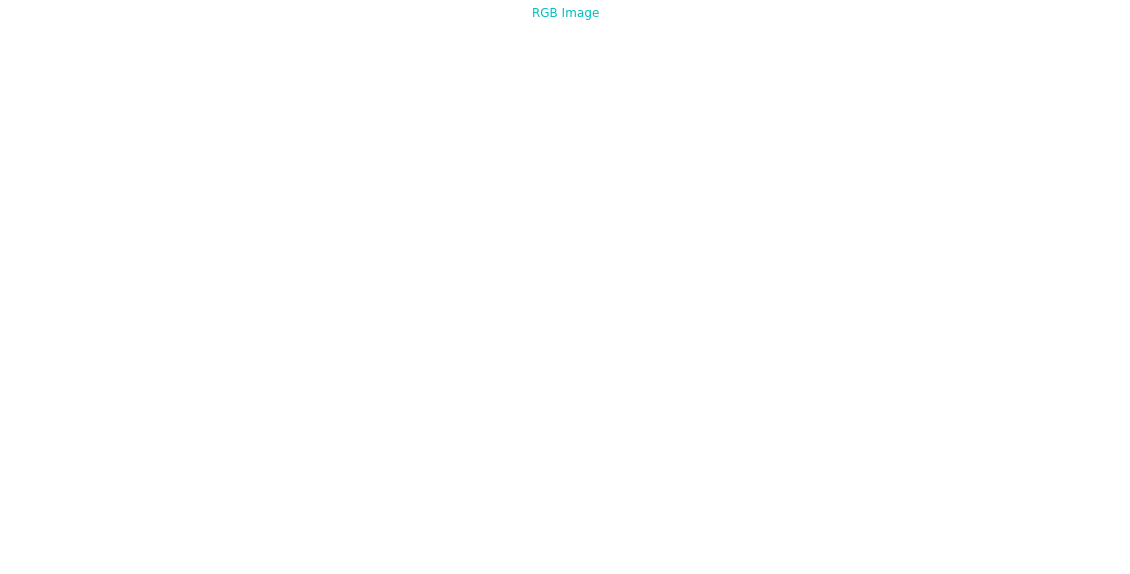

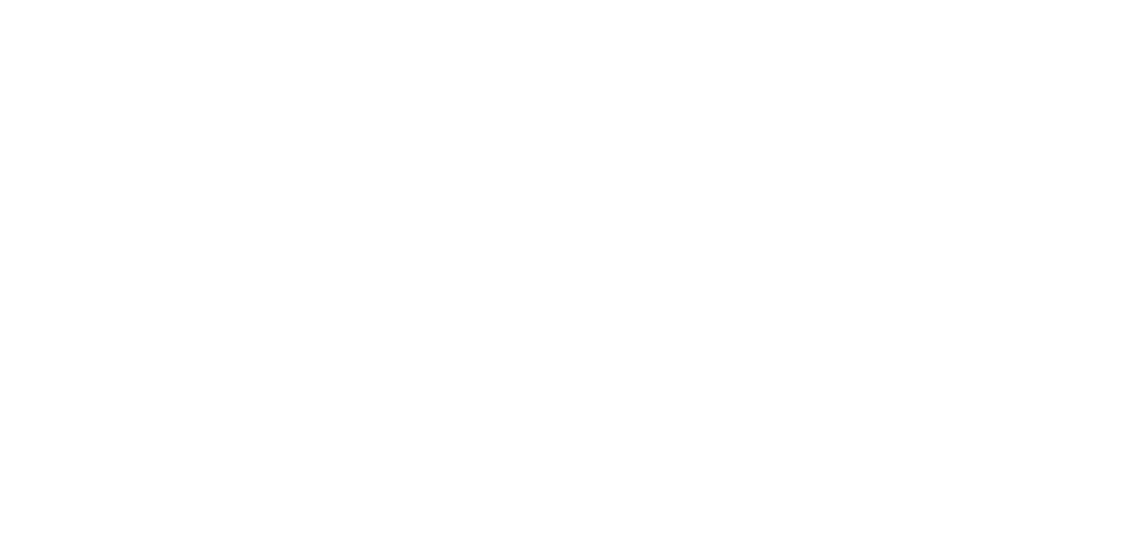

58


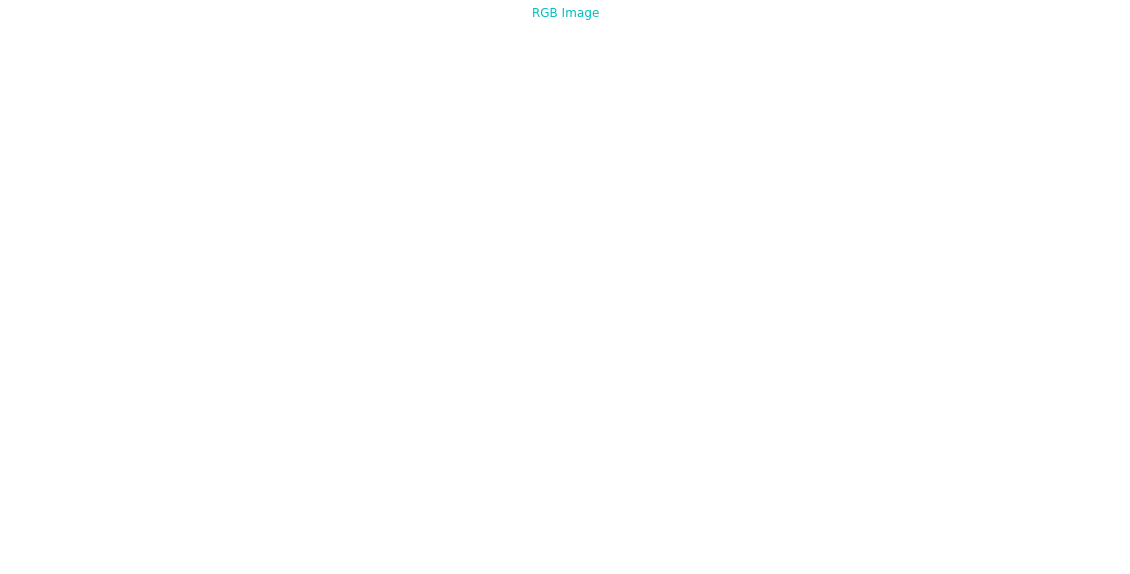

In [ ]:


def houghCircleDetector(path_to_img):
    global car_x_1 
    global car_y_1
    global car_r_1

    global car_x_list 
    global car_y_list
    global car_r_list

    car_x_list = []
    car_y_list = []
    car_r_list = []

    img = cv2.imread(path_to_img)
    img_edge = cv2.Canny(img,100,200)
  
    circles = cv2.HoughCircles(img_edge,cv2.HOUGH_GRADIENT, 1, minDist = 35, param1=200, param2=10, minRadius = 7, maxRadius = 12)

    circles = np.uint16(np.around(circles))
    for val in circles[0,:]:
        cv2.circle(img,(val[0],val[1]),val[2],(255,0,0),2)
        #print(val[0], val[1], val[2])
        car_x_1 = val[0]
        car_y_1 = val[1]
        car_x_list.append(val[0])
        car_y_list.append(val[1])
        car_r_list.append(val[2])
        cv2.rectangle(img, (car_x_1-70, car_y_1-40), (car_x_1+80,car_y_1+30), (255,0,0), 3)


    plt.figure(figsize=(20,10))
    #plt.plot(122),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Result',color='c')
    plt.axis('off')
    plt.show()
    return

def squareDetector(original_img, number):
  
    img = cv2.imread(original_img,cv2.IMREAD_UNCHANGED)

    #Slicing using ROI
    cropped = img[240:275,0:600].copy()
    cv2.imwrite("cropped_img.jpg", cropped)

    path_to_img = 'cropped_img.jpg'

    houghCircleDetector(path_to_img)

    #print(car_x_list)
    #print(car_y_list)

    index = 0
    first_num = 0
    right_index = 0

    for x in car_x_list:
      if x > first_num:
        first_num = x
        right_index = index
      index += 1

    #print(car_x_list[right_index], car_y_list[right_index], car_r_list[right_index])

    car_x_1 = car_x_list[right_index]
    car_y_1 = car_y_list[right_index]
    car_r_1 = car_r_list[right_index]



    MainImgBGR = cv2.imread(original_img,cv2.IMREAD_UNCHANGED)

    #Note: matplotlib uses RGB format so had to convert BGR-to-RGB

    plt.figure(figsize = (20,10))
    #cv2.rectangle(MainImgBGR, (car_x_1-100, car_y_1+160), (car_x_1+40,car_y_1+230), (255,0,0), 3)
    cv2.circle(MainImgBGR, (car_x_1, car_y_1+240), car_r_1+2, (0,0,255), 2)
    cv2.imwrite("frameblue"+str(number)+"detected.jpg", MainImgBGR)

    plt.axis('off')
    #plt.imshow(cv2.cvtColor(MainImgBGR,cv2.COLOR_BGR2RGB))
    plt.title('RGB Image',color='c')


    return


for frame in range(0,count):
  original_img = "frameblue"+str(frame)+".jpg"
  squareDetector(original_img, frame)
  print(frame)


In [ ]:
import glob

img_array = []
for frame in range(0,count):
    img = cv2.imread("frameblue"+str(frame)+"detected.jpg")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)


out = cv2.VideoWriter('proj.avi',cv2.VideoWriter_fourcc(*'DIVX'), 10, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()